In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import csv
# Numpy
import numpy as np
from numpy import exp, log, minimum, sqrt
import math
# Scipy
from scipy import optimize
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
import scipy

from os import listdir
from os.path import isfile, join
from astropy.io import fits
import galsim
from IPython.display import clear_output
import ngmix

from scipy.optimize import curve_fit
from scipy import stats
import sys
sys.path.append('/Users/zhangtianqing/Documents/Research/PSF_Rachel/HOMESim')
import homesm
import metasm
import utils
from timeout import timeout
import great3pipe
from astropy.io import fits
import os


In [2]:
cat_file_name = 'real_galaxy_catalog_25.2.fits'
catparam_file_name = 'real_galaxy_catalog_25.2_fits.fits'
dir = "COSMOS_25.2_training_sample"
cosmos_cat = galsim.COSMOSCatalog(cat_file_name, dir=dir)

In [4]:
@timeout(10)
def df_block(params,index, metacal = True):
    
    test = great3pipe.GREAT3Pipe(*params[:-1],**params[-1])
    
    try:
        base_ori_r, base_ori_e = test.measure(metacal = metacal,rot = False, base = True)
        mod_ori_r, mod_ori_e = test.measure(metacal = metacal,rot = False, base = False)
        base_rot_r, base_rot_e = test.measure(metacal = metacal,rot = True, base = True)
        mod_rot_r, mod_rot_e = test.measure(metacal = metacal,rot = True, base = False)

        psf_size = test.results['psf_sigma']
        truth_kurtosis = test.find_kurtosis_2(test.psf_light.drawImage(scale = test.pixel_scale))
        model_kurtosis = test.find_kurtosis_2(test.psf_model_light.drawImage(scale = test.pixel_scale))
        #print params[5]
        #gal_size = galsim.hsm.FindAdaptiveMom(cosmos_cat.makeGalaxy(gal_type='parametric',index=index).drawImage(scale = test.pixel_scale)).moments_sigma*test.pixel_scale
        gal_params= cosmos_cat.getParametricRecord(params[4])

        sersicn = gal_params['sersicfit'][2]
        redshift = gal_params['zphot']
        flux_radius = gal_params['flux_radius']
        mag = gal_params['mag_auto']




        df = pd.DataFrame([[index,params[5],truth_kurtosis,model_kurtosis,base_ori_r,base_ori_e,mod_ori_r,mod_ori_e,psf_size,sersicn], [index,params[5],truth_kurtosis,model_kurtosis,base_rot_r,base_rot_e,mod_rot_r,mod_rot_e,psf_size,sersicn]],
                          columns=["index","true_shear", "truth_kurtosis","model_kurtosis","R_base","e_base","R_mod","e_mod","psf_size",'sersic_index'])
        return df
    except:
        print( "error occured")
        return pd.DataFrame()


    
    

In [6]:
#measure config
sample_df = pd.DataFrame()
Shear = galsim.Shear(g1 = 0.0, g2 = 0.01)
kol_index = 1.1
folder_name = ("kol"+str(kol_index)+'shear2').replace(".", "d")
file_name_start = ("kol"+str(kol_index)+"shear"+str(Shear.g2)+"_0-").replace(".", "d")
run_name = "Outputs252/"
print( folder_name)
print( file_name_start)


try:
    # Create target Directory
    os.makedirs(run_name+folder_name)
    print("Directory " ,run_name+folder_name ,  " Created ") 
except:
    print("Directory " ,run_name+folder_name,  " already exists")

kol1d1shear2
kol1d1shear0d01_0-
Directory  Outputs252/kol1d1shear2  already exists


In [9]:
for index in range(0,90000):
    print( index)
    if index%1000==0 and index!=0:
        filename = run_name+folder_name+"/"+file_name_start+str(index//1000)+"k.pkl"
        sample_df.to_pickle(filename, protocol = 2)
        sample_df = pd.DataFrame()
    
    
    #this_hlr = np.random.normal(loc = 0.26, scale = 0.04)
    
    params = ("kolmogorov",0.3,0.0,0.0,index,Shear,
          {'pixel_scale':0.2,'metacal_method':'estimateShear', 
                                      'mod_kol_radius_ratio':kol_index,
                                      "great3_cat" : cosmos_cat,
                                    'shift': False
                                     })
    
    new_df = df_block(params, index)
    if new_df.shape[0]==0:
        continue
    sample_df = sample_df.append(new_df,ignore_index=True)
    #clear_output()
    
    
    

0


/Users/zhangtianqing/mambaforge/envs/yoda/lib/python3.9/site-packages/numba/core/dispatcher.py:303: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'FileNotFoundError([Errno 2] No such file or directory: '/Users/zhangtianqing/mambaforge/envs/yoda/lib/python3.9/site-packages/numpy-1.21.2.dist-info/METADATA')'.
  entrypoints.init_all()


1
error occured
2
3
4
5
6
7
8
9
10
11
12
13
14
15
error occured
16
17
error occured
18
error occured
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
error occured
39
40
41
error occured
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
error occured
57
58
59
60
61
error occured
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
error occured
97
98
99
error occured
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
error occured
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
error occured
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
error occured
176
177
error occured
178
179
180
181
182
183
184
185
186
187
188
189
error occured
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
error occured
211
212
213
214
215
216
217
218
219
220
221


1539
1540
1541
error occured
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
error occured
1552
1553
1554
1555
1556
1557
1558
error occured
1559
1560
1561
1562
1563
1564
error occured
1565
1566
1567
1568
error occured
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
error occured
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
error occured
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
error occured
1642
1643
1644
error occured
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
error occured
1664
1665
1666
1667
1668
1669
error occured
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1

2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
error occured
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
error occured
2991
2992
error occured
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
error occured
3011
3012
3013
3014
error occured
3015
3016
3017
3018
3019
3020
3021
3022
3023
error occured
3024
3025
3026
3027
3028
3029
3030
3031
error occured
3032
3033
3034
3035
3036
3037
3038
3039
3040
error occured
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
error occured
3060
3061
error occured
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
error occured
3072
3073
3074
3075
3076
3077
error occured
3078
error occured
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
error occured
3099

4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
error occured
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
error occured
4428
4429
4430
4431
4432
4433
4434
error occured
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
error occured
4451
error occured
4452
4453
4454
4455
4456
4457
4458
4459
error occured
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
error occured
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
error occured
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
450

5737
5738
5739
5740
5741
5742
5743
error occured
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
error occured
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
error occured
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
error occured
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
error occured
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
error occured
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
error occured
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
59

7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
error occured
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
error occured
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
error occured
7231
7232
7233
7234
error occured
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
error occured
7311
7312
7313
error occured
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7

8546
8547
8548
8549
8550
8551
error occured
8552
8553
error occured
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
error occured
8617
8618
8619
8620
8621
8622
error occured
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
error occured
8637
error occured
8638
8639
8640
error occured
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
error occured
8654
8655
error occured
8656
8657
error occured
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
error occured
8692
8693
8694
error occured
8695
8696
8697
8698
8699
8700
8701
8702
8703
error occured
8704
8705
8706
8707
8708
870

9932
9933
9934
9935
error occured
9936
9937
9938
9939
error occured
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
error occured
9952
9953
9954
9955
9956
9957
9958
error occured
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
error occured
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
error occured
9988
9989
9990
9991
error occured
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
error occured
10007
10008
10009
error occured
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
error occured
10030
10031
10032
10033
10034
error occured
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
error occured
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081


11144
11145
11146
11147
11148
11149
11150
11151
11152
11153
11154
11155
11156
11157
error occured
11158
11159
error occured
11160
11161
error occured
11162
error occured
11163
11164
11165
11166
11167
11168
11169
11170
11171
11172
11173
11174
11175
11176
11177
11178
11179
11180
11181
11182
11183
11184
11185
11186
11187
11188
11189
11190
11191
11192
11193
11194
11195
11196
11197
error occured
11198
11199
11200
error occured
11201
11202
11203
11204
11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11227
11228
11229
11230
error occured
11231
11232
error occured
11233
11234
11235
11236
11237
11238
11239
11240
11241
11242
error occured
11243
11244
error occured
11245
11246
11247
11248
11249
11250
11251
11252
11253
11254
11255
11256
11257
11258
11259
error occured
11260
11261
error occured
11262
11263
11264
11265
11266
11267
11268
11269
11270
11271
11272
11273
11274
error occured
11275
11276
11277
11278
11279
11

12320
12321
error occured
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
error occured
12338
error occured
12339
error occured
12340
12341
12342
error occured
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
error occured
12353
12354
12355
12356
error occured
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
error occured
12395
12396
12397
12398
error occured
12399
12400
12401
12402
12403
12404
12405
12406
12407
error occured
12408
12409
12410
12411
12412
12413
error occured
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
12428
12429
12430
12431
12432
12433
12434
12435
12436
12437
12438
12439
12440
12441
12442
12443
12444
12445
12446
12447
12448
12449
12450
12451
12452
12453
12454
12455
12456
12457
12458
12459
12460


13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
error occured
13525
13526
13527
13528
error occured
13529
13530
13531
13532
13533
error occured
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
error occured
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
error occured
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
error occured
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
error occured
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13

14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
error occured
14706
14707
error occured
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
error occured
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
error occured
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
error occured
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
error occured
14811
14812
14813
14814
error occured
14815
14816
14817
14818
14819
14820
14821
14822
error occured
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837


15914
error occured
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
error occured
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
error occured
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
error occured
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
error occured
16066
16067
16068


17094
17095
17096
17097
error occured
17098
error occured
17099
17100
error occured
17101
17102
17103
17104
17105
17106
error occured
17107
17108
17109
error occured
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
error occured
17128
17129
17130
17131
17132
17133
17134
error occured
17135
17136
17137
error occured
17138
17139
17140
17141
17142
17143
17144
17145
17146
error occured
17147
17148
error occured
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
error occured
17198
17199
17200
17201
17202
17203
17204
error occured
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
error occured
17

18235
18236
18237
18238
18239
18240
18241
18242
18243
18244
18245
18246
18247
18248
18249
18250
18251
18252
18253
18254
18255
18256
18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
error occured
18272
18273
18274
18275
18276
18277
18278
18279
error occured
18280
18281
18282
18283
18284
18285
18286
18287
18288
error occured
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
error occured
18299
18300
18301
error occured
18302
error occured
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
error occured
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18

19426
19427
19428
19429
19430
19431
19432
19433
19434
19435
19436
19437
19438
19439
19440
error occured
19441
19442
19443
19444
19445
19446
19447
19448
19449
19450
19451
19452
19453
19454
19455
19456
19457
error occured
19458
19459
19460
19461
19462
19463
19464
19465
19466
19467
19468
19469
19470
19471
19472
19473
19474
19475
error occured
19476
19477
19478
19479
error occured
19480
19481
19482
19483
19484
19485
19486
19487
error occured
19488
19489
19490
19491
19492
19493
19494
19495
19496
19497
19498
19499
19500
19501
19502
19503
19504
19505
19506
19507
19508
error occured
19509
19510
19511
error occured
19512
error occured
19513
19514
19515
19516
19517
19518
19519
19520
19521
19522
19523
19524
19525
19526
19527
19528
19529
19530
19531
error occured
19532
error occured
19533
19534
19535
19536
19537
19538
19539
19540
19541
19542
19543
19544
19545
19546
19547
19548
19549
19550
19551
19552
19553
error occured
19554
19555
19556
19557
19558
19559
19560
19561
19562
19563
19564
error occure

20633
20634
20635
20636
20637
20638
20639
20640
error occured
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
error occured
20657
20658
20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
error occured
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
error occured
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
error occured
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787


21838
21839
21840
21841
21842
21843
21844
21845
21846
21847
21848
21849
21850
21851
21852
21853
error occured
21854
21855
21856
21857
21858
21859
21860
21861
21862
21863
21864
21865
21866
21867
21868
21869
21870
error occured
21871
21872
21873
21874
21875
21876
21877
21878
21879
21880
21881
21882
21883
21884
21885
21886
21887
21888
21889
21890
21891
21892
21893
21894
21895
21896
21897
21898
21899
21900
21901
21902
21903
21904
error occured
21905
21906
21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
21947
21948
21949
21950
21951
21952
error occured
21953
error occured
21954
21955
21956
21957
error occured
21958
21959
21960
21961
21962
21963
error occured
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21974
21975
21976
21977
21978
error occured
21979
21980
21981
21982
21983
21984
21985


23036
23037
23038
23039
23040
23041
23042
error occured
23043
23044
error occured
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
error occured
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
23066
23067
23068
error occured
23069
23070
23071
error occured
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23104
23105
23106
23107
23108
23109
23110
23111
23112
error occured
23113
23114
23115
23116
23117
23118
23119
23120
23121
error occured
23122
23123
23124
23125
23126
23127
23128
23129
23130
23131
23132
23133
23134
23135
error occured
23136
23137
23138
23139
23140
23141
23142
23143
23144
23145
23146
23147
23148
error occured
23149
23150
23151
error occured
23152
23153
23154
23155
23156
23157
23158
23159
23160
23161
23162
23163
23164
23165
23166
23167
23168
23169
23170
23171
23172
23173
23174
23175
error occured
23176


24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
error occured
24261
24262
24263
24264
error occured
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
error occured
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
error occured
24330
24331
24332
error occured
24333
24334
24335
24336
24337
24338
24339
24340
error occured
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
error occured
24358
24359
24360
24361
24362
24363
24364
24365
error occured
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
error occured
24378
24379
24380
24381
24382
24383
24384
error occured
24385
24386
24387
24388
24389
24

25408
25409
25410
error occured
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
error occured
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25439
25440
25441
25442
25443
25444
25445
25446
25447
25448
25449
25450
25451
25452
25453
25454
25455
25456
25457
25458
25459
25460
25461
25462
25463
25464
25465
25466
25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
error occured
25477
25478
25479
25480
25481
25482
error occured
25483
25484
25485
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
error occured
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
error occured
25520
25521
25522
25523
25524
error occured
25525
25526
error occured
25527
25528
25529
25530
25531
25532
25533
25534
error occured
25535
25536
25537
25538
error occured
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25

26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
error occured
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
error occured
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
error occured
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
error occured
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
error occured
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
26719
26720
26721
26722
26723
26724
26725
26726
26727
26728
26729
26730
26731
26732
26733
26734
26735
26736
26737
26738
26739
26740
26741
26742
26743
26744
26745
26746
26747
26748
26749
error occured
26750
26751
26752
26753
26754
error occured
26755
26756
26

27820
27821
27822
27823
27824
27825
27826
27827
error occured
27828
27829
27830
27831
27832
27833
27834
27835
27836
27837
27838
27839
27840
27841
27842
27843
27844
27845
27846
27847
27848
27849
27850
27851
27852
27853
27854
27855
27856
27857
27858
27859
27860
27861
27862
27863
error occured
27864
27865
27866
27867
27868
27869
27870
27871
27872
error occured
27873
27874
27875
27876
27877
27878
27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
error occured
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
error occured
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974


28999
29000
29001
29002
29003
29004
29005
29006
error occured
29007
29008
29009
error occured
29010
29011
29012
29013
29014
29015
29016
29017
29018
29019
29020
29021
29022
29023
29024
error occured
29025
29026
29027
29028
29029
error occured
29030
error occured
29031
29032
29033
29034
29035
error occured
29036
29037
29038
29039
29040
29041
29042
29043
29044
29045
29046
29047
29048
29049
error occured
29050
29051
29052
29053
29054
29055
29056
29057
29058
29059
29060
29061
29062
29063
29064
29065
29066
29067
29068
29069
29070
29071
29072
29073
29074
29075
29076
29077
29078
29079
29080
error occured
29081
29082
29083
29084
29085
29086
29087
29088
29089
29090
29091
29092
29093
29094
29095
29096
29097
29098
29099
29100
29101
29102
29103
29104
29105
29106
29107
29108
29109
29110
29111
error occured
29112
29113
29114
29115
29116
29117
29118
29119
29120
29121
29122
29123
29124
29125
29126
29127
29128
29129
29130
29131
29132
29133
29134
29135
29136
error occured
29137
29138
29139
29140
29141
29

30164
30165
30166
30167
30168
30169
30170
30171
30172
30173
error occured
30174
30175
30176
30177
error occured
30178
30179
30180
30181
30182
30183
30184
30185
30186
30187
30188
30189
30190
30191
30192
30193
30194
30195
30196
30197
error occured
30198
30199
30200
30201
30202
30203
30204
30205
30206
error occured
30207
30208
30209
30210
30211
30212
30213
error occured
30214
30215
30216
30217
30218
30219
error occured
30220
30221
30222
30223
30224
30225
30226
30227
30228
30229
30230
30231
30232
30233
30234
30235
30236
30237
30238
30239
30240
30241
30242
30243
30244
30245
30246
30247
30248
30249
30250
30251
30252
error occured
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30266
30267
30268
30269
30270
30271
30272
30273
30274
30275
30276
30277
30278
30279
30280
30281
30282
30283
30284
30285
30286
30287
30288
30289
30290
30291
30292
30293
30294
error occured
30295
30296
30297
30298
30299
30300
30301
30302
30303
30304
30305
30306
30307
30308
30309
30310
30311


31351
31352
31353
31354
31355
31356
31357
31358
31359
31360
31361
31362
31363
31364
31365
31366
error occured
31367
31368
31369
31370
31371
31372
error occured
31373
31374
31375
31376
31377
31378
31379
31380
31381
31382
31383
31384
31385
31386
31387
31388
31389
31390
31391
31392
error occured
31393
31394
error occured
31395
31396
31397
31398
31399
31400
31401
31402
error occured
31403
31404
31405
31406
31407
31408
31409
31410
31411
31412
31413
31414
31415
31416
31417
31418
31419
31420
31421
31422
31423
31424
31425
31426
31427
31428
31429
31430
31431
31432
31433
31434
31435
31436
31437
31438
31439
31440
error occured
31441
error occured
31442
31443
31444
31445
31446
31447
error occured
31448
31449
31450
31451
31452
31453
31454
error occured
31455
31456
31457
31458
31459
31460
31461
31462
31463
error occured
31464
31465
31466
31467
31468
31469
error occured
31470
31471
31472
error occured
31473
error occured
31474
31475
31476
31477
31478
31479
31480
31481
31482
31483
error occured
31484


32540
32541
32542
32543
32544
32545
32546
32547
32548
32549
32550
error occured
32551
32552
32553
32554
32555
32556
32557
32558
error occured
32559
32560
32561
32562
32563
32564
32565
32566
32567
32568
32569
32570
32571
32572
32573
32574
32575
32576
32577
32578
32579
32580
32581
32582
32583
32584
32585
32586
32587
32588
32589
32590
32591
error occured
32592
32593
32594
32595
32596
32597
32598
32599
32600
32601
32602
32603
32604
32605
32606
32607
error occured
32608
32609
32610
32611
32612
32613
error occured
32614
32615
32616
32617
32618
32619
32620
error occured
32621
32622
error occured
32623
32624
error occured
32625
32626
32627
32628
32629
32630
32631
32632
32633
32634
32635
32636
32637
32638
32639
32640
32641
32642
32643
32644
32645
32646
32647
32648
32649
32650
32651
32652
32653
32654
32655
32656
32657
32658
32659
32660
32661
32662
32663
32664
32665
32666
32667
32668
32669
32670
32671
32672
32673
32674
error occured
32675
32676
32677
32678
32679
32680
32681
32682
32683
32684
3268

33718
33719
33720
33721
33722
33723
33724
33725
33726
33727
33728
33729
33730
33731
33732
33733
33734
33735
33736
33737
33738
33739
33740
33741
33742
error occured
33743
33744
error occured
33745
33746
33747
33748
33749
33750
33751
33752
33753
33754
33755
33756
33757
33758
33759
33760
33761
33762
33763
33764
33765
33766
33767
33768
33769
33770
33771
33772
error occured
33773
33774
33775
33776
33777
33778
33779
33780
33781
33782
33783
33784
33785
33786
error occured
33787
33788
33789
33790
33791
33792
33793
33794
33795
33796
33797
33798
33799
33800
33801
33802
33803
33804
33805
33806
33807
33808
33809
error occured
33810
33811
33812
33813
33814
33815
33816
33817
33818
33819
33820
33821
33822
33823
33824
33825
33826
33827
33828
33829
33830
33831
33832
33833
33834
33835
33836
33837
33838
33839
33840
33841
33842
33843
33844
33845
33846
33847
33848
33849
33850
33851
33852
33853
error occured
33854
error occured
33855
33856
33857
33858
33859
33860
33861
33862
33863
33864
33865
33866
33867
33

34897
error occured
34898
34899
34900
34901
34902
34903
34904
34905
34906
34907
34908
error occured
34909
34910
34911
34912
error occured
34913
34914
34915
34916
34917
error occured
34918
34919
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
error occured
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34958
34959
34960
34961
34962
34963
34964
34965
error occured
34966
34967
34968
34969
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
34981
34982
34983
34984
34985
34986
34987
34988
34989
34990
34991
34992
34993
34994
34995
34996
34997
34998
34999
35000
35001
35002
35003
35004
35005
error occured
35006
35007
35008
35009
error occured
35010
35011
35012
35013
35014
35015
35016
35017
35018
35019
35020
35021
35022
35023
35024
35025
35026
35027
35028
35029
35030
35031
error occured
35032
35033
35034
35035
35036
35037
error occured
35038
35039
35

36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
error occured
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
error occured
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
error occured
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
error occured
36181
36182
36183
36184
36185
36186
error occured
36187
error occured
36188
36189
36190
36191
36192
36193
error occured
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36

37252
37253
37254
37255
37256
37257
37258
37259
37260
37261
37262
37263
37264
37265
37266
37267
37268
37269
37270
37271
37272
37273
37274
37275
37276
37277
37278
37279
37280
37281
37282
37283
37284
37285
37286
37287
37288
37289
37290
37291
37292
37293
37294
37295
37296
37297
37298
37299
37300
37301
37302
37303
37304
37305
37306
37307
37308
37309
37310
37311
37312
37313
37314
37315
37316
37317
37318
37319
37320
37321
37322
37323
37324
37325
37326
37327
37328
37329
37330
37331
37332
37333
37334
37335
37336
37337
37338
37339
37340
37341
error occured
37342
37343
37344
37345
37346
37347
37348
37349
37350
37351
37352
37353
37354
37355
37356
37357
37358
37359
37360
37361
37362
37363
37364
37365
37366
37367
37368
37369
37370
37371
37372
37373
37374
37375
37376
37377
37378
37379
37380
37381
37382
37383
37384
37385
37386
37387
37388
37389
37390
error occured
37391
37392
37393
37394
37395
37396
37397
37398
error occured
37399
37400
37401
37402
37403
37404
37405
37406
37407
37408
37409
37410
3741

38463
38464
38465
38466
38467
38468
38469
38470
38471
error occured
38472
38473
38474
38475
38476
38477
38478
38479
38480
error occured
38481
error occured
38482
error occured
38483
error occured
38484
38485
38486
38487
38488
38489
38490
38491
38492
38493
38494
38495
38496
38497
38498
38499
38500
38501
38502
38503
38504
38505
38506
38507
38508
38509
38510
38511
38512
38513
38514
38515
error occured
38516
38517
38518
38519
38520
38521
38522
38523
38524
38525
38526
38527
38528
38529
38530
38531
38532
38533
38534
38535
38536
38537
38538
38539
error occured
38540
38541
38542
38543
38544
38545
38546
38547
38548
38549
38550
38551
38552
38553
38554
38555
38556
38557
error occured
38558
38559
38560
38561
38562
38563
38564
38565
error occured
38566
38567
error occured
38568
38569
38570
38571
38572
38573
38574
38575
error occured
38576
38577
38578
38579
38580
38581
38582
38583
38584
38585
38586
38587
38588
38589
38590
38591
error occured
38592
38593
error occured
38594
38595
38596
38597
38598
38

39621
39622
39623
39624
39625
39626
39627
39628
error occured
39629
39630
39631
39632
error occured
39633
39634
39635
39636
39637
error occured
39638
error occured
39639
39640
39641
39642
39643
error occured
39644
39645
39646
39647
error occured
39648
39649
39650
39651
39652
39653
39654
39655
39656
39657
39658
39659
39660
39661
39662
39663
39664
39665
39666
error occured
39667
error occured
39668
39669
39670
39671
39672
39673
39674
error occured
39675
39676
39677
39678
39679
39680
39681
39682
39683
39684
39685
error occured
39686
39687
error occured
39688
error occured
39689
39690
39691
39692
39693
39694
39695
39696
39697
39698
39699
39700
39701
39702
39703
39704
error occured
39705
39706
39707
39708
39709
39710
39711
39712
39713
39714
39715
39716
39717
39718
39719
39720
39721
39722
39723
39724
39725
39726
39727
39728
39729
39730
39731
39732
39733
error occured
39734
39735
39736
39737
39738
39739
39740
39741
39742
39743
39744
39745
error occured
39746
39747
39748
39749
39750
39751
3975

40799
40800
40801
40802
40803
40804
40805
error occured
40806
40807
40808
40809
40810
40811
40812
40813
40814
40815
40816
40817
error occured
40818
40819
40820
40821
40822
40823
40824
40825
40826
40827
40828
40829
40830
40831
40832
error occured
40833
40834
40835
40836
40837
40838
40839
40840
error occured
40841
40842
40843
40844
40845
40846
40847
40848
40849
40850
40851
40852
40853
40854
40855
40856
40857
40858
40859
40860
40861
error occured
40862
40863
error occured
40864
40865
40866
40867
40868
40869
error occured
40870
40871
40872
40873
40874
40875
40876
error occured
40877
40878
40879
40880
40881
40882
40883
40884
40885
40886
40887
40888
40889
40890
40891
40892
40893
40894
40895
40896
40897
40898
40899
40900
40901
40902
40903
40904
40905
40906
40907
40908
40909
40910
40911
40912
error occured
40913
40914
40915
40916
40917
40918
40919
40920
40921
40922
40923
40924
40925
40926
40927
40928
40929
40930
40931
40932
40933
40934
40935
40936
40937
40938
40939
error occured
40940
40941
40

41959
41960
error occured
41961
41962
41963
41964
41965
41966
41967
41968
41969
41970
41971
41972
41973
41974
41975
41976
41977
41978
41979
41980
41981
41982
41983
41984
41985
41986
41987
41988
41989
41990
41991
41992
41993
41994
41995
41996
error occured
41997
41998
41999
42000
42001
42002
42003
42004
error occured
42005
42006
42007
42008
42009
42010
42011
42012
42013
42014
42015
42016
42017
42018
42019
42020
42021
42022
42023
42024
42025
42026
42027
42028
42029
42030
42031
42032
42033
42034
42035
42036
42037
42038
42039
42040
42041
42042
42043
42044
error occured
42045
42046
42047
42048
42049
42050
42051
42052
42053
42054
42055
42056
42057
42058
42059
42060
42061
42062
42063
42064
error occured
42065
42066
42067
42068
42069
42070
42071
42072
42073
42074
error occured
42075
42076
42077
42078
42079
42080
42081
42082
42083
42084
42085
42086
42087
42088
42089
42090
42091
42092
42093
error occured
42094
error occured
42095
42096
42097
42098
42099
42100
42101
42102
42103
42104
42105
42106


43157
43158
43159
43160
43161
43162
43163
43164
43165
43166
43167
43168
43169
43170
43171
43172
43173
43174
43175
43176
43177
43178
43179
43180
43181
43182
43183
43184
43185
43186
43187
43188
43189
43190
43191
43192
43193
43194
43195
43196
error occured
43197
43198
43199
43200
43201
43202
43203
43204
43205
43206
43207
43208
43209
43210
43211
43212
43213
43214
43215
43216
43217
error occured
43218
43219
43220
43221
43222
43223
43224
43225
43226
43227
43228
43229
43230
43231
43232
error occured
43233
43234
43235
43236
43237
43238
43239
43240
43241
43242
43243
43244
43245
43246
43247
43248
43249
43250
error occured
43251
43252
43253
43254
43255
43256
43257
43258
43259
43260
43261
43262
error occured
43263
43264
43265
error occured
43266
43267
43268
43269
43270
43271
error occured
43272
43273
43274
43275
43276
43277
43278
43279
43280
error occured
43281
43282
43283
43284
43285
43286
43287
43288
43289
43290
43291
43292
43293
43294
43295
43296
43297
43298
43299
43300
43301
error occured
4330

44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
error occured
44389
44390
error occured
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
error occured
44460
44461
44462
44463
44464
44465
44466
error occured
44467
44468
44469
44470
44471
error occured
44472
error occured
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
error occured
44493
44494
44495
44496
error occured
44497
44498
44499
44500
44501
44502
44503
44504
44505


45584
45585
45586
error occured
45587
45588
45589
45590
45591
45592
45593
45594
45595
45596
error occured
45597
45598
45599
45600
45601
45602
45603
45604
45605
45606
45607
45608
45609
45610
45611
45612
45613
45614
45615
45616
45617
45618
45619
45620
45621
45622
45623
45624
45625
error occured
45626
45627
45628
45629
45630
45631
45632
45633
45634
45635
45636
45637
error occured
45638
45639
45640
45641
45642
45643
45644
45645
45646
45647
45648
45649
45650
45651
45652
45653
45654
45655
45656
45657
45658
45659
45660
45661
45662
45663
45664
45665
45666
45667
45668
45669
45670
45671
45672
45673
45674
45675
45676
45677
45678
45679
45680
45681
45682
45683
45684
45685
45686
45687
45688
45689
45690
45691
45692
45693
45694
45695
45696
45697
45698
45699
45700
45701
45702
45703
45704
45705
error occured
45706
45707
45708
45709
45710
45711
45712
45713
45714
45715
45716
45717
error occured
45718
error occured
45719
45720
45721
45722
45723
45724
45725
45726
45727
45728
45729
45730
error occured
45731


46779
error occured
46780
46781
46782
46783
46784
46785
46786
error occured
46787
46788
46789
46790
46791
46792
46793
46794
46795
46796
46797
46798
46799
46800
46801
46802
46803
46804
error occured
46805
46806
46807
46808
46809
46810
46811
46812
46813
46814
46815
46816
46817
46818
46819
46820
46821
46822
46823
46824
46825
46826
46827
46828
46829
46830
46831
46832
46833
error occured
46834
46835
46836
46837
46838
46839
46840
46841
46842
46843
46844
46845
46846
46847
46848
46849
46850
46851
46852
46853
46854
46855
46856
46857
46858
46859
46860
46861
46862
46863
46864
46865
46866
46867
46868
46869
46870
46871
46872
46873
46874
46875
46876
46877
46878
46879
46880
46881
46882
46883
error occured
46884
46885
46886
46887
46888
46889
46890
46891
46892
46893
error occured
46894
46895
46896
46897
46898
46899
46900
46901
46902
46903
46904
46905
46906
46907
46908
46909
46910
46911
46912
46913
46914
46915
46916
46917
46918
46919
46920
46921
46922
error occured
46923
46924
46925
46926
46927
46928
46

47956
47957
47958
47959
47960
47961
47962
47963
47964
47965
47966
47967
error occured
47968
47969
47970
47971
47972
47973
47974
47975
47976
47977
47978
47979
47980
47981
47982
47983
47984
47985
47986
47987
47988
47989
47990
47991
47992
47993
47994
47995
47996
47997
47998
47999
48000
48001
48002
48003
48004
48005
48006
48007
48008
48009
48010
48011
48012
48013
48014
48015
48016
48017
48018
error occured
48019
48020
48021
48022
48023
48024
48025
error occured
48026
48027
48028
48029
48030
48031
48032
48033
48034
48035
48036
error occured
48037
48038
48039
48040
48041
48042
48043
48044
48045
48046
48047
48048
48049
48050
48051
48052
48053
48054
48055
48056
48057
error occured
48058
48059
48060
48061
48062
error occured
48063
48064
48065
48066
48067
48068
48069
48070
48071
48072
48073
48074
48075
48076
error occured
48077
48078
48079
48080
48081
48082
48083
48084
48085
48086
48087
48088
48089
48090
48091
48092
48093
48094
error occured
48095
48096
48097
48098
48099
48100
48101
48102
48103


49119
49120
49121
49122
49123
49124
error occured
49125
error occured
49126
49127
49128
49129
49130
49131
49132
49133
49134
error occured
49135
49136
49137
49138
49139
49140
49141
49142
49143
49144
49145
49146
49147
49148
49149
49150
49151
49152
49153
49154
49155
49156
49157
49158
49159
49160
49161
49162
49163
49164
49165
49166
49167
49168
49169
49170
error occured
49171
49172
49173
49174
error occured
49175
error occured
49176
49177
error occured
49178
49179
49180
49181
49182
49183
error occured
49184
49185
49186
49187
49188
49189
49190
49191
49192
error occured
49193
49194
49195
error occured
49196
49197
49198
49199
49200
49201
49202
49203
49204
49205
49206
49207
49208
49209
error occured
49210
error occured
49211
49212
49213
49214
49215
49216
49217
49218
49219
49220
49221
49222
49223
49224
49225
49226
49227
49228
49229
49230
49231
49232
error occured
49233
49234
49235
49236
49237
49238
error occured
49239
49240
49241
49242
49243
49244
49245
49246
error occured
49247
49248
49249
4925

50291
50292
50293
50294
50295
50296
50297
50298
50299
50300
50301
50302
50303
50304
50305
50306
50307
50308
50309
50310
50311
50312
50313
50314
50315
50316
50317
error occured
50318
50319
50320
50321
50322
50323
50324
50325
50326
50327
50328
50329
50330
50331
error occured
50332
50333
50334
50335
50336
50337
50338
error occured
50339
50340
50341
50342
50343
50344
50345
50346
50347
50348
50349
50350
50351
error occured
50352
50353
50354
50355
50356
50357
50358
50359
50360
error occured
50361
50362
50363
50364
50365
50366
error occured
50367
50368
50369
50370
50371
50372
error occured
50373
50374
50375
50376
50377
50378
50379
50380
50381
50382
50383
50384
50385
50386
50387
50388
50389
50390
50391
50392
50393
50394
50395
50396
50397
50398
50399
50400
error occured
50401
50402
50403
50404
50405
50406
50407
50408
50409
50410
50411
error occured
50412
50413
50414
50415
50416
50417
50418
50419
50420
50421
50422
50423
50424
50425
50426
50427
50428
50429
50430
50431
50432
50433
50434
error occu

error occured
51525
error occured
51526
51527
51528
51529
51530
51531
51532
error occured
51533
51534
51535
51536
51537
51538
51539
51540
51541
51542
error occured
51543
51544
51545
51546
51547
51548
51549
51550
51551
51552
51553
51554
51555
51556
error occured
51557
error occured
51558
51559
51560
51561
51562
51563
51564
51565
51566
51567
51568
51569
51570
51571
51572
51573
51574
51575
51576
51577
51578
51579
error occured
51580
51581
51582
51583
51584
51585
51586
51587
51588
51589
51590
51591
51592
51593
51594
51595
error occured
51596
51597
51598
51599
51600
51601
51602
51603
51604
error occured
51605
51606
51607
51608
51609
51610
51611
51612
51613
51614
51615
51616
51617
51618
51619
51620
51621
51622
51623
51624
51625
51626
51627
error occured
51628
51629
51630
51631
51632
51633
51634
51635
51636
51637
51638
51639
51640
51641
51642
51643
51644
51645
51646
51647
error occured
51648
error occured
51649
51650
error occured
51651
51652
51653
51654
51655
51656
51657
51658
51659
51660
51

52716
52717
52718
52719
52720
52721
52722
error occured
52723
52724
52725
52726
52727
52728
52729
52730
52731
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
error occured
52746
52747
52748
52749
52750
52751
52752
52753
52754
52755
52756
52757
52758
52759
52760
52761
52762
52763
52764
52765
52766
52767
error occured
52768
52769
52770
52771
52772
52773
52774
52775
52776
52777
52778
52779
52780
52781
52782
52783
52784
52785
52786
52787
52788
52789
52790
error occured
52791
52792
52793
52794
52795
52796
52797
52798
52799
52800
52801
52802
error occured
52803
52804
error occured
52805
52806
52807
52808
52809
52810
52811
52812
52813
52814
52815
error occured
52816
52817
error occured
52818
52819
52820
52821
52822
52823
52824
52825
52826
52827
52828
52829
52830
52831
52832
52833
52834
52835
52836
52837
52838
52839
52840
52841
52842
52843
52844
52845
52846
52847
error occured
52848
52849
52850
52851
52852
52853
52854
52855
52856
52857
52858
error occured
52

53907
53908
53909
53910
53911
53912
53913
53914
53915
error occured
53916
error occured
53917
53918
53919
53920
53921
53922
53923
53924
53925
53926
53927
53928
53929
53930
53931
53932
53933
error occured
53934
53935
53936
53937
53938
53939
53940
53941
53942
53943
error occured
53944
error occured
53945
53946
53947
error occured
53948
53949
53950
53951
53952
53953
53954
53955
53956
53957
53958
53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
error occured
53972
53973
53974
53975
53976
53977
53978
error occured
53979
53980
53981
53982
53983
53984
error occured
53985
53986
53987
53988
53989
53990
53991
53992
53993
53994
53995
53996
53997
53998
53999
error occured
54000
54001
54002
54003
error occured
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047


55076
55077
55078
55079
55080
55081
55082
55083
55084
error occured
55085
55086
55087
55088
55089
55090
55091
55092
55093
55094
55095
55096
55097
55098
55099
55100
55101
55102
error occured
55103
55104
55105
55106
55107
55108
55109
55110
error occured
55111
55112
55113
55114
55115
55116
55117
55118
55119
55120
55121
55122
55123
55124
55125
error occured
55126
55127
55128
55129
error occured
55130
55131
55132
55133
55134
55135
55136
55137
55138
55139
55140
55141
55142
55143
55144
55145
55146
55147
55148
55149
55150
55151
55152
error occured
55153
55154
55155
error occured
55156
55157
55158
55159
55160
55161
55162
55163
55164
55165
error occured
55166
55167
55168
55169
55170
55171
55172
error occured
55173
error occured
55174
55175
55176
55177
55178
55179
55180
55181
55182
55183
55184
55185
55186
error occured
55187
55188
55189
55190
55191
55192
55193
55194
55195
55196
55197
55198
55199
55200
55201
55202
55203
55204
55205
55206
55207
55208
55209
55210
55211
55212
55213
55214
55215
55216


56261
56262
error occured
56263
56264
56265
56266
56267
error occured
56268
56269
56270
56271
56272
56273
56274
56275
56276
56277
56278
56279
56280
56281
56282
56283
56284
56285
56286
56287
56288
56289
56290
56291
56292
56293
56294
56295
56296
56297
error occured
56298
56299
56300
56301
56302
56303
56304
56305
56306
56307
56308
56309
56310
56311
56312
56313
56314
56315
56316
56317
56318
56319
56320
56321
56322
56323
56324
56325
56326
56327
56328
56329
56330
error occured
56331
56332
56333
56334
error occured
56335
56336
56337
error occured
56338
56339
56340
56341
56342
error occured
56343
56344
56345
56346
56347
56348
56349
56350
56351
56352
56353
56354
56355
56356
error occured
56357
56358
56359
56360
56361
56362
56363
56364
56365
56366
56367
56368
56369
56370
56371
56372
56373
56374
56375
56376
56377
56378
56379
56380
56381
56382
56383
56384
56385
56386
56387
56388
56389
56390
error occured
56391
56392
56393
56394
56395
56396
56397
56398
56399
error occured
56400
56401
56402
56403
56

error occured
57465
57466
57467
57468
57469
57470
57471
error occured
57472
57473
57474
57475
57476
57477
error occured
57478
57479
57480
57481
57482
57483
57484
57485
57486
error occured
57487
57488
57489
57490
57491
57492
57493
57494
57495
57496
57497
57498
error occured
57499
57500
57501
57502
57503
57504
57505
57506
57507
57508
57509
57510
57511
57512
57513
error occured
57514
57515
57516
57517
57518
57519
57520
57521
error occured
57522
57523
57524
57525
57526
57527
57528
57529
57530
57531
57532
57533
57534
57535
57536
57537
57538
57539
57540
57541
57542
57543
error occured
57544
57545
57546
57547
57548
57549
57550
57551
57552
57553
57554
57555
57556
57557
error occured
57558
57559
57560
57561
57562
57563
57564
57565
57566
57567
error occured
57568
57569
57570
57571
57572
57573
57574
57575
57576
57577
57578
57579
57580
57581
57582
57583
57584
57585
57586
57587
57588
57589
57590
57591
57592
57593
57594
57595
57596
error occured
57597
57598
57599
57600
57601
57602
error occured
5760

58651
58652
error occured
58653
58654
58655
58656
58657
58658
58659
58660
58661
58662
58663
error occured
58664
58665
58666
58667
58668
58669
error occured
58670
error occured
58671
error occured
58672
58673
58674
58675
58676
error occured
58677
58678
58679
58680
58681
58682
error occured
58683
58684
58685
error occured
58686
58687
58688
error occured
58689
58690
58691
58692
58693
58694
58695
58696
58697
58698
58699
58700
58701
58702
58703
58704
58705
58706
58707
58708
58709
58710
error occured
58711
58712
58713
58714
58715
58716
58717
58718
58719
58720
58721
58722
58723
58724
58725
58726
58727
58728
58729
58730
58731
58732
error occured
58733
58734
58735
58736
58737
58738
58739
58740
58741
58742
58743
58744
58745
58746
error occured
58747
58748
58749
error occured
58750
58751
58752
58753
58754
58755
58756
58757
58758
58759
58760
58761
58762
58763
58764
58765
58766
58767
58768
58769
58770
58771
58772
58773
58774
58775
58776
58777
58778
58779
58780
58781
58782
58783
58784
58785
58786
58

59836
59837
59838
error occured
59839
59840
59841
59842
59843
59844
59845
59846
59847
59848
59849
59850
59851
59852
59853
59854
59855
59856
error occured
59857
59858
59859
59860
59861
59862
59863
error occured
59864
59865
error occured
59866
59867
59868
59869
59870
error occured
59871
59872
59873
59874
59875
59876
59877
59878
59879
59880
59881
59882
59883
59884
59885
59886
59887
59888
59889
error occured
59890
59891
59892
59893
59894
59895
59896
59897
59898
59899
59900
59901
59902
59903
59904
59905
59906
59907
59908
59909
error occured
59910
59911
59912
59913
59914
59915
59916
59917
59918
59919
59920
59921
59922
59923
error occured
59924
59925
59926
59927
59928
59929
59930
59931
59932
59933
59934
59935
59936
59937
59938
59939
59940
59941
error occured
59942
59943
59944
59945
59946
59947
59948
59949
59950
59951
59952
59953
59954
59955
59956
59957
59958
59959
59960
59961
59962
59963
59964
59965
59966
59967
59968
59969
59970
59971
59972
59973
59974
59975
59976
59977
59978
59979
error occu

60987
60988
60989
60990
60991
60992
60993
error occured
60994
60995
60996
60997
60998
60999
61000
61001
61002
61003
61004
61005
61006
error occured
61007
error occured
61008
61009
61010
61011
61012
61013
61014
61015
61016
61017
61018
61019
61020
61021
61022
61023
61024
61025
61026
61027
61028
61029
61030
61031
error occured
61032
61033
61034
61035
61036
61037
61038
61039
61040
61041
61042
61043
61044
61045
61046
61047
61048
61049
61050
61051
61052
61053
61054
61055
61056
61057
61058
61059
61060
61061
61062
61063
61064
error occured
61065
61066
61067
61068
61069
61070
61071
61072
error occured
61073
61074
61075
61076
61077
61078
61079
61080
61081
61082
61083
61084
61085
61086
61087
61088
61089
error occured
61090
61091
61092
61093
61094
61095
error occured
61096
61097
61098
61099
61100
61101
61102
61103
61104
61105
61106
61107
61108
61109
61110
61111
61112
61113
61114
61115
61116
61117
61118
61119
61120
error occured
61121
61122
61123
61124
error occured
61125
61126
error occured
61127


62173
62174
62175
62176
62177
62178
62179
62180
62181
62182
62183
62184
62185
62186
62187
62188
62189
62190
62191
62192
62193
62194
62195
62196
62197
62198
62199
62200
62201
62202
62203
62204
62205
62206
62207
62208
62209
62210
error occured
62211
error occured
62212
62213
62214
62215
62216
62217
62218
62219
62220
62221
62222
62223
62224
62225
62226
62227
62228
62229
62230
62231
62232
62233
62234
62235
62236
62237
62238
62239
62240
62241
error occured
62242
62243
62244
62245
62246
62247
62248
62249
62250
62251
62252
62253
62254
62255
62256
62257
62258
62259
62260
62261
62262
62263
62264
62265
62266
62267
62268
62269
62270
62271
62272
62273
62274
62275
62276
62277
62278
62279
62280
62281
62282
62283
62284
62285
error occured
62286
62287
error occured
62288
62289
62290
62291
62292
62293
62294
62295
62296
62297
error occured
62298
62299
62300
62301
62302
62303
62304
62305
62306
62307
62308
62309
62310
62311
62312
62313
62314
62315
62316
62317
62318
62319
62320
62321
error occured
62322
62

63374
63375
63376
63377
63378
63379
error occured
63380
63381
63382
error occured
63383
63384
63385
63386
63387
63388
63389
63390
63391
63392
63393
63394
63395
63396
63397
63398
63399
63400
63401
63402
63403
63404
63405
63406
63407
63408
63409
63410
63411
63412
63413
63414
63415
error occured
63416
error occured
63417
63418
error occured
63419
63420
63421
63422
63423
63424
63425
63426
63427
63428
63429
63430
63431
63432
63433
63434
63435
63436
63437
63438
63439
63440
63441
63442
error occured
63443
63444
63445
63446
63447
63448
error occured
63449
63450
error occured
63451
error occured
63452
63453
63454
63455
63456
63457
63458
63459
63460
63461
63462
63463
63464
63465
63466
63467
63468
63469
63470
63471
63472
63473
63474
63475
63476
63477
63478
63479
63480
63481
63482
63483
63484
63485
63486
63487
63488
63489
63490
63491
63492
63493
63494
63495
63496
63497
63498
63499
63500
63501
63502
63503
63504
63505
63506
63507
63508
63509
63510
63511
63512
63513
63514
63515
63516
63517
63518
6351

64565
64566
64567
64568
64569
error occured
64570
64571
64572
error occured
64573
64574
64575
64576
error occured
64577
error occured
64578
64579
64580
64581
64582
64583
64584
64585
64586
64587
64588
64589
64590
64591
64592
64593
64594
64595
64596
64597
64598
64599
64600
64601
64602
64603
64604
error occured
64605
64606
64607
64608
64609
64610
64611
64612
64613
64614
64615
64616
error occured
64617
64618
64619
64620
64621
64622
64623
64624
64625
64626
64627
64628
64629
64630
error occured
64631
64632
error occured
64633
64634
64635
64636
64637
64638
64639
64640
64641
64642
64643
64644
64645
64646
64647
64648
64649
64650
64651
64652
64653
64654
64655
64656
64657
64658
64659
error occured
64660
64661
64662
64663
64664
64665
64666
64667
64668
error occured
64669
64670
64671
64672
64673
64674
64675
64676
error occured
64677
64678
64679
error occured
64680
64681
64682
64683
64684
64685
64686
64687
64688
64689
64690
64691
64692
64693
64694
64695
64696
64697
64698
64699
64700
64701
64702
6470

65751
65752
65753
65754
65755
65756
65757
65758
65759
65760
65761
65762
65763
65764
65765
65766
65767
65768
65769
65770
65771
65772
65773
65774
65775
65776
65777
error occured
65778
error occured
65779
65780
65781
error occured
65782
65783
65784
65785
65786
65787
error occured
65788
65789
65790
65791
65792
65793
65794
65795
error occured
65796
65797
65798
65799
65800
65801
65802
65803
65804
65805
65806
65807
65808
65809
65810
65811
65812
65813
65814
65815
65816
65817
65818
65819
65820
65821
65822
65823
65824
65825
65826
65827
65828
65829
65830
65831
65832
65833
65834
error occured
65835
65836
65837
65838
65839
65840
65841
65842
65843
65844
error occured
65845
65846
65847
65848
65849
65850
65851
65852
65853
65854
65855
65856
65857
65858
65859
65860
65861
65862
65863
65864
65865
65866
65867
65868
65869
65870
error occured
65871
65872
65873
65874
65875
65876
65877
65878
65879
65880
65881
65882
65883
65884
65885
error occured
65886
65887
65888
65889
65890
65891
65892
65893
65894
65895
6589

66895
66896
66897
66898
66899
66900
66901
66902
66903
66904
error occured
66905
66906
66907
66908
66909
66910
66911
error occured
66912
66913
66914
66915
66916
error occured
66917
66918
66919
66920
66921
66922
66923
66924
66925
66926
66927
66928
66929
66930
66931
66932
66933
66934
66935
66936
66937
66938
66939
66940
66941
66942
66943
66944
66945
error occured
66946
66947
66948
66949
66950
66951
66952
66953
66954
66955
66956
66957
66958
66959
66960
66961
66962
66963
66964
66965
66966
66967
66968
66969
66970
66971
66972
66973
66974
66975
66976
66977
66978
66979
66980
66981
66982
66983
66984
66985
error occured
66986
error occured
66987
66988
66989
66990
66991
66992
66993
66994
66995
66996
66997
66998
66999
67000
error occured
67001
67002
67003
error occured
67004
67005
67006
67007
67008
67009
67010
67011
67012
67013
67014
67015
67016
67017
67018
67019
67020
67021
67022
67023
67024
67025
67026
67027
67028
67029
67030
67031
67032
67033
67034
67035
67036
67037
67038
67039
67040
67041
67042


68086
68087
68088
68089
68090
68091
68092
68093
68094
68095
68096
68097
68098
68099
68100
68101
68102
68103
error occured
68104
68105
68106
68107
68108
error occured
68109
68110
68111
68112
68113
68114
68115
68116
68117
68118
68119
68120
68121
68122
68123
68124
68125
68126
68127
68128
68129
68130
68131
68132
68133
68134
68135
68136
68137
68138
68139
68140
68141
68142
68143
68144
68145
68146
68147
68148
68149
68150
68151
68152
68153
68154
68155
68156
68157
68158
68159
68160
68161
68162
68163
68164
68165
68166
68167
error occured
68168
68169
error occured
68170
68171
68172
68173
68174
68175
68176
68177
68178
68179
68180
68181
68182
68183
68184
error occured
68185
68186
68187
68188
68189
68190
68191
68192
68193
68194
error occured
68195
68196
68197
68198
error occured
68199
68200
68201
68202
68203
68204
68205
68206
68207
68208
68209
68210
68211
68212
68213
68214
68215
68216
68217
68218
68219
68220
68221
68222
68223
68224
68225
68226
68227
68228
68229
68230
68231
68232
68233
68234
68235
68

69299
69300
69301
69302
69303
69304
error occured
69305
69306
69307
69308
69309
69310
69311
69312
69313
69314
69315
error occured
69316
69317
69318
69319
69320
69321
69322
69323
69324
69325
69326
69327
69328
error occured
69329
69330
69331
69332
error occured
69333
69334
69335
69336
error occured
69337
69338
69339
69340
69341
69342
69343
69344
69345
69346
69347
error occured
69348
69349
69350
69351
69352
69353
69354
69355
69356
69357
error occured
69358
69359
69360
69361
69362
69363
69364
69365
69366
69367
69368
69369
69370
69371
69372
69373
error occured
69374
69375
69376
69377
69378
69379
69380
69381
69382
69383
error occured
69384
69385
69386
69387
69388
69389
69390
69391
69392
69393
69394
69395
69396
69397
69398
69399
69400
69401
69402
69403
69404
69405
69406
69407
69408
69409
69410
error occured
69411
69412
69413
69414
69415
69416
69417
error occured
69418
69419
69420
69421
69422
69423
69424
69425
69426
69427
69428
69429
69430
69431
69432
69433
69434
69435
69436
69437
error occure

70507
70508
70509
70510
70511
70512
70513
70514
70515
70516
70517
70518
70519
70520
70521
70522
error occured
70523
70524
70525
70526
70527
70528
70529
70530
70531
70532
70533
error occured
70534
70535
70536
70537
70538
70539
70540
70541
70542
70543
70544
70545
70546
70547
70548
70549
70550
70551
70552
70553
70554
error occured
70555
70556
70557
70558
70559
70560
70561
70562
70563
70564
70565
70566
70567
70568
70569
70570
70571
70572
70573
70574
70575
70576
70577
error occured
70578
70579
70580
70581
70582
70583
70584
70585
70586
70587
70588
70589
70590
70591
70592
70593
70594
70595
70596
70597
error occured
70598
70599
70600
error occured
70601
70602
70603
error occured
70604
70605
70606
70607
70608
70609
70610
70611
70612
70613
70614
error occured
70615
70616
70617
70618
70619
70620
70621
70622
70623
70624
70625
70626
70627
70628
70629
70630
70631
70632
70633
70634
70635
70636
70637
70638
error occured
70639
70640
70641
70642
70643
70644
70645
70646
70647
70648
70649
70650
70651
7065

error occured
71694
71695
71696
71697
71698
71699
71700
71701
71702
71703
71704
71705
71706
71707
71708
71709
71710
71711
71712
71713
71714
71715
71716
71717
71718
71719
error occured
71720
71721
71722
71723
71724
71725
71726
71727
71728
71729
error occured
71730
71731
71732
71733
71734
71735
error occured
71736
71737
71738
71739
71740
71741
71742
71743
71744
71745
71746
71747
error occured
71748
71749
71750
71751
71752
71753
71754
71755
71756
71757
71758
71759
error occured
71760
71761
71762
71763
71764
71765
71766
71767
71768
71769
71770
71771
71772
71773
71774
71775
71776
71777
71778
71779
71780
71781
71782
71783
71784
71785
71786
71787
71788
71789
71790
71791
71792
71793
71794
71795
71796
71797
71798
71799
71800
71801
71802
71803
71804
71805
71806
71807
error occured
71808
71809
71810
71811
71812
71813
71814
71815
71816
71817
71818
71819
71820
71821
71822
71823
71824
71825
71826
71827
71828
71829
71830
error occured
71831
71832
71833
71834
71835
71836
71837
71838
71839
71840
71841


72882
72883
72884
72885
72886
72887
72888
72889
72890
72891
72892
72893
72894
72895
72896
72897
72898
72899
72900
72901
72902
72903
72904
72905
72906
72907
72908
72909
72910
72911
72912
72913
72914
72915
72916
72917
72918
error occured
72919
72920
72921
error occured
72922
72923
72924
72925
72926
72927
72928
72929
72930
error occured
72931
72932
72933
72934
72935
72936
72937
72938
error occured
72939
72940
72941
72942
72943
72944
72945
72946
72947
72948
72949
72950
72951
72952
72953
error occured
72954
72955
72956
72957
72958
72959
72960
72961
72962
72963
72964
72965
72966
72967
72968
72969
72970
72971
72972
72973
72974
72975
72976
72977
72978
72979
72980
72981
72982
72983
72984
72985
72986
72987
72988
72989
72990
72991
72992
72993
72994
72995
72996
72997
72998
72999
73000
73001
73002
73003
73004
73005
73006
73007
73008
73009
73010
73011
73012
73013
73014
73015
73016
73017
error occured
73018
73019
73020
73021
73022
73023
73024
73025
73026
73027
73028
73029
73030
73031
error occured
73

74046
74047
74048
74049
74050
74051
74052
74053
74054
74055
error occured
74056
74057
74058
74059
74060
74061
74062
74063
74064
74065
74066
74067
74068
74069
74070
74071
74072
error occured
74073
74074
74075
error occured
74076
74077
74078
74079
74080
74081
74082
74083
74084
74085
74086
74087
74088
74089
74090
74091
74092
74093
74094
74095
74096
74097
74098
74099
74100
74101
74102
74103
74104
74105
74106
74107
74108
74109
74110
74111
74112
74113
74114
74115
74116
74117
74118
74119
74120
74121
74122
74123
74124
74125
74126
74127
74128
74129
74130
74131
74132
74133
74134
74135
74136
74137
74138
74139
74140
74141
74142
74143
74144
74145
74146
74147
74148
74149
74150
error occured
74151
74152
74153
74154
74155
74156
74157
74158
error occured
74159
74160
74161
74162
74163
74164
74165
74166
74167
74168
74169
74170
74171
74172
error occured
74173
74174
74175
74176
74177
74178
74179
74180
74181
74182
74183
74184
74185
74186
74187
74188
74189
74190
74191
74192
74193
74194
74195
74196
74197
7419

75273
75274
75275
75276
error occured
75277
error occured
75278
75279
75280
75281
75282
75283
75284
75285
75286
75287
75288
75289
75290
75291
75292
error occured
75293
75294
75295
75296
75297
75298
75299
75300
75301
75302
75303
75304
75305
75306
75307
75308
75309
error occured
75310
75311
75312
75313
75314
75315
75316
75317
75318
75319
error occured
75320
75321
75322
75323
75324
75325
75326
75327
75328
75329
75330
75331
75332
75333
75334
75335
75336
75337
75338
75339
75340
75341
75342
75343
75344
75345
75346
75347
75348
75349
error occured
75350
75351
75352
75353
75354
75355
75356
75357
error occured
75358
75359
75360
75361
75362
75363
75364
75365
error occured
75366
75367
75368
error occured
75369
75370
75371
75372
75373
75374
75375
75376
75377
75378
error occured
75379
error occured
75380
75381
75382
75383
75384
75385
75386
75387
75388
75389
75390
75391
75392
75393
75394
75395
75396
75397
75398
75399
75400
75401
75402
error occured
75403
75404
75405
75406
75407
75408
error occured
75

76438
76439
76440
76441
76442
76443
76444
76445
76446
76447
76448
76449
76450
76451
76452
76453
76454
76455
76456
76457
76458
76459
error occured
76460
76461
76462
error occured
76463
76464
76465
76466
76467
76468
76469
76470
76471
76472
76473
76474
76475
76476
76477
76478
76479
76480
76481
76482
76483
76484
76485
76486
76487
76488
76489
76490
76491
76492
76493
76494
76495
76496
76497
76498
76499
76500
76501
76502
76503
76504
76505
76506
76507
76508
76509
76510
76511
76512
76513
76514
76515
76516
76517
76518
76519
76520
76521
76522
76523
76524
76525
76526
76527
76528
76529
76530
76531
76532
76533
76534
76535
76536
76537
76538
76539
76540
76541
76542
76543
76544
76545
76546
76547
76548
76549
76550
76551
76552
76553
76554
76555
76556
76557
76558
76559
76560
76561
76562
76563
error occured
76564
error occured
76565
76566
76567
76568
76569
76570
76571
76572
76573
76574
76575
76576
76577
76578
76579
76580
76581
76582
76583
76584
76585
76586
76587
76588
76589
76590
76591
76592
76593
76594
76

77644
77645
77646
77647
77648
77649
77650
77651
77652
77653
77654
77655
77656
77657
77658
77659
77660
77661
77662
77663
77664
77665
77666
77667
error occured
77668
77669
77670
77671
77672
77673
77674
77675
77676
77677
error occured
77678
77679
77680
77681
77682
77683
77684
77685
77686
77687
77688
error occured
77689
77690
77691
error occured
77692
77693
77694
77695
77696
77697
77698
77699
error occured
77700
77701
77702
77703
77704
77705
77706
77707
77708
77709
77710
77711
77712
77713
77714
77715
77716
77717
77718
77719
77720
77721
77722
77723
error occured
77724
77725
77726
77727
77728
error occured
77729
77730
77731
77732
77733
77734
77735
77736
77737
77738
77739
77740
77741
77742
77743
77744
77745
77746
error occured
77747
77748
77749
77750
error occured
77751
77752
77753
77754
77755
77756
77757
error occured
77758
77759
77760
77761
77762
77763
77764
77765
77766
77767
77768
77769
77770
77771
77772
77773
77774
77775
77776
77777
77778
77779
77780
77781
77782
77783
77784
77785
error oc

78843
78844
error occured
78845
78846
78847
78848
78849
78850
78851
78852
78853
78854
78855
78856
78857
78858
78859
78860
78861
78862
78863
78864
78865
78866
78867
78868
78869
78870
78871
78872
78873
78874
error occured
78875
78876
78877
78878
78879
78880
78881
78882
78883
78884
78885
78886
78887
78888
78889
78890
78891
78892
78893
78894
78895
78896
78897
78898
78899
error occured
78900
78901
78902
78903
78904
error occured
78905
78906
78907
78908
78909
78910
78911
78912
78913
78914
78915
78916
78917
78918
78919
78920
78921
78922
error occured
78923
78924
78925
78926
78927
78928
78929
78930
78931
78932
78933
78934
78935
78936
78937
78938
78939
78940
78941
78942
78943
78944
78945
78946
78947
78948
78949
78950
78951
78952
78953
78954
error occured
78955
78956
78957
78958
78959
78960
78961
78962
78963
78964
78965
78966
78967
78968
error occured
78969
78970
78971
78972
78973
78974
78975
78976
78977
78978
78979
78980
78981
error occured
78982
78983
78984
78985
78986
78987
78988
78989
78990


80044
80045
80046
80047
80048
80049
80050
error occured
80051
80052
80053
80054
error occured
80055
80056
80057
80058
80059
80060
80061
80062
80063
80064
80065
80066
80067
80068
80069
error occured
80070
error occured
80071
80072
80073
80074
80075
80076
80077
80078
80079
80080
80081
80082
80083
error occured
80084
80085
80086
80087
80088
80089
80090
80091
80092
80093
80094
80095
80096
80097
80098
80099
80100
80101
80102
error occured
80103
80104
80105
80106
80107
80108
80109
80110
error occured
80111
80112
80113
80114
80115
80116
80117
80118
80119
80120
80121
80122
80123
80124
80125
80126
80127
80128
80129
80130
80131
80132
80133
80134
80135
80136
80137
80138
80139
80140
80141
80142
80143
80144
80145
80146
80147
80148
80149
80150
80151
80152
80153
80154
80155
error occured
80156
80157
error occured
80158
80159
80160
80161
80162
80163
80164
80165
80166
80167
80168
80169
80170
80171
80172
80173
80174
80175
80176
80177
80178
80179
80180
80181
80182
80183
80184
error occured
80185
80186
80

81215
81216
81217
81218
81219
81220
81221
81222
81223
81224
81225
81226
81227
81228
81229
81230
81231
81232
81233
81234
81235
error occured
81236
81237
81238
81239
81240
81241
81242
81243
81244
error occured
81245
81246
81247
81248
81249
81250
81251
81252
81253
81254
81255
81256
81257
81258
81259
81260
error occured
81261
81262
error occured
81263
81264
81265
81266
81267
81268
81269
81270
81271
81272
81273
81274
81275
81276
81277
81278
81279
81280
81281
81282
81283
81284
81285
81286
81287
81288
81289
81290
81291
81292
81293
81294
81295
81296
81297
81298
error occured
81299
81300
81301
error occured
81302
81303
81304
81305
81306
error occured
81307
81308
81309
81310
81311
81312
81313
81314
81315
81316
81317
81318
81319
81320
81321
error occured
81322
81323
81324
81325
81326
81327
81328
81329
81330
81331
error occured
81332
81333
81334
81335
81336
81337
error occured
81338
error occured
81339
81340
error occured
81341
81342
81343
81344
81345
81346
81347
81348
81349
81350
81351
81352
8135

IndexError: index 81499 is out of bounds for axis 0 with size 81499

In [50]:
kol = galsim.Kolmogorov(half_light_radius = 0.251)
image = kol.drawImage(scale = 0.2)
image.calculateFWHM()

0.5807337266575938

In [15]:
gen = np.random.normal(loc = 0.26, scale = 0.04, size = (10000), )

(array([  1.,   0.,   1.,   2.,   3.,   2.,   6.,   8.,  18.,  34.,  29.,
         56.,  77., 115., 153., 173., 228., 287., 359., 407., 442., 538.,
        587., 564., 655., 638., 585., 635., 538., 521., 467., 372., 320.,
        274., 251., 174., 125., 108.,  89.,  67.,  36.,  18.,  16.,   8.,
          3.,   4.,   3.,   1.,   1.,   1.]),
 array([0.20527385, 0.2182598 , 0.23124574, 0.24423168, 0.25721762,
        0.27020356, 0.2831895 , 0.29617544, 0.30916138, 0.32214732,
        0.33513326, 0.3481192 , 0.36110514, 0.37409108, 0.38707702,
        0.40006296, 0.4130489 , 0.42603484, 0.43902078, 0.45200672,
        0.46499267, 0.47797861, 0.49096455, 0.50395049, 0.51693643,
        0.52992237, 0.54290831, 0.55589425, 0.56888019, 0.58186613,
        0.59485207, 0.60783801, 0.62082395, 0.63380989, 0.64679583,
        0.65978177, 0.67276771, 0.68575365, 0.6987396 , 0.71172554,
        0.72471148, 0.73769742, 0.75068336, 0.7636693 , 0.77665524,
        0.78964118, 0.80262712, 0.81561306, 0.

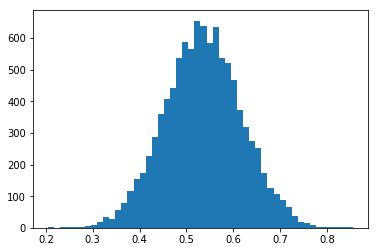

In [34]:
plt.hist(gen*2.06,bins = 50)

In [18]:
filename = "Outputs/"+folder_name+"/"+file_name_start+str(1000//1000)+"k.pkl"
sample_df.to_pickle(filename, protocol = 2)
sample_df = pd.DataFrame()

IOError: [Errno 2] No such file or directory: 'Outputs/kol1d1shear2/kol1d1shear0d01_0-1k.pkl'

In [80]:
sample_df.to_pickle("kol1d1shear0d01_0-10k.pkl",protocol=2)

(9774, 25)


In [10]:
df = pd.read_pickle("Outputs252_0d35/kol1d1shear2/kol1d1shear0d01.pkl")

In [12]:
index = np.array(list(df['index']))
index_length = len(index)
new_index = np.zeros(shape = (index_length//2),dtype = np.int)
for i in range(index_length//2):
    new_index[i] = int(index[2*i])

/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_6686/1156556220.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_index = np.zeros(shape = (index_length//2),dtype = np.int)


In [65]:
print new_index

[    0     2     3 ... 80995 80996 80997]


In [15]:
R2_list = np.zeros(shape = (index_length//2))
psf = galsim.Kolmogorov(half_light_radius = 0.251)
image_epsf = psf.drawImage(scale = 0.2)
for i in range(index_length//2):
    #print i
    gal = cosmos_cat.makeGalaxy(gal_type='parametric',index=new_index[i])
    final = galsim.Convolve([gal,psf])
    image = final.drawImage(scale = 0.2)
    results = galsim.hsm.EstimateShear(image,image_epsf)
    R2_list[i] = results.resolution_factor
    if i%1000 == 0:
        print (i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000


In [16]:
df['R2'] = -1.0
appendy = [val for val in np.array(R2_list) for _ in (0, 1)]
df['R2'] = appendy

In [70]:
df.head()

index                    true_shear  truth_kurtosis  model_kurtosis  \
0      0  galsim.Shear(g1=0.0,g2=0.01)        2.088167        2.091347   
1      0  galsim.Shear(g1=0.0,g2=0.01)        2.088167        2.091347   
2      2  galsim.Shear(g1=0.0,g2=0.01)        2.088167        2.091347   
3      2  galsim.Shear(g1=0.0,g2=0.01)        2.088167        2.091347   
4      3  galsim.Shear(g1=0.0,g2=0.01)        2.088167        2.091347   

                                              R_base  \
0  [0.9983772334700415, -0.03540242660678705, -0....   
1  [0.9841093893840042, -0.0354809151928176, -0.0...   
2  [0.9420960385648464, 0.08096446601157103, 0.08...   
3  [0.9355058142482331, 0.07224181452188533, 0.07...   
4  [0.9912868819004883, -0.11206391991362696, -0....   

                                         e_base  \
0     [0.04431264612499785, 0.3889740654928564]   
1  [-0.04505444695320194, -0.37542546485713313]   
2   [-0.24083040117568713, 0.17452936250894355]   
3     [0.2423628824444475, -0.1545536361224814]   
4    [0.19855929609009323, 0.26944775856513603]   

                                               R_mod  \
0  [0.9984316197051563, -0.03416138550615677, -0....   
1  [0.9843136807546632, -0.034299166204251885, -0...   
2  [0.9419175078725486, 0.08082308746236028, 0.08...   
3  [0.9353382157748946, 0.07211751024215063, 0.07...   
4  [0.9911478292484593, -0.11184860218632908, -0....   

                                          e_mod  psf_size  gal_size  \
0    [0.044064971825032204, 0.3867969456951987]      0.35  0.076803   
1  [-0.04479863667778795, -0.37329053823774544]      0.35  0.076803   
2    [-0.2410496227965338, 0.17468833446647963]      0.35  0.272753   
3   [0.24258421802391125, -0.15469481413518832]      0.35  0.272753   
4    [0.19873393469882233, 0.26968495771540557]      0.35  0.309124   

   sersic_index        R2  
0      0.993942  0.275315  
1      0.993942  0.275315  
2      0.938620  0.728460  
3      0.938620  0.728460  
4      0.469744  0.733083

In [18]:
df.to_pickle("Outputs252/kol1d1shear2/kol1d1shear0d01wR2.pkl", protocol = 2)

In [7]:
#measure config
sample_df = pd.DataFrame()
Shear = galsim.Shear(g1 = 0.0, g2 = 0.01)
kol_index = 1.1
folder_name = ("mof"+str(kol_index)+'shear2').replace(".", "d")
file_name_start = ("mof"+str(kol_index)+"shear"+str(Shear.g2)+"_0-").replace(".", "d")
run_name = "Outputs252_0d3_moffat/"
print( folder_name)
print( file_name_start)


try:
    # Create target Directory
    os.makedirs( run_name +folder_name)
    print("Directory " ,run_name+folder_name ,  " Created ") 
except:
    print("Directory " ,run_name+folder_name,  " already exists")

mof1d1shear2
mof1d1shear0d01_0-
Directory  Outputs252_0d3_moffat/mof1d1shear2  already exists


In [57]:
for index in range(0,90000):
    print( index)
    if index%1000==0 and index!=0:
        filename = run_name+folder_name+"/"+file_name_start+str(index//1000)+"k.pkl"
        sample_df.to_pickle(filename, protocol = 2)
        sample_df = pd.DataFrame()
    
    
    #this_hlr = np.random.normal(loc = 0.26, scale = 0.04)
    
    params = ("moffat",0.3,0.0,0.0,index,Shear,
          {'pixel_scale':0.2,'metacal_method':'estimateShear', 
                                      'mod_kol_radius_ratio':kol_index,
                                      "great3_cat" : cosmos_cat,
                                      'shift': True,
                                       'beta0': 3.5, 'delta_beta': 0.1
                                     })
    
    new_df = df_block(params, index)
    if new_df.shape[0]==0:
        continue
    sample_df = sample_df.append(new_df,ignore_index=True)
    print('yes')
    #clear_output()
    
    
    

0
yes
1
error occured
2
yes
3
yes
4
yes
5
yes
6
yes
7
yes
8
yes
9
yes
10
yes
11
yes
12
yes
13
yes
14
yes
15
error occured
16
yes
17
error occured
18
error occured
19
yes
20
yes
21
yes
22
yes
23
yes
24
yes
25
yes
26
yes
27
yes
28
yes
29
yes
30
yes
31
yes
32
yes
33
yes
34
yes
35
yes
36
yes
37
yes
38
error occured
39
yes
40
yes
41
error occured
42
yes
43
yes
44
yes
45
yes
46
yes
47
yes
48
yes
49
yes
50
yes
51
yes
52
yes
53
yes
54
yes
55
yes
56
error occured
57
yes
58
yes
59
yes
60
yes
61
error occured
62
yes
63
yes
64
yes
65
yes
66
yes
67
yes
68
yes
69
yes
70
yes
71
yes
72
yes
73
yes
74
yes
75
yes
76
yes
77
yes
78
yes
79
yes
80
yes
81
yes
82
yes
83
yes
84
yes
85
yes
86
yes
87
yes
88
yes
89
yes
90
yes
91
yes
92
yes
93
yes
94
yes
95
yes
96
error occured
97
yes
98
yes
99
error occured
100
yes
101
yes
102
yes
103
yes
104
yes
105
yes
106
yes
107
yes
108
yes
109
yes
110
yes
111
error occured
112
yes
113
yes
114
yes
115
yes
116
yes
117
yes
118
error occured
119
yes
120
yes
121
yes
122
yes
123
ye

yes
936
yes
937
error occured
938
yes
939
yes
940
error occured
941
yes
942
yes
943
yes
944
yes
945
yes
946
yes
947
yes
948
error occured
949
yes
950
yes
951
yes
952
yes
953
yes
954
yes
955
yes
956
yes
957
yes
958
yes
959
error occured
960
yes
961
yes
962
yes
963
yes
964
yes
965
yes
966
yes
967
yes
968
yes
969
yes
970
yes
971
yes
972
yes
973
yes
974
error occured
975
yes
976
yes
977
yes
978
yes
979
yes
980
yes
981
yes
982
yes
983
yes
984
yes
985
yes
986
error occured
987
yes
988
yes
989
yes
990
yes
991
yes
992
yes
993
yes
994
yes
995
error occured
996
yes
997
yes
998
yes
999
yes
1000
yes
1001
yes
1002
yes
1003
yes
1004
yes
1005
yes
1006
yes
1007
yes
1008
yes
1009
error occured
1010
yes
1011
yes
1012
yes
1013
yes
1014
yes
1015
yes
1016
yes
1017
yes
1018
yes
1019
yes
1020
yes
1021
yes
1022
yes
1023
yes
1024
yes
1025
yes
1026
yes
1027
yes
1028
yes
1029
yes
1030
yes
1031
yes
1032
yes
1033
error occured
1034
yes
1035
yes
1036
yes
1037
yes
1038
yes
1039
yes
1040
yes
1041
yes
1042
yes
1043
ye

error occured
1748
yes
1749
yes
1750
yes
1751
yes
1752
yes
1753
yes
1754
yes
1755
yes
1756
yes
1757
yes
1758
yes
1759
yes
1760
yes
1761
yes
1762
yes
1763
yes
1764
yes
1765
yes
1766
yes
1767
error occured
1768
yes
1769
yes
1770
yes
1771
yes
1772
yes
1773
yes
1774
yes
1775
yes
1776
yes
1777
yes
1778
yes
1779
yes
1780
yes
1781
error occured
1782
yes
1783
yes
1784
yes
1785
yes
1786
yes
1787
yes
1788
yes
1789
yes
1790
yes
1791
yes
1792
yes
1793
yes
1794
yes
1795
yes
1796
yes
1797
yes
1798
yes
1799
yes
1800
yes
1801
yes
1802
yes
1803
yes
1804
yes
1805
yes
1806
yes
1807
error occured
1808
yes
1809
error occured
1810
yes
1811
yes
1812
yes
1813
error occured
1814
yes
1815
yes
1816
yes
1817
yes
1818
yes
1819
yes
1820
yes
1821
yes
1822
yes
1823
yes
1824
yes
1825
yes
1826
yes
1827
yes
1828
yes
1829
yes
1830
yes
1831
yes
1832
yes
1833
yes
1834
error occured
1835
yes
1836
yes
1837
yes
1838
yes
1839
yes
1840
yes
1841
yes
1842
yes
1843
yes
1844
yes
1845
yes
1846
yes
1847
yes
1848
yes
1849
yes
1850
yes

yes
2582
yes
2583
yes
2584
yes
2585
yes
2586
yes
2587
yes
2588
yes
2589
yes
2590
yes
2591
yes
2592
yes
2593
yes
2594
yes
2595
error occured
2596
yes
2597
yes
2598
yes
2599
yes
2600
yes
2601
yes
2602
yes
2603
yes
2604
error occured
2605
yes
2606
yes
2607
yes
2608
yes
2609
yes
2610
yes
2611
yes
2612
yes
2613
yes
2614
yes
2615
yes
2616
yes
2617
yes
2618
yes
2619
error occured
2620
yes
2621
yes
2622
yes
2623
yes
2624
yes
2625
error occured
2626
yes
2627
yes
2628
yes
2629
yes
2630
error occured
2631
yes
2632
yes
2633
yes
2634
yes
2635
yes
2636
yes
2637
yes
2638
yes
2639
yes
2640
yes
2641
yes
2642
yes
2643
yes
2644
error occured
2645
yes
2646
yes
2647
yes
2648
yes
2649
yes
2650
yes
2651
yes
2652
yes
2653
yes
2654
yes
2655
yes
2656
yes
2657
yes
2658
yes
2659
yes
2660
yes
2661
yes
2662
yes
2663
yes
2664
yes
2665
yes
2666
yes
2667
yes
2668
yes
2669
error occured
2670
yes
2671
yes
2672
yes
2673
yes
2674
yes
2675
yes
2676
yes
2677
yes
2678
yes
2679
yes
2680
error occured
2681
yes
2682
yes
2683
ye

yes
3409
yes
3410
yes
3411
yes
3412
yes
3413
yes
3414
yes
3415
yes
3416
yes
3417
yes
3418
yes
3419
error occured
3420
yes
3421
error occured
3422
yes
3423
yes
3424
yes
3425
yes
3426
yes
3427
yes
3428
yes
3429
yes
3430
yes
3431
yes
3432
yes
3433
yes
3434
yes
3435
yes
3436
yes
3437
yes
3438
yes
3439
yes
3440
yes
3441
yes
3442
yes
3443
yes
3444
yes
3445
yes
3446
yes
3447
yes
3448
yes
3449
yes
3450
yes
3451
yes
3452
yes
3453
yes
3454
yes
3455
yes
3456
error occured
3457
yes
3458
yes
3459
yes
3460
yes
3461
yes
3462
yes
3463
yes
3464
yes
3465
yes
3466
yes
3467
yes
3468
yes
3469
yes
3470
yes
3471
yes
3472
yes
3473
yes
3474
yes
3475
yes
3476
yes
3477
yes
3478
yes
3479
yes
3480
yes
3481
yes
3482
yes
3483
yes
3484
yes
3485
yes
3486
yes
3487
yes
3488
yes
3489
yes
3490
yes
3491
yes
3492
yes
3493
yes
3494
yes
3495
yes
3496
yes
3497
yes
3498
yes
3499
yes
3500
yes
3501
yes
3502
yes
3503
yes
3504
yes
3505
yes
3506
yes
3507
yes
3508
yes
3509
yes
3510
yes
3511
yes
3512
yes
3513
yes
3514
yes
3515
yes
351

yes
4250
error occured
4251
yes
4252
yes
4253
yes
4254
yes
4255
error occured
4256
error occured
4257
yes
4258
yes
4259
yes
4260
yes
4261
yes
4262
yes
4263
yes
4264
yes
4265
yes
4266
yes
4267
yes
4268
yes
4269
yes
4270
yes
4271
yes
4272
yes
4273
yes
4274
yes
4275
error occured
4276
yes
4277
error occured
4278
yes
4279
yes
4280
yes
4281
yes
4282
error occured
4283
yes
4284
yes
4285
yes
4286
yes
4287
yes
4288
yes
4289
yes
4290
yes
4291
yes
4292
yes
4293
yes
4294
yes
4295
yes
4296
yes
4297
yes
4298
yes
4299
yes
4300
yes
4301
yes
4302
yes
4303
yes
4304
yes
4305
yes
4306
yes
4307
yes
4308
yes
4309
yes
4310
yes
4311
yes
4312
yes
4313
yes
4314
yes
4315
yes
4316
yes
4317
yes
4318
yes
4319
yes
4320
error occured
4321
yes
4322
yes
4323
yes
4324
yes
4325
yes
4326
yes
4327
yes
4328
yes
4329
yes
4330
yes
4331
yes
4332
yes
4333
yes
4334
yes
4335
yes
4336
yes
4337
yes
4338
yes
4339
yes
4340
yes
4341
yes
4342
yes
4343
yes
4344
yes
4345
yes
4346
yes
4347
yes
4348
yes
4349
yes
4350
yes
4351
yes
4352
yes

error occured
5093
yes
5094
error occured
5095
yes
5096
yes
5097
yes
5098
yes
5099
yes
5100
yes
5101
yes
5102
yes
5103
yes
5104
yes
5105
yes
5106
yes
5107
yes
5108
yes
5109
yes
5110
yes
5111
yes
5112
error occured
5113
yes
5114
yes
5115
error occured
5116
yes
5117
yes
5118
yes
5119
yes
5120
yes
5121
yes
5122
yes
5123
yes
5124
error occured
5125
yes
5126
yes
5127
yes
5128
yes
5129
yes
5130
yes
5131
error occured
5132
yes
5133
yes
5134
yes
5135
yes
5136
yes
5137
yes
5138
error occured
5139
yes
5140
yes
5141
yes
5142
yes
5143
yes
5144
yes
5145
yes
5146
yes
5147
yes
5148
yes
5149
yes
5150
yes
5151
yes
5152
yes
5153
yes
5154
yes
5155
yes
5156
yes
5157
yes
5158
yes
5159
yes
5160
yes
5161
yes
5162
yes
5163
yes
5164
yes
5165
error occured
5166
yes
5167
yes
5168
error occured
5169
yes
5170
yes
5171
yes
5172
yes
5173
yes
5174
error occured
5175
yes
5176
yes
5177
yes
5178
yes
5179
yes
5180
yes
5181
error occured
5182
yes
5183
yes
5184
yes
5185
yes
5186
yes
5187
yes
5188
yes
5189
yes
5190
yes
5191

yes
5926
yes
5927
error occured
5928
yes
5929
yes
5930
yes
5931
yes
5932
yes
5933
yes
5934
yes
5935
error occured
5936
yes
5937
yes
5938
yes
5939
yes
5940
yes
5941
yes
5942
yes
5943
yes
5944
yes
5945
yes
5946
error occured
5947
yes
5948
yes
5949
yes
5950
yes
5951
yes
5952
yes
5953
yes
5954
yes
5955
yes
5956
error occured
5957
yes
5958
yes
5959
yes
5960
yes
5961
yes
5962
yes
5963
yes
5964
yes
5965
yes
5966
yes
5967
yes
5968
yes
5969
yes
5970
yes
5971
yes
5972
yes
5973
yes
5974
yes
5975
yes
5976
yes
5977
yes
5978
yes
5979
yes
5980
yes
5981
yes
5982
yes
5983
yes
5984
yes
5985
error occured
5986
yes
5987
yes
5988
yes
5989
yes
5990
yes
5991
yes
5992
error occured
5993
yes
5994
yes
5995
yes
5996
yes
5997
yes
5998
yes
5999
yes
6000
yes
6001
yes
6002
yes
6003
yes
6004
yes
6005
yes
6006
yes
6007
yes
6008
yes
6009
yes
6010
yes
6011
yes
6012
yes
6013
yes
6014
yes
6015
yes
6016
yes
6017
yes
6018
yes
6019
yes
6020
yes
6021
yes
6022
yes
6023
yes
6024
error occured
6025
yes
6026
yes
6027
yes
6028
yes

yes
6751
yes
6752
yes
6753
yes
6754
yes
6755
yes
6756
yes
6757
yes
6758
yes
6759
error occured
6760
yes
6761
yes
6762
error occured
6763
yes
6764
yes
6765
yes
6766
error occured
6767
yes
6768
yes
6769
yes
6770
yes
6771
yes
6772
yes
6773
yes
6774
yes
6775
yes
6776
yes
6777
error occured
6778
yes
6779
error occured
6780
yes
6781
yes
6782
yes
6783
yes
6784
yes
6785
yes
6786
yes
6787
yes
6788
yes
6789
error occured
6790
yes
6791
yes
6792
error occured
6793
yes
6794
yes
6795
error occured
6796
yes
6797
yes
6798
yes
6799
yes
6800
yes
6801
yes
6802
yes
6803
yes
6804
yes
6805
yes
6806
yes
6807
yes
6808
yes
6809
yes
6810
yes
6811
yes
6812
yes
6813
yes
6814
yes
6815
error occured
6816
yes
6817
yes
6818
yes
6819
yes
6820
yes
6821
yes
6822
yes
6823
yes
6824
yes
6825
yes
6826
yes
6827
yes
6828
yes
6829
yes
6830
yes
6831
yes
6832
error occured
6833
yes
6834
yes
6835
yes
6836
yes
6837
yes
6838
error occured
6839
yes
6840
yes
6841
yes
6842
yes
6843
yes
6844
yes
6845
error occured
6846
yes
6847
error o

yes
7576
yes
7577
yes
7578
yes
7579
error occured
7580
yes
7581
error occured
7582
yes
7583
yes
7584
yes
7585
yes
7586
yes
7587
yes
7588
yes
7589
yes
7590
yes
7591
yes
7592
yes
7593
yes
7594
yes
7595
yes
7596
error occured
7597
yes
7598
yes
7599
yes
7600
yes
7601
yes
7602
yes
7603
yes
7604
yes
7605
yes
7606
yes
7607
yes
7608
error occured
7609
error occured
7610
yes
7611
error occured
7612
error occured
7613
yes
7614
yes
7615
yes
7616
yes
7617
yes
7618
yes
7619
yes
7620
yes
7621
yes
7622
error occured
7623
yes
7624
yes
7625
yes
7626
yes
7627
yes
7628
yes
7629
yes
7630
yes
7631
yes
7632
yes
7633
error occured
7634
yes
7635
yes
7636
yes
7637
yes
7638
yes
7639
yes
7640
yes
7641
yes
7642
yes
7643
error occured
7644
yes
7645
yes
7646
yes
7647
yes
7648
yes
7649
yes
7650
yes
7651
yes
7652
yes
7653
yes
7654
yes
7655
yes
7656
yes
7657
yes
7658
yes
7659
yes
7660
yes
7661
yes
7662
yes
7663
error occured
7664
yes
7665
yes
7666
yes
7667
yes
7668
yes
7669
error occured
7670
yes
7671
yes
7672
yes
767

yes
8401
yes
8402
yes
8403
yes
8404
yes
8405
yes
8406
yes
8407
yes
8408
yes
8409
yes
8410
yes
8411
yes
8412
yes
8413
error occured
8414
yes
8415
yes
8416
error occured
8417
yes
8418
yes
8419
yes
8420
error occured
8421
yes
8422
yes
8423
yes
8424
yes
8425
yes
8426
yes
8427
yes
8428
yes
8429
yes
8430
yes
8431
yes
8432
yes
8433
yes
8434
yes
8435
yes
8436
yes
8437
yes
8438
yes
8439
yes
8440
yes
8441
yes
8442
yes
8443
yes
8444
yes
8445
yes
8446
yes
8447
yes
8448
yes
8449
yes
8450
yes
8451
yes
8452
yes
8453
yes
8454
yes
8455
yes
8456
yes
8457
yes
8458
yes
8459
yes
8460
yes
8461
yes
8462
yes
8463
yes
8464
yes
8465
yes
8466
yes
8467
yes
8468
yes
8469
yes
8470
yes
8471
yes
8472
yes
8473
yes
8474
yes
8475
yes
8476
yes
8477
error occured
8478
yes
8479
yes
8480
yes
8481
yes
8482
yes
8483
yes
8484
yes
8485
yes
8486
yes
8487
yes
8488
yes
8489
yes
8490
yes
8491
yes
8492
yes
8493
yes
8494
error occured
8495
yes
8496
yes
8497
yes
8498
yes
8499
yes
8500
error occured
8501
yes
8502
yes
8503
yes
8504
yes


yes
9235
yes
9236
yes
9237
yes
9238
yes
9239
yes
9240
yes
9241
yes
9242
yes
9243
error occured
9244
yes
9245
yes
9246
yes
9247
yes
9248
yes
9249
yes
9250
yes
9251
yes
9252
yes
9253
yes
9254
yes
9255
error occured
9256
error occured
9257
yes
9258
yes
9259
yes
9260
error occured
9261
error occured
9262
error occured
9263
yes
9264
yes
9265
yes
9266
yes
9267
yes
9268
yes
9269
yes
9270
yes
9271
yes
9272
yes
9273
yes
9274
yes
9275
yes
9276
yes
9277
yes
9278
error occured
9279
error occured
9280
yes
9281
yes
9282
yes
9283
yes
9284
yes
9285
yes
9286
yes
9287
yes
9288
yes
9289
yes
9290
yes
9291
yes
9292
yes
9293
yes
9294
yes
9295
yes
9296
yes
9297
yes
9298
yes
9299
yes
9300
yes
9301
yes
9302
yes
9303
yes
9304
error occured
9305
yes
9306
yes
9307
yes
9308
yes
9309
yes
9310
yes
9311
yes
9312
yes
9313
yes
9314
yes
9315
yes
9316
yes
9317
yes
9318
yes
9319
yes
9320
yes
9321
error occured
9322
yes
9323
error occured
9324
error occured
9325
yes
9326
yes
9327
error occured
9328
yes
9329
yes
9330
yes
93

yes
10049
yes
10050
yes
10051
yes
10052
yes
10053
yes
10054
yes
10055
yes
10056
yes
10057
yes
10058
yes
10059
yes
10060
yes
10061
yes
10062
yes
10063
error occured
10064
yes
10065
yes
10066
yes
10067
yes
10068
yes
10069
yes
10070
yes
10071
yes
10072
yes
10073
yes
10074
yes
10075
yes
10076
yes
10077
yes
10078
yes
10079
yes
10080
yes
10081
yes
10082
yes
10083
yes
10084
yes
10085
yes
10086
yes
10087
yes
10088
yes
10089
yes
10090
yes
10091
yes
10092
yes
10093
yes
10094
error occured
10095
yes
10096
yes
10097
yes
10098
yes
10099
yes
10100
yes
10101
yes
10102
yes
10103
yes
10104
yes
10105
yes
10106
yes
10107
yes
10108
yes
10109
yes
10110
yes
10111
yes
10112
yes
10113
yes
10114
yes
10115
yes
10116
error occured
10117
yes
10118
yes
10119
yes
10120
yes
10121
yes
10122
yes
10123
error occured
10124
yes
10125
yes
10126
yes
10127
yes
10128
yes
10129
yes
10130
yes
10131
yes
10132
yes
10133
yes
10134
yes
10135
yes
10136
yes
10137
yes
10138
yes
10139
error occured
10140
yes
10141
error occured
10142


yes
10808
error occured
10809
yes
10810
yes
10811
yes
10812
yes
10813
yes
10814
error occured
10815
yes
10816
yes
10817
yes
10818
yes
10819
yes
10820
yes
10821
yes
10822
yes
10823
yes
10824
yes
10825
yes
10826
yes
10827
yes
10828
yes
10829
yes
10830
yes
10831
yes
10832
yes
10833
yes
10834
yes
10835
yes
10836
yes
10837
yes
10838
yes
10839
error occured
10840
yes
10841
yes
10842
error occured
10843
yes
10844
yes
10845
yes
10846
yes
10847
yes
10848
yes
10849
yes
10850
error occured
10851
yes
10852
yes
10853
yes
10854
yes
10855
yes
10856
yes
10857
yes
10858
yes
10859
yes
10860
yes
10861
yes
10862
yes
10863
error occured
10864
yes
10865
yes
10866
yes
10867
yes
10868
yes
10869
yes
10870
error occured
10871
yes
10872
error occured
10873
yes
10874
yes
10875
yes
10876
yes
10877
yes
10878
yes
10879
yes
10880
yes
10881
yes
10882
yes
10883
yes
10884
yes
10885
yes
10886
yes
10887
yes
10888
yes
10889
yes
10890
yes
10891
yes
10892
yes
10893
yes
10894
yes
10895
yes
10896
yes
10897
yes
10898
yes
10899


yes
11562
yes
11563
yes
11564
yes
11565
yes
11566
yes
11567
yes
11568
yes
11569
yes
11570
yes
11571
error occured
11572
yes
11573
yes
11574
yes
11575
yes
11576
error occured
11577
yes
11578
yes
11579
yes
11580
yes
11581
yes
11582
yes
11583
yes
11584
yes
11585
yes
11586
yes
11587
yes
11588
yes
11589
yes
11590
yes
11591
yes
11592
yes
11593
yes
11594
yes
11595
yes
11596
yes
11597
yes
11598
yes
11599
yes
11600
error occured
11601
yes
11602
yes
11603
yes
11604
yes
11605
yes
11606
yes
11607
yes
11608
error occured
11609
yes
11610
yes
11611
yes
11612
yes
11613
yes
11614
yes
11615
yes
11616
yes
11617
yes
11618
error occured
11619
yes
11620
yes
11621
yes
11622
yes
11623
yes
11624
yes
11625
yes
11626
yes
11627
yes
11628
yes
11629
yes
11630
error occured
11631
yes
11632
yes
11633
yes
11634
yes
11635
yes
11636
yes
11637
yes
11638
yes
11639
yes
11640
yes
11641
yes
11642
error occured
11643
yes
11644
yes
11645
yes
11646
yes
11647
error occured
11648
error occured
11649
yes
11650
yes
11651
error occu

yes
12319
yes
12320
yes
12321
error occured
12322
yes
12323
yes
12324
yes
12325
yes
12326
error occured
12327
yes
12328
yes
12329
yes
12330
yes
12331
yes
12332
yes
12333
yes
12334
yes
12335
yes
12336
yes
12337
error occured
12338
error occured
12339
error occured
12340
yes
12341
yes
12342
error occured
12343
yes
12344
yes
12345
yes
12346
yes
12347
error occured
12348
yes
12349
yes
12350
yes
12351
yes
12352
error occured
12353
yes
12354
yes
12355
yes
12356
error occured
12357
yes
12358
yes
12359
yes
12360
yes
12361
yes
12362
yes
12363
yes
12364
yes
12365
yes
12366
yes
12367
yes
12368
yes
12369
yes
12370
yes
12371
yes
12372
yes
12373
yes
12374
yes
12375
yes
12376
yes
12377
yes
12378
yes
12379
yes
12380
yes
12381
yes
12382
yes
12383
yes
12384
yes
12385
yes
12386
yes
12387
yes
12388
yes
12389
yes
12390
yes
12391
yes
12392
yes
12393
yes
12394
error occured
12395
yes
12396
yes
12397
yes
12398
error occured
12399
yes
12400
yes
12401
yes
12402
yes
12403
yes
12404
yes
12405
error occured
12406


yes
13072
yes
13073
yes
13074
yes
13075
yes
13076
yes
13077
yes
13078
yes
13079
yes
13080
yes
13081
yes
13082
yes
13083
yes
13084
yes
13085
yes
13086
yes
13087
yes
13088
yes
13089
yes
13090
yes
13091
yes
13092
yes
13093
yes
13094
yes
13095
yes
13096
yes
13097
yes
13098
yes
13099
yes
13100
error occured
13101
yes
13102
yes
13103
yes
13104
yes
13105
yes
13106
yes
13107
yes
13108
yes
13109
yes
13110
yes
13111
yes
13112
yes
13113
yes
13114
error occured
13115
yes
13116
yes
13117
yes
13118
yes
13119
yes
13120
yes
13121
yes
13122
yes
13123
yes
13124
yes
13125
yes
13126
yes
13127
yes
13128
yes
13129
yes
13130
yes
13131
yes
13132
yes
13133
yes
13134
error occured
13135
yes
13136
yes
13137
yes
13138
yes
13139
yes
13140
yes
13141
error occured
13142
yes
13143
yes
13144
yes
13145
yes
13146
yes
13147
yes
13148
yes
13149
yes
13150
yes
13151
yes
13152
yes
13153
yes
13154
yes
13155
yes
13156
yes
13157
yes
13158
yes
13159
error occured
13160
yes
13161
yes
13162
yes
13163
error occured
13164
yes
13165


yes
13831
yes
13832
yes
13833
yes
13834
yes
13835
yes
13836
yes
13837
yes
13838
yes
13839
yes
13840
yes
13841
yes
13842
yes
13843
error occured
13844
yes
13845
yes
13846
error occured
13847
yes
13848
yes
13849
yes
13850
yes
13851
error occured
13852
yes
13853
yes
13854
yes
13855
yes
13856
yes
13857
yes
13858
yes
13859
yes
13860
yes
13861
yes
13862
yes
13863
yes
13864
yes
13865
yes
13866
yes
13867
yes
13868
error occured
13869
yes
13870
yes
13871
yes
13872
yes
13873
yes
13874
yes
13875
yes
13876
yes
13877
yes
13878
yes
13879
yes
13880
yes
13881
yes
13882
yes
13883
yes
13884
yes
13885
yes
13886
yes
13887
yes
13888
yes
13889
yes
13890
yes
13891
yes
13892
yes
13893
yes
13894
error occured
13895
yes
13896
yes
13897
yes
13898
yes
13899
error occured
13900
yes
13901
yes
13902
yes
13903
yes
13904
yes
13905
yes
13906
yes
13907
yes
13908
yes
13909
yes
13910
yes
13911
yes
13912
yes
13913
yes
13914
yes
13915
yes
13916
yes
13917
error occured
13918
yes
13919
yes
13920
yes
13921
error occured
13922


yes
14588
yes
14589
yes
14590
yes
14591
yes
14592
yes
14593
yes
14594
yes
14595
yes
14596
yes
14597
yes
14598
yes
14599
error occured
14600
yes
14601
yes
14602
error occured
14603
yes
14604
yes
14605
yes
14606
yes
14607
yes
14608
yes
14609
yes
14610
error occured
14611
yes
14612
yes
14613
yes
14614
yes
14615
yes
14616
yes
14617
yes
14618
yes
14619
error occured
14620
yes
14621
yes
14622
yes
14623
yes
14624
yes
14625
yes
14626
yes
14627
yes
14628
yes
14629
yes
14630
yes
14631
yes
14632
yes
14633
yes
14634
yes
14635
yes
14636
yes
14637
yes
14638
yes
14639
yes
14640
yes
14641
error occured
14642
yes
14643
yes
14644
yes
14645
yes
14646
yes
14647
yes
14648
yes
14649
yes
14650
error occured
14651
yes
14652
yes
14653
yes
14654
yes
14655
yes
14656
yes
14657
yes
14658
yes
14659
yes
14660
yes
14661
yes
14662
yes
14663
error occured
14664
yes
14665
yes
14666
yes
14667
yes
14668
yes
14669
yes
14670
yes
14671
yes
14672
yes
14673
yes
14674
error occured
14675
yes
14676
yes
14677
yes
14678
error occu

yes
15353
yes
15354
yes
15355
yes
15356
yes
15357
yes
15358
yes
15359
yes
15360
yes
15361
yes
15362
yes
15363
yes
15364
error occured
15365
yes
15366
yes
15367
yes
15368
error occured
15369
yes
15370
yes
15371
yes
15372
yes
15373
yes
15374
yes
15375
yes
15376
yes
15377
yes
15378
yes
15379
yes
15380
yes
15381
yes
15382
yes
15383
yes
15384
yes
15385
yes
15386
yes
15387
yes
15388
yes
15389
yes
15390
yes
15391
yes
15392
yes
15393
yes
15394
yes
15395
yes
15396
yes
15397
yes
15398
yes
15399
yes
15400
yes
15401
yes
15402
yes
15403
yes
15404
yes
15405
yes
15406
yes
15407
yes
15408
yes
15409
yes
15410
yes
15411
yes
15412
yes
15413
yes
15414
yes
15415
yes
15416
yes
15417
yes
15418
yes
15419
yes
15420
yes
15421
yes
15422
yes
15423
yes
15424
yes
15425
yes
15426
yes
15427
yes
15428
error occured
15429
yes
15430
yes
15431
yes
15432
yes
15433
yes
15434
yes
15435
yes
15436
error occured
15437
yes
15438
yes
15439
error occured
15440
yes
15441
yes
15442
yes
15443
yes
15444
yes
15445
yes
15446
yes
15447


yes
16118
yes
16119
yes
16120
yes
16121
yes
16122
yes
16123
yes
16124
yes
16125
yes
16126
yes
16127
yes
16128
yes
16129
yes
16130
yes
16131
yes
16132
yes
16133
yes
16134
yes
16135
yes
16136
yes
16137
yes
16138
yes
16139
yes
16140
yes
16141
error occured
16142
yes
16143
yes
16144
yes
16145
yes
16146
yes
16147
yes
16148
yes
16149
yes
16150
yes
16151
yes
16152
yes
16153
yes
16154
yes
16155
yes
16156
yes
16157
yes
16158
yes
16159
yes
16160
yes
16161
yes
16162
yes
16163
error occured
16164
yes
16165
yes
16166
yes
16167
yes
16168
yes
16169
error occured
16170
yes
16171
yes
16172
yes
16173
yes
16174
yes
16175
error occured
16176
error occured
16177
yes
16178
yes
16179
yes
16180
yes
16181
yes
16182
yes
16183
yes
16184
yes
16185
yes
16186
yes
16187
yes
16188
yes
16189
yes
16190
yes
16191
yes
16192
yes
16193
yes
16194
yes
16195
yes
16196
error occured
16197
yes
16198
yes
16199
yes
16200
yes
16201
yes
16202
yes
16203
error occured
16204
yes
16205
yes
16206
yes
16207
yes
16208
yes
16209
yes
16210


yes
16866
yes
16867
yes
16868
yes
16869
yes
16870
error occured
16871
error occured
16872
yes
16873
yes
16874
error occured
16875
yes
16876
yes
16877
yes
16878
yes
16879
yes
16880
yes
16881
yes
16882
yes
16883
yes
16884
yes
16885
yes
16886
yes
16887
yes
16888
yes
16889
yes
16890
yes
16891
yes
16892
yes
16893
yes
16894
yes
16895
yes
16896
yes
16897
yes
16898
yes
16899
yes
16900
yes
16901
yes
16902
yes
16903
yes
16904
yes
16905
yes
16906
yes
16907
yes
16908
yes
16909
error occured
16910
error occured
16911
error occured
16912
yes
16913
yes
16914
yes
16915
yes
16916
yes
16917
yes
16918
yes
16919
yes
16920
yes
16921
yes
16922
yes
16923
yes
16924
error occured
16925
error occured
16926
yes
16927
yes
16928
yes
16929
yes
16930
yes
16931
yes
16932
yes
16933
error occured
16934
yes
16935
error occured
16936
yes
16937
yes
16938
yes
16939
yes
16940
yes
16941
yes
16942
yes
16943
yes
16944
yes
16945
yes
16946
yes
16947
yes
16948
yes
16949
yes
16950
yes
16951
yes
16952
error occured
16953
yes
16954


yes
17597
yes
17598
yes
17599
yes
17600
error occured
17601
yes
17602
yes
17603
yes
17604
yes
17605
yes
17606
yes
17607
yes
17608
error occured
17609
yes
17610
yes
17611
yes
17612
yes
17613
error occured
17614
yes
17615
yes
17616
yes
17617
yes
17618
yes
17619
yes
17620
yes
17621
yes
17622
yes
17623
yes
17624
yes
17625
yes
17626
yes
17627
yes
17628
yes
17629
yes
17630
yes
17631
yes
17632
yes
17633
yes
17634
yes
17635
yes
17636
yes
17637
yes
17638
yes
17639
yes
17640
error occured
17641
yes
17642
yes
17643
yes
17644
yes
17645
yes
17646
yes
17647
yes
17648
yes
17649
yes
17650
yes
17651
yes
17652
yes
17653
yes
17654
yes
17655
error occured
17656
yes
17657
error occured
17658
yes
17659
yes
17660
yes
17661
yes
17662
yes
17663
error occured
17664
yes
17665
yes
17666
error occured
17667
yes
17668
yes
17669
yes
17670
yes
17671
yes
17672
yes
17673
yes
17674
yes
17675
yes
17676
yes
17677
yes
17678
yes
17679
yes
17680
yes
17681
yes
17682
yes
17683
yes
17684
yes
17685
yes
17686
yes
17687
yes
17688


yes
18351
yes
18352
yes
18353
yes
18354
yes
18355
yes
18356
yes
18357
yes
18358
yes
18359
yes
18360
error occured
18361
yes
18362
yes
18363
yes
18364
error occured
18365
yes
18366
yes
18367
yes
18368
yes
18369
yes
18370
yes
18371
yes
18372
yes
18373
yes
18374
yes
18375
yes
18376
yes
18377
yes
18378
yes
18379
yes
18380
yes
18381
yes
18382
yes
18383
yes
18384
yes
18385
yes
18386
yes
18387
yes
18388
error occured
18389
error occured
18390
yes
18391
yes
18392
yes
18393
yes
18394
yes
18395
yes
18396
yes
18397
error occured
18398
yes
18399
yes
18400
yes
18401
error occured
18402
yes
18403
yes
18404
yes
18405
yes
18406
yes
18407
yes
18408
yes
18409
yes
18410
yes
18411
yes
18412
yes
18413
yes
18414
yes
18415
yes
18416
yes
18417
yes
18418
yes
18419
yes
18420
yes
18421
yes
18422
yes
18423
yes
18424
yes
18425
yes
18426
error occured
18427
yes
18428
yes
18429
yes
18430
yes
18431
yes
18432
yes
18433
yes
18434
yes
18435
error occured
18436
yes
18437
yes
18438
yes
18439
yes
18440
yes
18441
yes
18442


yes
19102
yes
19103
yes
19104
yes
19105
yes
19106
yes
19107
yes
19108
yes
19109
yes
19110
yes
19111
yes
19112
yes
19113
yes
19114
yes
19115
yes
19116
yes
19117
yes
19118
yes
19119
yes
19120
yes
19121
yes
19122
yes
19123
yes
19124
yes
19125
yes
19126
yes
19127
error occured
19128
yes
19129
yes
19130
yes
19131
yes
19132
yes
19133
yes
19134
yes
19135
yes
19136
yes
19137
yes
19138
yes
19139
yes
19140
yes
19141
yes
19142
yes
19143
yes
19144
yes
19145
yes
19146
yes
19147
yes
19148
yes
19149
yes
19150
yes
19151
yes
19152
yes
19153
yes
19154
yes
19155
yes
19156
yes
19157
yes
19158
yes
19159
yes
19160
yes
19161
yes
19162
yes
19163
yes
19164
yes
19165
error occured
19166
yes
19167
yes
19168
yes
19169
yes
19170
yes
19171
yes
19172
yes
19173
yes
19174
yes
19175
error occured
19176
yes
19177
yes
19178
yes
19179
yes
19180
yes
19181
yes
19182
yes
19183
yes
19184
yes
19185
yes
19186
error occured
19187
yes
19188
error occured
19189
yes
19190
yes
19191
yes
19192
yes
19193
yes
19194
yes
19195
yes
19196


yes
19857
yes
19858
yes
19859
yes
19860
yes
19861
yes
19862
yes
19863
yes
19864
yes
19865
yes
19866
yes
19867
yes
19868
yes
19869
yes
19870
yes
19871
yes
19872
yes
19873
yes
19874
yes
19875
yes
19876
yes
19877
error occured
19878
yes
19879
yes
19880
yes
19881
yes
19882
yes
19883
yes
19884
yes
19885
yes
19886
error occured
19887
yes
19888
yes
19889
yes
19890
yes
19891
yes
19892
yes
19893
yes
19894
yes
19895
yes
19896
yes
19897
yes
19898
yes
19899
yes
19900
yes
19901
error occured
19902
yes
19903
yes
19904
yes
19905
yes
19906
yes
19907
yes
19908
error occured
19909
yes
19910
yes
19911
error occured
19912
yes
19913
yes
19914
yes
19915
yes
19916
yes
19917
yes
19918
yes
19919
yes
19920
yes
19921
yes
19922
yes
19923
error occured
19924
yes
19925
yes
19926
yes
19927
yes
19928
yes
19929
yes
19930
yes
19931
yes
19932
yes
19933
yes
19934
yes
19935
yes
19936
yes
19937
yes
19938
yes
19939
yes
19940
yes
19941
yes
19942
yes
19943
yes
19944
yes
19945
yes
19946
yes
19947
error occured
19948
yes
19949


yes
20613
yes
20614
yes
20615
yes
20616
yes
20617
yes
20618
yes
20619
yes
20620
yes
20621
yes
20622
yes
20623
yes
20624
yes
20625
yes
20626
yes
20627
yes
20628
yes
20629
error occured
20630
yes
20631
yes
20632
yes
20633
yes
20634
yes
20635
yes
20636
yes
20637
yes
20638
yes
20639
yes
20640
error occured
20641
error occured
20642
yes
20643
yes
20644
error occured
20645
error occured
20646
yes
20647
yes
20648
yes
20649
yes
20650
yes
20651
yes
20652
yes
20653
yes
20654
yes
20655
yes
20656
error occured
20657
yes
20658
yes
20659
yes
20660
yes
20661
yes
20662
yes
20663
yes
20664
yes
20665
yes
20666
yes
20667
error occured
20668
yes
20669
yes
20670
yes
20671
yes
20672
yes
20673
yes
20674
yes
20675
yes
20676
yes
20677
yes
20678
yes
20679
yes
20680
yes
20681
yes
20682
yes
20683
yes
20684
yes
20685
yes
20686
yes
20687
yes
20688
yes
20689
yes
20690
yes
20691
yes
20692
yes
20693
yes
20694
yes
20695
yes
20696
yes
20697
yes
20698
yes
20699
yes
20700
yes
20701
error occured
20702
yes
20703
yes
20704


yes
21378
yes
21379
yes
21380
yes
21381
yes
21382
error occured
21383
yes
21384
yes
21385
yes
21386
yes
21387
yes
21388
yes
21389
yes
21390
error occured
21391
yes
21392
yes
21393
yes
21394
yes
21395
yes
21396
yes
21397
yes
21398
yes
21399
yes
21400
yes
21401
yes
21402
yes
21403
error occured
21404
yes
21405
yes
21406
yes
21407
yes
21408
yes
21409
yes
21410
yes
21411
yes
21412
yes
21413
yes
21414
yes
21415
yes
21416
yes
21417
yes
21418
yes
21419
yes
21420
yes
21421
yes
21422
yes
21423
yes
21424
yes
21425
yes
21426
yes
21427
yes
21428
yes
21429
yes
21430
yes
21431
yes
21432
yes
21433
yes
21434
yes
21435
yes
21436
error occured
21437
yes
21438
yes
21439
error occured
21440
yes
21441
yes
21442
yes
21443
yes
21444
yes
21445
yes
21446
yes
21447
yes
21448
error occured
21449
yes
21450
yes
21451
yes
21452
yes
21453
yes
21454
error occured
21455
yes
21456
yes
21457
yes
21458
yes
21459
yes
21460
error occured
21461
yes
21462
error occured
21463
yes
21464
yes
21465
error occured
21466
yes
21467


yes
22129
yes
22130
yes
22131
yes
22132
yes
22133
yes
22134
yes
22135
yes
22136
yes
22137
yes
22138
yes
22139
yes
22140
yes
22141
yes
22142
yes
22143
yes
22144
yes
22145
yes
22146
yes
22147
yes
22148
yes
22149
yes
22150
yes
22151
yes
22152
yes
22153
yes
22154
yes
22155
yes
22156
yes
22157
yes
22158
yes
22159
yes
22160
yes
22161
error occured
22162
yes
22163
yes
22164
yes
22165
yes
22166
error occured
22167
yes
22168
yes
22169
yes
22170
yes
22171
yes
22172
yes
22173
yes
22174
yes
22175
yes
22176
error occured
22177
yes
22178
error occured
22179
yes
22180
yes
22181
yes
22182
yes
22183
yes
22184
yes
22185
yes
22186
yes
22187
yes
22188
yes
22189
error occured
22190
yes
22191
yes
22192
yes
22193
yes
22194
yes
22195
yes
22196
yes
22197
yes
22198
yes
22199
yes
22200
yes
22201
yes
22202
yes
22203
yes
22204
yes
22205
yes
22206
yes
22207
yes
22208
yes
22209
error occured
22210
yes
22211
yes
22212
yes
22213
yes
22214
yes
22215
yes
22216
yes
22217
yes
22218
yes
22219
yes
22220
yes
22221
error occu

error occured
22880
yes
22881
yes
22882
yes
22883
yes
22884
yes
22885
error occured
22886
yes
22887
yes
22888
yes
22889
error occured
22890
yes
22891
yes
22892
yes
22893
yes
22894
error occured
22895
yes
22896
yes
22897
yes
22898
error occured
22899
yes
22900
yes
22901
yes
22902
yes
22903
yes
22904
yes
22905
error occured
22906
yes
22907
yes
22908
yes
22909
yes
22910
yes
22911
yes
22912
yes
22913
yes
22914
yes
22915
yes
22916
yes
22917
yes
22918
yes
22919
yes
22920
yes
22921
yes
22922
yes
22923
yes
22924
yes
22925
yes
22926
yes
22927
yes
22928
yes
22929
yes
22930
yes
22931
yes
22932
yes
22933
yes
22934
yes
22935
yes
22936
yes
22937
yes
22938
yes
22939
yes
22940
yes
22941
yes
22942
yes
22943
yes
22944
yes
22945
yes
22946
error occured
22947
yes
22948
yes
22949
yes
22950
yes
22951
yes
22952
yes
22953
yes
22954
yes
22955
yes
22956
yes
22957
yes
22958
yes
22959
yes
22960
yes
22961
yes
22962
yes
22963
yes
22964
yes
22965
yes
22966
yes
22967
error occured
22968
yes
22969
yes
22970
yes
22971


yes
23632
yes
23633
yes
23634
yes
23635
yes
23636
yes
23637
yes
23638
error occured
23639
yes
23640
error occured
23641
yes
23642
yes
23643
yes
23644
yes
23645
yes
23646
yes
23647
yes
23648
yes
23649
yes
23650
yes
23651
yes
23652
yes
23653
yes
23654
error occured
23655
yes
23656
yes
23657
yes
23658
yes
23659
yes
23660
yes
23661
yes
23662
yes
23663
yes
23664
yes
23665
yes
23666
yes
23667
yes
23668
yes
23669
yes
23670
yes
23671
yes
23672
yes
23673
yes
23674
yes
23675
yes
23676
yes
23677
error occured
23678
yes
23679
yes
23680
yes
23681
yes
23682
yes
23683
yes
23684
yes
23685
yes
23686
yes
23687
yes
23688
yes
23689
yes
23690
error occured
23691
yes
23692
yes
23693
yes
23694
yes
23695
yes
23696
yes
23697
yes
23698
error occured
23699
yes
23700
yes
23701
yes
23702
yes
23703
error occured
23704
yes
23705
yes
23706
yes
23707
yes
23708
yes
23709
yes
23710
yes
23711
yes
23712
yes
23713
yes
23714
yes
23715
yes
23716
yes
23717
yes
23718
yes
23719
yes
23720
yes
23721
yes
23722
yes
23723
yes
23724


yes
24382
yes
24383
yes
24384
error occured
24385
yes
24386
yes
24387
yes
24388
yes
24389
yes
24390
yes
24391
yes
24392
yes
24393
yes
24394
error occured
24395
yes
24396
yes
24397
yes
24398
yes
24399
yes
24400
error occured
24401
yes
24402
yes
24403
yes
24404
error occured
24405
yes
24406
error occured
24407
yes
24408
yes
24409
yes
24410
yes
24411
yes
24412
yes
24413
error occured
24414
yes
24415
yes
24416
yes
24417
yes
24418
yes
24419
yes
24420
yes
24421
yes
24422
yes
24423
yes
24424
error occured
24425
yes
24426
yes
24427
yes
24428
yes
24429
yes
24430
yes
24431
yes
24432
yes
24433
yes
24434
yes
24435
yes
24436
yes
24437
error occured
24438
yes
24439
yes
24440
yes
24441
yes
24442
yes
24443
yes
24444
yes
24445
yes
24446
yes
24447
yes
24448
yes
24449
yes
24450
yes
24451
yes
24452
yes
24453
yes
24454
error occured
24455
yes
24456
yes
24457
yes
24458
error occured
24459
error occured
24460
yes
24461
yes
24462
yes
24463
yes
24464
yes
24465
yes
24466
yes
24467
yes
24468
yes
24469
yes
24470


yes
25127
yes
25128
yes
25129
yes
25130
yes
25131
yes
25132
yes
25133
yes
25134
yes
25135
yes
25136
yes
25137
yes
25138
yes
25139
yes
25140
yes
25141
yes
25142
yes
25143
error occured
25144
yes
25145
yes
25146
yes
25147
yes
25148
yes
25149
yes
25150
yes
25151
yes
25152
yes
25153
yes
25154
yes
25155
yes
25156
yes
25157
yes
25158
yes
25159
yes
25160
yes
25161
yes
25162
error occured
25163
yes
25164
yes
25165
yes
25166
yes
25167
yes
25168
yes
25169
yes
25170
yes
25171
yes
25172
yes
25173
yes
25174
yes
25175
yes
25176
yes
25177
yes
25178
yes
25179
yes
25180
error occured
25181
yes
25182
yes
25183
yes
25184
yes
25185
yes
25186
error occured
25187
yes
25188
yes
25189
error occured
25190
yes
25191
yes
25192
yes
25193
yes
25194
yes
25195
yes
25196
error occured
25197
yes
25198
yes
25199
error occured
25200
yes
25201
yes
25202
yes
25203
error occured
25204
yes
25205
yes
25206
yes
25207
yes
25208
error occured
25209
yes
25210
error occured
25211
yes
25212
error occured
25213
yes
25214
yes
25215


yes
25870
yes
25871
yes
25872
yes
25873
yes
25874
yes
25875
yes
25876
yes
25877
yes
25878
yes
25879
yes
25880
yes
25881
yes
25882
yes
25883
yes
25884
yes
25885
yes
25886
yes
25887
yes
25888
yes
25889
yes
25890
yes
25891
yes
25892
yes
25893
yes
25894
yes
25895
yes
25896
yes
25897
yes
25898
yes
25899
yes
25900
yes
25901
yes
25902
yes
25903
yes
25904
yes
25905
yes
25906
yes
25907
yes
25908
yes
25909
error occured
25910
yes
25911
yes
25912
error occured
25913
yes
25914
yes
25915
yes
25916
yes
25917
yes
25918
error occured
25919
yes
25920
yes
25921
yes
25922
yes
25923
error occured
25924
yes
25925
yes
25926
error occured
25927
yes
25928
yes
25929
yes
25930
yes
25931
yes
25932
yes
25933
yes
25934
yes
25935
yes
25936
yes
25937
yes
25938
yes
25939
yes
25940
yes
25941
yes
25942
yes
25943
yes
25944
yes
25945
yes
25946
yes
25947
yes
25948
yes
25949
yes
25950
yes
25951
yes
25952
yes
25953
yes
25954
yes
25955
yes
25956
yes
25957
yes
25958
yes
25959
yes
25960
yes
25961
yes
25962
yes
25963
yes
25964


yes
26634
error occured
26635
yes
26636
yes
26637
yes
26638
yes
26639
yes
26640
yes
26641
yes
26642
error occured
26643
yes
26644
yes
26645
yes
26646
yes
26647
yes
26648
yes
26649
yes
26650
yes
26651
yes
26652
error occured
26653
yes
26654
yes
26655
yes
26656
yes
26657
yes
26658
yes
26659
yes
26660
yes
26661
yes
26662
yes
26663
yes
26664
yes
26665
error occured
26666
yes
26667
error occured
26668
yes
26669
yes
26670
yes
26671
yes
26672
yes
26673
yes
26674
yes
26675
yes
26676
yes
26677
yes
26678
yes
26679
yes
26680
yes
26681
yes
26682
yes
26683
yes
26684
yes
26685
yes
26686
yes
26687
yes
26688
yes
26689
yes
26690
yes
26691
yes
26692
yes
26693
yes
26694
yes
26695
yes
26696
yes
26697
yes
26698
yes
26699
yes
26700
yes
26701
yes
26702
yes
26703
yes
26704
yes
26705
yes
26706
yes
26707
yes
26708
yes
26709
yes
26710
yes
26711
yes
26712
yes
26713
yes
26714
yes
26715
yes
26716
yes
26717
yes
26718
yes
26719
yes
26720
yes
26721
yes
26722
yes
26723
yes
26724
yes
26725
yes
26726
yes
26727
yes
26728


yes
27388
yes
27389
yes
27390
yes
27391
yes
27392
error occured
27393
yes
27394
yes
27395
yes
27396
yes
27397
yes
27398
yes
27399
yes
27400
yes
27401
yes
27402
yes
27403
yes
27404
yes
27405
yes
27406
error occured
27407
yes
27408
yes
27409
yes
27410
yes
27411
yes
27412
yes
27413
yes
27414
yes
27415
error occured
27416
error occured
27417
yes
27418
yes
27419
yes
27420
yes
27421
yes
27422
yes
27423
yes
27424
yes
27425
yes
27426
yes
27427
yes
27428
yes
27429
yes
27430
yes
27431
error occured
27432
yes
27433
yes
27434
yes
27435
yes
27436
yes
27437
yes
27438
yes
27439
yes
27440
yes
27441
yes
27442
yes
27443
yes
27444
yes
27445
yes
27446
yes
27447
yes
27448
yes
27449
yes
27450
yes
27451
yes
27452
yes
27453
yes
27454
yes
27455
yes
27456
yes
27457
yes
27458
yes
27459
yes
27460
yes
27461
yes
27462
yes
27463
error occured
27464
yes
27465
yes
27466
yes
27467
yes
27468
error occured
27469
yes
27470
yes
27471
yes
27472
yes
27473
yes
27474
yes
27475
yes
27476
yes
27477
yes
27478
yes
27479
yes
27480


yes
28162
yes
28163
yes
28164
yes
28165
yes
28166
yes
28167
yes
28168
yes
28169
yes
28170
yes
28171
yes
28172
yes
28173
yes
28174
yes
28175
yes
28176
yes
28177
error occured
28178
yes
28179
yes
28180
yes
28181
yes
28182
yes
28183
yes
28184
yes
28185
yes
28186
yes
28187
error occured
28188
yes
28189
yes
28190
yes
28191
yes
28192
yes
28193
yes
28194
yes
28195
yes
28196
yes
28197
yes
28198
yes
28199
yes
28200
yes
28201
yes
28202
yes
28203
yes
28204
yes
28205
yes
28206
yes
28207
yes
28208
yes
28209
yes
28210
yes
28211
yes
28212
yes
28213
yes
28214
yes
28215
yes
28216
yes
28217
yes
28218
yes
28219
yes
28220
yes
28221
yes
28222
yes
28223
yes
28224
yes
28225
yes
28226
yes
28227
yes
28228
yes
28229
yes
28230
yes
28231
yes
28232
yes
28233
yes
28234
yes
28235
yes
28236
yes
28237
yes
28238
yes
28239
yes
28240
yes
28241
yes
28242
yes
28243
yes
28244
yes
28245
yes
28246
yes
28247
yes
28248
yes
28249
yes
28250
yes
28251
yes
28252
yes
28253
yes
28254
yes
28255
yes
28256
yes
28257
yes
28258
yes
28259


error occured
28906
yes
28907
yes
28908
yes
28909
yes
28910
yes
28911
yes
28912
yes
28913
error occured
28914
yes
28915
yes
28916
yes
28917
yes
28918
yes
28919
yes
28920
yes
28921
yes
28922
yes
28923
yes
28924
yes
28925
yes
28926
yes
28927
yes
28928
yes
28929
yes
28930
yes
28931
error occured
28932
yes
28933
yes
28934
yes
28935
yes
28936
yes
28937
yes
28938
yes
28939
yes
28940
yes
28941
yes
28942
yes
28943
error occured
28944
error occured
28945
yes
28946
yes
28947
yes
28948
yes
28949
yes
28950
yes
28951
yes
28952
yes
28953
yes
28954
yes
28955
yes
28956
yes
28957
yes
28958
yes
28959
yes
28960
yes
28961
yes
28962
yes
28963
error occured
28964
yes
28965
error occured
28966
yes
28967
yes
28968
yes
28969
yes
28970
yes
28971
yes
28972
yes
28973
yes
28974
yes
28975
yes
28976
yes
28977
yes
28978
yes
28979
yes
28980
yes
28981
yes
28982
yes
28983
yes
28984
yes
28985
yes
28986
yes
28987
yes
28988
yes
28989
yes
28990
yes
28991
yes
28992
yes
28993
yes
28994
yes
28995
yes
28996
yes
28997
yes
28998


yes
29666
error occured
29667
yes
29668
yes
29669
error occured
29670
yes
29671
yes
29672
yes
29673
yes
29674
yes
29675
yes
29676
yes
29677
yes
29678
yes
29679
yes
29680
yes
29681
yes
29682
yes
29683
yes
29684
error occured
29685
yes
29686
yes
29687
yes
29688
yes
29689
yes
29690
error occured
29691
yes
29692
yes
29693
error occured
29694
yes
29695
yes
29696
error occured
29697
yes
29698
yes
29699
yes
29700
yes
29701
error occured
29702
yes
29703
yes
29704
yes
29705
error occured
29706
yes
29707
yes
29708
yes
29709
yes
29710
yes
29711
yes
29712
yes
29713
yes
29714
yes
29715
yes
29716
yes
29717
yes
29718
error occured
29719
yes
29720
yes
29721
yes
29722
yes
29723
yes
29724
yes
29725
yes
29726
yes
29727
error occured
29728
yes
29729
yes
29730
yes
29731
error occured
29732
yes
29733
yes
29734
yes
29735
yes
29736
yes
29737
yes
29738
yes
29739
error occured
29740
yes
29741
yes
29742
yes
29743
yes
29744
yes
29745
yes
29746
yes
29747
yes
29748
yes
29749
error occured
29750
yes
29751
yes
29752


yes
30412
yes
30413
yes
30414
yes
30415
yes
30416
yes
30417
yes
30418
yes
30419
error occured
30420
yes
30421
error occured
30422
yes
30423
yes
30424
yes
30425
yes
30426
yes
30427
error occured
30428
error occured
30429
yes
30430
yes
30431
error occured
30432
yes
30433
yes
30434
yes
30435
yes
30436
yes
30437
yes
30438
yes
30439
yes
30440
yes
30441
error occured
30442
error occured
30443
yes
30444
yes
30445
error occured
30446
yes
30447
yes
30448
yes
30449
yes
30450
yes
30451
yes
30452
yes
30453
yes
30454
yes
30455
yes
30456
error occured
30457
yes
30458
yes
30459
yes
30460
yes
30461
yes
30462
error occured
30463
yes
30464
yes
30465
yes
30466
yes
30467
yes
30468
yes
30469
yes
30470
yes
30471
yes
30472
yes
30473
yes
30474
yes
30475
yes
30476
yes
30477
yes
30478
yes
30479
yes
30480
yes
30481
yes
30482
yes
30483
yes
30484
yes
30485
yes
30486
yes
30487
yes
30488
yes
30489
yes
30490
yes
30491
yes
30492
yes
30493
yes
30494
yes
30495
yes
30496
yes
30497
yes
30498
yes
30499
yes
30500
yes
30501


yes
31161
yes
31162
yes
31163
yes
31164
yes
31165
yes
31166
error occured
31167
yes
31168
yes
31169
yes
31170
yes
31171
yes
31172
yes
31173
yes
31174
yes
31175
yes
31176
yes
31177
error occured
31178
yes
31179
yes
31180
yes
31181
yes
31182
yes
31183
yes
31184
yes
31185
yes
31186
yes
31187
yes
31188
yes
31189
yes
31190
yes
31191
yes
31192
error occured
31193
yes
31194
yes
31195
yes
31196
yes
31197
yes
31198
yes
31199
yes
31200
yes
31201
error occured
31202
yes
31203
yes
31204
yes
31205
yes
31206
yes
31207
yes
31208
yes
31209
yes
31210
yes
31211
yes
31212
yes
31213
yes
31214
yes
31215
yes
31216
yes
31217
yes
31218
yes
31219
yes
31220
yes
31221
yes
31222
yes
31223
yes
31224
yes
31225
yes
31226
yes
31227
yes
31228
yes
31229
error occured
31230
yes
31231
yes
31232
yes
31233
yes
31234
yes
31235
yes
31236
error occured
31237
yes
31238
yes
31239
yes
31240
yes
31241
yes
31242
yes
31243
error occured
31244
yes
31245
yes
31246
yes
31247
yes
31248
yes
31249
yes
31250
yes
31251
yes
31252
yes
31253


yes
31910
yes
31911
yes
31912
yes
31913
yes
31914
error occured
31915
yes
31916
yes
31917
yes
31918
yes
31919
yes
31920
yes
31921
error occured
31922
yes
31923
error occured
31924
yes
31925
yes
31926
yes
31927
yes
31928
yes
31929
yes
31930
yes
31931
yes
31932
yes
31933
yes
31934
yes
31935
yes
31936
error occured
31937
yes
31938
yes
31939
yes
31940
yes
31941
yes
31942
yes
31943
yes
31944
yes
31945
yes
31946
yes
31947
yes
31948
yes
31949
yes
31950
yes
31951
yes
31952
yes
31953
yes
31954
yes
31955
yes
31956
yes
31957
yes
31958
yes
31959
yes
31960
error occured
31961
yes
31962
yes
31963
yes
31964
yes
31965
yes
31966
yes
31967
yes
31968
yes
31969
yes
31970
yes
31971
yes
31972
yes
31973
error occured
31974
yes
31975
yes
31976
yes
31977
yes
31978
yes
31979
yes
31980
yes
31981
yes
31982
yes
31983
error occured
31984
yes
31985
yes
31986
yes
31987
yes
31988
yes
31989
yes
31990
error occured
31991
yes
31992
yes
31993
yes
31994
yes
31995
yes
31996
yes
31997
yes
31998
yes
31999
yes
32000
error occu

yes
32662
yes
32663
yes
32664
error occured
32665
yes
32666
yes
32667
yes
32668
yes
32669
yes
32670
yes
32671
yes
32672
yes
32673
yes
32674
error occured
32675
yes
32676
yes
32677
yes
32678
yes
32679
yes
32680
yes
32681
yes
32682
error occured
32683
yes
32684
yes
32685
yes
32686
yes
32687
yes
32688
yes
32689
yes
32690
yes
32691
yes
32692
yes
32693
yes
32694
yes
32695
yes
32696
error occured
32697
yes
32698
yes
32699
yes
32700
yes
32701
yes
32702
yes
32703
error occured
32704
yes
32705
yes
32706
yes
32707
yes
32708
yes
32709
yes
32710
error occured
32711
yes
32712
yes
32713
error occured
32714
yes
32715
yes
32716
yes
32717
yes
32718
yes
32719
yes
32720
yes
32721
yes
32722
yes
32723
yes
32724
error occured
32725
yes
32726
yes
32727
yes
32728
yes
32729
error occured
32730
error occured
32731
yes
32732
yes
32733
error occured
32734
yes
32735
yes
32736
yes
32737
yes
32738
yes
32739
yes
32740
yes
32741
yes
32742
yes
32743
yes
32744
yes
32745
yes
32746
yes
32747
yes
32748
yes
32749
yes
32750


yes
33411
yes
33412
yes
33413
yes
33414
yes
33415
yes
33416
yes
33417
yes
33418
yes
33419
yes
33420
yes
33421
yes
33422
yes
33423
error occured
33424
yes
33425
yes
33426
yes
33427
error occured
33428
yes
33429
yes
33430
yes
33431
yes
33432
yes
33433
yes
33434
yes
33435
yes
33436
yes
33437
yes
33438
yes
33439
yes
33440
yes
33441
yes
33442
yes
33443
yes
33444
yes
33445
yes
33446
yes
33447
yes
33448
yes
33449
error occured
33450
yes
33451
yes
33452
yes
33453
yes
33454
error occured
33455
yes
33456
yes
33457
yes
33458
yes
33459
yes
33460
yes
33461
yes
33462
yes
33463
yes
33464
yes
33465
yes
33466
yes
33467
yes
33468
yes
33469
yes
33470
yes
33471
yes
33472
yes
33473
yes
33474
error occured
33475
yes
33476
yes
33477
yes
33478
yes
33479
yes
33480
error occured
33481
yes
33482
yes
33483
yes
33484
yes
33485
yes
33486
yes
33487
yes
33488
yes
33489
yes
33490
yes
33491
yes
33492
error occured
33493
yes
33494
yes
33495
yes
33496
yes
33497
yes
33498
yes
33499
yes
33500
yes
33501
yes
33502
error occu

yes
34157
yes
34158
error occured
34159
yes
34160
yes
34161
yes
34162
yes
34163
yes
34164
yes
34165
error occured
34166
yes
34167
yes
34168
yes
34169
yes
34170
yes
34171
error occured
34172
yes
34173
error occured
34174
error occured
34175
yes
34176
yes
34177
yes
34178
yes
34179
yes
34180
yes
34181
yes
34182
yes
34183
yes
34184
yes
34185
yes
34186
yes
34187
yes
34188
yes
34189
yes
34190
yes
34191
yes
34192
yes
34193
yes
34194
yes
34195
yes
34196
yes
34197
yes
34198
yes
34199
error occured
34200
yes
34201
yes
34202
error occured
34203
yes
34204
yes
34205
error occured
34206
yes
34207
yes
34208
yes
34209
yes
34210
yes
34211
yes
34212
yes
34213
yes
34214
yes
34215
yes
34216
yes
34217
error occured
34218
error occured
34219
yes
34220
yes
34221
yes
34222
yes
34223
yes
34224
yes
34225
yes
34226
yes
34227
error occured
34228
yes
34229
yes
34230
yes
34231
yes
34232
yes
34233
yes
34234
yes
34235
yes
34236
yes
34237
yes
34238
yes
34239
yes
34240
yes
34241
yes
34242
yes
34243
error occured
34244


yes
34898
yes
34899
yes
34900
yes
34901
yes
34902
yes
34903
yes
34904
yes
34905
yes
34906
yes
34907
yes
34908
error occured
34909
yes
34910
yes
34911
yes
34912
error occured
34913
yes
34914
yes
34915
yes
34916
yes
34917
error occured
34918
yes
34919
yes
34920
yes
34921
yes
34922
yes
34923
yes
34924
yes
34925
yes
34926
yes
34927
yes
34928
yes
34929
yes
34930
yes
34931
yes
34932
yes
34933
yes
34934
yes
34935
yes
34936
error occured
34937
yes
34938
yes
34939
yes
34940
yes
34941
yes
34942
error occured
34943
yes
34944
yes
34945
yes
34946
yes
34947
yes
34948
yes
34949
yes
34950
yes
34951
yes
34952
yes
34953
yes
34954
yes
34955
yes
34956
yes
34957
yes
34958
yes
34959
yes
34960
yes
34961
yes
34962
yes
34963
yes
34964
yes
34965
error occured
34966
yes
34967
yes
34968
yes
34969
yes
34970
yes
34971
yes
34972
yes
34973
yes
34974
yes
34975
yes
34976
yes
34977
yes
34978
yes
34979
yes
34980
yes
34981
yes
34982
yes
34983
yes
34984
yes
34985
yes
34986
yes
34987
yes
34988
yes
34989
yes
34990
yes
34991


yes
35645
yes
35646
yes
35647
yes
35648
error occured
35649
yes
35650
yes
35651
yes
35652
yes
35653
yes
35654
error occured
35655
yes
35656
yes
35657
yes
35658
yes
35659
yes
35660
yes
35661
yes
35662
yes
35663
yes
35664
yes
35665
yes
35666
error occured
35667
yes
35668
yes
35669
yes
35670
error occured
35671
yes
35672
yes
35673
yes
35674
yes
35675
yes
35676
yes
35677
yes
35678
yes
35679
yes
35680
yes
35681
yes
35682
yes
35683
yes
35684
yes
35685
yes
35686
yes
35687
yes
35688
yes
35689
error occured
35690
yes
35691
yes
35692
yes
35693
yes
35694
error occured
35695
error occured
35696
yes
35697
yes
35698
yes
35699
yes
35700
yes
35701
yes
35702
yes
35703
yes
35704
yes
35705
yes
35706
yes
35707
yes
35708
yes
35709
yes
35710
yes
35711
yes
35712
yes
35713
yes
35714
yes
35715
yes
35716
yes
35717
yes
35718
yes
35719
yes
35720
yes
35721
yes
35722
error occured
35723
yes
35724
yes
35725
yes
35726
yes
35727
error occured
35728
yes
35729
yes
35730
yes
35731
yes
35732
yes
35733
error occured
35734


yes
36398
yes
36399
yes
36400
error occured
36401
yes
36402
yes
36403
yes
36404
yes
36405
yes
36406
yes
36407
yes
36408
yes
36409
yes
36410
yes
36411
yes
36412
yes
36413
yes
36414
yes
36415
yes
36416
yes
36417
yes
36418
yes
36419
yes
36420
yes
36421
error occured
36422
yes
36423
yes
36424
yes
36425
yes
36426
yes
36427
yes
36428
yes
36429
yes
36430
yes
36431
yes
36432
yes
36433
yes
36434
yes
36435
yes
36436
yes
36437
yes
36438
yes
36439
error occured
36440
yes
36441
yes
36442
yes
36443
yes
36444
yes
36445
yes
36446
yes
36447
yes
36448
yes
36449
yes
36450
yes
36451
yes
36452
yes
36453
error occured
36454
yes
36455
yes
36456
error occured
36457
yes
36458
yes
36459
yes
36460
error occured
36461
yes
36462
yes
36463
yes
36464
error occured
36465
yes
36466
yes
36467
yes
36468
yes
36469
yes
36470
yes
36471
yes
36472
yes
36473
yes
36474
yes
36475
yes
36476
yes
36477
yes
36478
yes
36479
yes
36480
error occured
36481
yes
36482
error occured
36483
yes
36484
yes
36485
yes
36486
error occured
36487


yes
37136
yes
37137
yes
37138
yes
37139
yes
37140
yes
37141
yes
37142
yes
37143
yes
37144
yes
37145
yes
37146
yes
37147
error occured
37148
yes
37149
yes
37150
yes
37151
yes
37152
yes
37153
yes
37154
yes
37155
yes
37156
yes
37157
yes
37158
yes
37159
yes
37160
yes
37161
yes
37162
yes
37163
yes
37164
error occured
37165
yes
37166
yes
37167
yes
37168
error occured
37169
yes
37170
yes
37171
yes
37172
yes
37173
yes
37174
yes
37175
yes
37176
yes
37177
yes
37178
yes
37179
yes
37180
yes
37181
yes
37182
yes
37183
yes
37184
yes
37185
yes
37186
yes
37187
yes
37188
yes
37189
yes
37190
yes
37191
yes
37192
yes
37193
error occured
37194
yes
37195
error occured
37196
yes
37197
yes
37198
yes
37199
yes
37200
yes
37201
yes
37202
yes
37203
yes
37204
yes
37205
yes
37206
yes
37207
yes
37208
yes
37209
yes
37210
yes
37211
yes
37212
yes
37213
yes
37214
yes
37215
yes
37216
yes
37217
error occured
37218
yes
37219
yes
37220
yes
37221
yes
37222
yes
37223
yes
37224
yes
37225
yes
37226
yes
37227
yes
37228
yes
37229


yes
37895
yes
37896
yes
37897
yes
37898
yes
37899
yes
37900
yes
37901
error occured
37902
yes
37903
yes
37904
yes
37905
yes
37906
yes
37907
error occured
37908
yes
37909
yes
37910
yes
37911
yes
37912
yes
37913
yes
37914
yes
37915
yes
37916
yes
37917
yes
37918
yes
37919
yes
37920
yes
37921
yes
37922
yes
37923
yes
37924
yes
37925
yes
37926
yes
37927
yes
37928
yes
37929
yes
37930
yes
37931
yes
37932
yes
37933
yes
37934
yes
37935
yes
37936
yes
37937
yes
37938
yes
37939
yes
37940
yes
37941
yes
37942
yes
37943
yes
37944
yes
37945
yes
37946
yes
37947
yes
37948
yes
37949
yes
37950
yes
37951
yes
37952
error occured
37953
yes
37954
yes
37955
yes
37956
yes
37957
yes
37958
error occured
37959
yes
37960
yes
37961
yes
37962
yes
37963
yes
37964
yes
37965
yes
37966
yes
37967
yes
37968
yes
37969
yes
37970
yes
37971
yes
37972
yes
37973
yes
37974
yes
37975
yes
37976
yes
37977
yes
37978
yes
37979
yes
37980
yes
37981
error occured
37982
yes
37983
yes
37984
yes
37985
yes
37986
yes
37987
yes
37988
yes
37989


yes
38643
yes
38644
yes
38645
yes
38646
yes
38647
yes
38648
yes
38649
yes
38650
yes
38651
error occured
38652
yes
38653
yes
38654
yes
38655
yes
38656
yes
38657
yes
38658
yes
38659
yes
38660
yes
38661
yes
38662
yes
38663
yes
38664
yes
38665
yes
38666
yes
38667
error occured
38668
yes
38669
yes
38670
yes
38671
yes
38672
yes
38673
error occured
38674
yes
38675
yes
38676
yes
38677
yes
38678
yes
38679
yes
38680
yes
38681
yes
38682
yes
38683
yes
38684
yes
38685
yes
38686
error occured
38687
yes
38688
yes
38689
yes
38690
yes
38691
yes
38692
yes
38693
error occured
38694
error occured
38695
yes
38696
yes
38697
yes
38698
yes
38699
yes
38700
yes
38701
yes
38702
yes
38703
error occured
38704
yes
38705
yes
38706
yes
38707
yes
38708
yes
38709
yes
38710
yes
38711
yes
38712
yes
38713
yes
38714
yes
38715
yes
38716
yes
38717
yes
38718
yes
38719
yes
38720
yes
38721
yes
38722
yes
38723
yes
38724
yes
38725
yes
38726
yes
38727
yes
38728
yes
38729
yes
38730
error occured
38731
yes
38732
yes
38733
yes
38734


yes
39389
error occured
39390
yes
39391
yes
39392
yes
39393
yes
39394
error occured
39395
yes
39396
yes
39397
yes
39398
yes
39399
yes
39400
yes
39401
yes
39402
yes
39403
error occured
39404
yes
39405
yes
39406
yes
39407
yes
39408
yes
39409
error occured
39410
yes
39411
yes
39412
yes
39413
yes
39414
yes
39415
yes
39416
yes
39417
yes
39418
yes
39419
yes
39420
yes
39421
yes
39422
yes
39423
yes
39424
yes
39425
yes
39426
yes
39427
yes
39428
yes
39429
yes
39430
yes
39431
yes
39432
yes
39433
yes
39434
yes
39435
yes
39436
yes
39437
yes
39438
error occured
39439
error occured
39440
yes
39441
yes
39442
yes
39443
yes
39444
yes
39445
yes
39446
yes
39447
yes
39448
yes
39449
yes
39450
yes
39451
error occured
39452
yes
39453
error occured
39454
yes
39455
error occured
39456
yes
39457
yes
39458
yes
39459
yes
39460
yes
39461
yes
39462
yes
39463
yes
39464
yes
39465
error occured
39466
yes
39467
yes
39468
yes
39469
yes
39470
yes
39471
yes
39472
error occured
39473
yes
39474
yes
39475
yes
39476
yes
39477


yes
40131
yes
40132
error occured
40133
yes
40134
yes
40135
yes
40136
yes
40137
yes
40138
yes
40139
yes
40140
yes
40141
yes
40142
error occured
40143
yes
40144
yes
40145
yes
40146
yes
40147
yes
40148
yes
40149
yes
40150
yes
40151
yes
40152
yes
40153
yes
40154
yes
40155
yes
40156
yes
40157
yes
40158
yes
40159
yes
40160
yes
40161
yes
40162
error occured
40163
yes
40164
yes
40165
yes
40166
yes
40167
yes
40168
yes
40169
yes
40170
yes
40171
yes
40172
yes
40173
yes
40174
yes
40175
error occured
40176
yes
40177
yes
40178
yes
40179
error occured
40180
yes
40181
yes
40182
yes
40183
yes
40184
yes
40185
yes
40186
yes
40187
yes
40188
yes
40189
yes
40190
yes
40191
yes
40192
yes
40193
yes
40194
yes
40195
yes
40196
yes
40197
yes
40198
yes
40199
yes
40200
yes
40201
yes
40202
yes
40203
yes
40204
yes
40205
yes
40206
yes
40207
yes
40208
error occured
40209
yes
40210
yes
40211
yes
40212
yes
40213
yes
40214
yes
40215
yes
40216
yes
40217
yes
40218
yes
40219
yes
40220
error occured
40221
yes
40222
yes
40223


yes
40891
yes
40892
yes
40893
yes
40894
yes
40895
yes
40896
yes
40897
yes
40898
yes
40899
yes
40900
yes
40901
yes
40902
yes
40903
yes
40904
yes
40905
yes
40906
yes
40907
yes
40908
yes
40909
yes
40910
yes
40911
yes
40912
error occured
40913
yes
40914
yes
40915
yes
40916
yes
40917
yes
40918
yes
40919
yes
40920
yes
40921
yes
40922
yes
40923
yes
40924
yes
40925
yes
40926
error occured
40927
yes
40928
yes
40929
yes
40930
yes
40931
yes
40932
yes
40933
yes
40934
yes
40935
yes
40936
yes
40937
yes
40938
yes
40939
error occured
40940
yes
40941
yes
40942
yes
40943
yes
40944
yes
40945
yes
40946
yes
40947
yes
40948
yes
40949
yes
40950
yes
40951
error occured
40952
yes
40953
yes
40954
yes
40955
yes
40956
yes
40957
yes
40958
yes
40959
yes
40960
yes
40961
error occured
40962
error occured
40963
yes
40964
yes
40965
yes
40966
yes
40967
yes
40968
yes
40969
error occured
40970
yes
40971
yes
40972
yes
40973
yes
40974
yes
40975
yes
40976
yes
40977
yes
40978
yes
40979
yes
40980
yes
40981
yes
40982
yes
40983


yes
41640
yes
41641
yes
41642
yes
41643
error occured
41644
yes
41645
yes
41646
yes
41647
yes
41648
error occured
41649
yes
41650
yes
41651
yes
41652
yes
41653
yes
41654
yes
41655
yes
41656
yes
41657
yes
41658
yes
41659
error occured
41660
yes
41661
yes
41662
error occured
41663
yes
41664
yes
41665
yes
41666
yes
41667
yes
41668
error occured
41669
error occured
41670
yes
41671
yes
41672
yes
41673
yes
41674
yes
41675
yes
41676
yes
41677
yes
41678
yes
41679
yes
41680
yes
41681
yes
41682
yes
41683
error occured
41684
yes
41685
yes
41686
yes
41687
yes
41688
error occured
41689
yes
41690
yes
41691
yes
41692
yes
41693
yes
41694
yes
41695
yes
41696
yes
41697
yes
41698
yes
41699
yes
41700
yes
41701
yes
41702
yes
41703
error occured
41704
yes
41705
yes
41706
yes
41707
yes
41708
yes
41709
yes
41710
yes
41711
yes
41712
yes
41713
yes
41714
yes
41715
yes
41716
yes
41717
yes
41718
yes
41719
yes
41720
yes
41721
yes
41722
yes
41723
error occured
41724
error occured
41725
error occured
41726
yes
41727


yes
42387
yes
42388
yes
42389
yes
42390
yes
42391
yes
42392
yes
42393
yes
42394
yes
42395
yes
42396
yes
42397
yes
42398
yes
42399
yes
42400
yes
42401
yes
42402
yes
42403
yes
42404
error occured
42405
error occured
42406
yes
42407
yes
42408
yes
42409
yes
42410
yes
42411
yes
42412
yes
42413
yes
42414
yes
42415
yes
42416
yes
42417
yes
42418
yes
42419
yes
42420
yes
42421
error occured
42422
yes
42423
yes
42424
yes
42425
yes
42426
yes
42427
yes
42428
error occured
42429
yes
42430
yes
42431
yes
42432
yes
42433
yes
42434
yes
42435
yes
42436
yes
42437
yes
42438
yes
42439
yes
42440
yes
42441
yes
42442
yes
42443
yes
42444
yes
42445
yes
42446
yes
42447
yes
42448
yes
42449
error occured
42450
yes
42451
yes
42452
yes
42453
yes
42454
yes
42455
yes
42456
yes
42457
yes
42458
yes
42459
yes
42460
yes
42461
yes
42462
yes
42463
error occured
42464
yes
42465
yes
42466
yes
42467
yes
42468
yes
42469
yes
42470
yes
42471
yes
42472
error occured
42473
yes
42474
yes
42475
yes
42476
yes
42477
yes
42478
error occu

yes
43151
yes
43152
yes
43153
yes
43154
yes
43155
yes
43156
yes
43157
yes
43158
yes
43159
yes
43160
yes
43161
yes
43162
yes
43163
yes
43164
yes
43165
yes
43166
yes
43167
yes
43168
yes
43169
yes
43170
yes
43171
yes
43172
yes
43173
yes
43174
yes
43175
yes
43176
yes
43177
yes
43178
yes
43179
yes
43180
yes
43181
yes
43182
yes
43183
yes
43184
yes
43185
yes
43186
yes
43187
yes
43188
yes
43189
yes
43190
yes
43191
yes
43192
yes
43193
yes
43194
yes
43195
yes
43196
error occured
43197
yes
43198
yes
43199
yes
43200
yes
43201
yes
43202
yes
43203
yes
43204
yes
43205
yes
43206
error occured
43207
yes
43208
yes
43209
yes
43210
yes
43211
yes
43212
yes
43213
yes
43214
yes
43215
yes
43216
yes
43217
error occured
43218
yes
43219
yes
43220
yes
43221
yes
43222
yes
43223
yes
43224
yes
43225
yes
43226
yes
43227
yes
43228
yes
43229
yes
43230
yes
43231
yes
43232
error occured
43233
yes
43234
yes
43235
yes
43236
yes
43237
yes
43238
yes
43239
yes
43240
yes
43241
yes
43242
yes
43243
yes
43244
yes
43245
yes
43246


yes
43909
yes
43910
yes
43911
error occured
43912
yes
43913
yes
43914
yes
43915
yes
43916
yes
43917
yes
43918
yes
43919
yes
43920
yes
43921
yes
43922
yes
43923
yes
43924
yes
43925
yes
43926
yes
43927
yes
43928
yes
43929
yes
43930
yes
43931
yes
43932
yes
43933
yes
43934
yes
43935
yes
43936
yes
43937
yes
43938
yes
43939
yes
43940
yes
43941
yes
43942
error occured
43943
yes
43944
yes
43945
error occured
43946
yes
43947
yes
43948
yes
43949
error occured
43950
yes
43951
error occured
43952
yes
43953
yes
43954
yes
43955
yes
43956
yes
43957
yes
43958
yes
43959
yes
43960
yes
43961
yes
43962
yes
43963
yes
43964
yes
43965
yes
43966
yes
43967
yes
43968
yes
43969
yes
43970
yes
43971
yes
43972
error occured
43973
error occured
43974
yes
43975
yes
43976
yes
43977
yes
43978
yes
43979
yes
43980
yes
43981
error occured
43982
yes
43983
yes
43984
yes
43985
yes
43986
yes
43987
yes
43988
yes
43989
yes
43990
yes
43991
yes
43992
yes
43993
yes
43994
error occured
43995
yes
43996
yes
43997
yes
43998
yes
43999


yes
44661
yes
44662
yes
44663
yes
44664
yes
44665
yes
44666
yes
44667
yes
44668
yes
44669
yes
44670
yes
44671
yes
44672
yes
44673
yes
44674
yes
44675
error occured
44676
error occured
44677
yes
44678
yes
44679
yes
44680
yes
44681
yes
44682
error occured
44683
error occured
44684
yes
44685
yes
44686
yes
44687
yes
44688
yes
44689
yes
44690
yes
44691
yes
44692
yes
44693
yes
44694
yes
44695
yes
44696
yes
44697
yes
44698
yes
44699
yes
44700
error occured
44701
yes
44702
yes
44703
yes
44704
yes
44705
yes
44706
yes
44707
yes
44708
yes
44709
yes
44710
yes
44711
yes
44712
yes
44713
yes
44714
yes
44715
error occured
44716
yes
44717
yes
44718
yes
44719
yes
44720
yes
44721
yes
44722
yes
44723
yes
44724
yes
44725
yes
44726
yes
44727
yes
44728
yes
44729
yes
44730
yes
44731
yes
44732
yes
44733
yes
44734
yes
44735
error occured
44736
yes
44737
yes
44738
yes
44739
yes
44740
yes
44741
yes
44742
yes
44743
yes
44744
yes
44745
error occured
44746
yes
44747
yes
44748
yes
44749
yes
44750
yes
44751
yes
44752


yes
45428
yes
45429
yes
45430
yes
45431
yes
45432
yes
45433
yes
45434
yes
45435
yes
45436
yes
45437
yes
45438
yes
45439
yes
45440
yes
45441
yes
45442
yes
45443
yes
45444
yes
45445
yes
45446
error occured
45447
yes
45448
yes
45449
yes
45450
yes
45451
yes
45452
yes
45453
error occured
45454
yes
45455
yes
45456
yes
45457
yes
45458
yes
45459
yes
45460
yes
45461
yes
45462
yes
45463
yes
45464
yes
45465
yes
45466
yes
45467
yes
45468
yes
45469
yes
45470
yes
45471
yes
45472
yes
45473
yes
45474
yes
45475
yes
45476
yes
45477
yes
45478
yes
45479
yes
45480
yes
45481
yes
45482
yes
45483
yes
45484
yes
45485
yes
45486
yes
45487
yes
45488
yes
45489
yes
45490
yes
45491
yes
45492
yes
45493
yes
45494
yes
45495
error occured
45496
yes
45497
yes
45498
yes
45499
yes
45500
yes
45501
yes
45502
yes
45503
yes
45504
yes
45505
yes
45506
error occured
45507
error occured
45508
yes
45509
yes
45510
yes
45511
yes
45512
yes
45513
yes
45514
yes
45515
yes
45516
yes
45517
yes
45518
yes
45519
yes
45520
yes
45521
yes
45522


yes
46192
error occured
46193
yes
46194
yes
46195
yes
46196
yes
46197
yes
46198
yes
46199
yes
46200
yes
46201
yes
46202
yes
46203
yes
46204
yes
46205
error occured
46206
error occured
46207
yes
46208
yes
46209
yes
46210
yes
46211
yes
46212
yes
46213
yes
46214
yes
46215
yes
46216
error occured
46217
yes
46218
yes
46219
yes
46220
yes
46221
yes
46222
error occured
46223
yes
46224
yes
46225
yes
46226
yes
46227
yes
46228
yes
46229
yes
46230
yes
46231
yes
46232
yes
46233
yes
46234
yes
46235
yes
46236
yes
46237
yes
46238
yes
46239
error occured
46240
yes
46241
error occured
46242
yes
46243
yes
46244
yes
46245
yes
46246
yes
46247
yes
46248
error occured
46249
yes
46250
error occured
46251
yes
46252
error occured
46253
yes
46254
yes
46255
yes
46256
yes
46257
yes
46258
yes
46259
yes
46260
yes
46261
yes
46262
yes
46263
yes
46264
yes
46265
yes
46266
yes
46267
yes
46268
yes
46269
error occured
46270
yes
46271
yes
46272
yes
46273
yes
46274
error occured
46275
yes
46276
yes
46277
yes
46278
yes
46279


yes
46936
yes
46937
error occured
46938
yes
46939
yes
46940
yes
46941
yes
46942
error occured
46943
yes
46944
yes
46945
yes
46946
yes
46947
yes
46948
yes
46949
yes
46950
yes
46951
error occured
46952
yes
46953
yes
46954
yes
46955
yes
46956
yes
46957
yes
46958
yes
46959
error occured
46960
yes
46961
yes
46962
yes
46963
error occured
46964
yes
46965
error occured
46966
yes
46967
yes
46968
yes
46969
yes
46970
yes
46971
yes
46972
yes
46973
yes
46974
yes
46975
yes
46976
yes
46977
yes
46978
yes
46979
yes
46980
yes
46981
yes
46982
yes
46983
error occured
46984
yes
46985
yes
46986
yes
46987
yes
46988
yes
46989
yes
46990
yes
46991
yes
46992
yes
46993
yes
46994
yes
46995
yes
46996
yes
46997
yes
46998
yes
46999
yes
47000
yes
47001
yes
47002
yes
47003
yes
47004
yes
47005
yes
47006
yes
47007
yes
47008
yes
47009
yes
47010
error occured
47011
yes
47012
yes
47013
yes
47014
yes
47015
yes
47016
yes
47017
yes
47018
yes
47019
yes
47020
yes
47021
error occured
47022
yes
47023
yes
47024
error occured
47025


yes
47678
yes
47679
yes
47680
yes
47681
yes
47682
yes
47683
yes
47684
yes
47685
yes
47686
yes
47687
yes
47688
yes
47689
yes
47690
yes
47691
yes
47692
yes
47693
yes
47694
yes
47695
yes
47696
yes
47697
yes
47698
yes
47699
yes
47700
yes
47701
yes
47702
yes
47703
yes
47704
yes
47705
yes
47706
yes
47707
yes
47708
yes
47709
yes
47710
yes
47711
yes
47712
error occured
47713
yes
47714
yes
47715
yes
47716
yes
47717
yes
47718
error occured
47719
yes
47720
error occured
47721
yes
47722
yes
47723
yes
47724
yes
47725
yes
47726
yes
47727
yes
47728
yes
47729
yes
47730
yes
47731
yes
47732
yes
47733
yes
47734
yes
47735
yes
47736
yes
47737
yes
47738
yes
47739
yes
47740
yes
47741
yes
47742
yes
47743
yes
47744
yes
47745
yes
47746
error occured
47747
error occured
47748
yes
47749
yes
47750
yes
47751
yes
47752
error occured
47753
yes
47754
yes
47755
yes
47756
yes
47757
yes
47758
yes
47759
yes
47760
yes
47761
yes
47762
yes
47763
yes
47764
yes
47765
yes
47766
error occured
47767
yes
47768
yes
47769
yes
47770


yes
48429
yes
48430
yes
48431
yes
48432
yes
48433
yes
48434
yes
48435
error occured
48436
yes
48437
yes
48438
yes
48439
yes
48440
yes
48441
yes
48442
yes
48443
yes
48444
yes
48445
yes
48446
yes
48447
yes
48448
yes
48449
yes
48450
yes
48451
yes
48452
yes
48453
yes
48454
yes
48455
error occured
48456
yes
48457
yes
48458
yes
48459
yes
48460
yes
48461
yes
48462
yes
48463
yes
48464
yes
48465
yes
48466
error occured
48467
yes
48468
yes
48469
error occured
48470
yes
48471
yes
48472
error occured
48473
yes
48474
error occured
48475
yes
48476
yes
48477
yes
48478
yes
48479
yes
48480
yes
48481
yes
48482
yes
48483
yes
48484
yes
48485
yes
48486
yes
48487
yes
48488
yes
48489
error occured
48490
yes
48491
yes
48492
yes
48493
yes
48494
yes
48495
yes
48496
yes
48497
yes
48498
yes
48499
error occured
48500
error occured
48501
yes
48502
yes
48503
yes
48504
yes
48505
yes
48506
yes
48507
yes
48508
error occured
48509
yes
48510
yes
48511
yes
48512
yes
48513
yes
48514
yes
48515
yes
48516
yes
48517
yes
48518


yes
49179
yes
49180
yes
49181
yes
49182
yes
49183
error occured
49184
yes
49185
yes
49186
yes
49187
yes
49188
yes
49189
yes
49190
yes
49191
yes
49192
error occured
49193
yes
49194
error occured
49195
error occured
49196
yes
49197
yes
49198
yes
49199
yes
49200
yes
49201
yes
49202
yes
49203
yes
49204
yes
49205
yes
49206
yes
49207
yes
49208
yes
49209
error occured
49210
error occured
49211
yes
49212
yes
49213
yes
49214
yes
49215
yes
49216
yes
49217
yes
49218
yes
49219
error occured
49220
yes
49221
yes
49222
yes
49223
yes
49224
yes
49225
yes
49226
yes
49227
yes
49228
yes
49229
yes
49230
yes
49231
yes
49232
error occured
49233
yes
49234
yes
49235
yes
49236
yes
49237
yes
49238
error occured
49239
yes
49240
yes
49241
yes
49242
yes
49243
yes
49244
yes
49245
yes
49246
error occured
49247
yes
49248
yes
49249
yes
49250
yes
49251
yes
49252
yes
49253
error occured
49254
yes
49255
yes
49256
yes
49257
yes
49258
yes
49259
yes
49260
yes
49261
yes
49262
yes
49263
yes
49264
yes
49265
yes
49266
yes
49267


error occured
49923
yes
49924
yes
49925
yes
49926
yes
49927
yes
49928
yes
49929
yes
49930
yes
49931
yes
49932
yes
49933
yes
49934
yes
49935
yes
49936
error occured
49937
yes
49938
yes
49939
yes
49940
yes
49941
yes
49942
yes
49943
yes
49944
yes
49945
error occured
49946
yes
49947
yes
49948
yes
49949
yes
49950
yes
49951
yes
49952
yes
49953
yes
49954
yes
49955
yes
49956
yes
49957
yes
49958
yes
49959
yes
49960
yes
49961
yes
49962
yes
49963
yes
49964
yes
49965
yes
49966
error occured
49967
yes
49968
error occured
49969
yes
49970
yes
49971
yes
49972
yes
49973
yes
49974
error occured
49975
yes
49976
yes
49977
yes
49978
yes
49979
yes
49980
yes
49981
yes
49982
yes
49983
yes
49984
yes
49985
yes
49986
yes
49987
yes
49988
yes
49989
yes
49990
yes
49991
yes
49992
yes
49993
yes
49994
yes
49995
yes
49996
error occured
49997
yes
49998
yes
49999
yes
50000
yes
50001
yes
50002
error occured
50003
yes
50004
yes
50005
yes
50006
error occured
50007
yes
50008
yes
50009
yes
50010
yes
50011
yes
50012
yes
50013


yes
50675
yes
50676
yes
50677
yes
50678
yes
50679
yes
50680
yes
50681
yes
50682
yes
50683
error occured
50684
error occured
50685
yes
50686
yes
50687
yes
50688
yes
50689
yes
50690
yes
50691
yes
50692
yes
50693
yes
50694
yes
50695
yes
50696
yes
50697
yes
50698
yes
50699
yes
50700
yes
50701
yes
50702
yes
50703
yes
50704
yes
50705
yes
50706
yes
50707
yes
50708
yes
50709
yes
50710
yes
50711
yes
50712
yes
50713
yes
50714
yes
50715
yes
50716
yes
50717
yes
50718
yes
50719
yes
50720
yes
50721
yes
50722
yes
50723
yes
50724
yes
50725
yes
50726
error occured
50727
yes
50728
yes
50729
yes
50730
yes
50731
yes
50732
error occured
50733
yes
50734
yes
50735
yes
50736
yes
50737
yes
50738
yes
50739
yes
50740
yes
50741
yes
50742
yes
50743
yes
50744
yes
50745
yes
50746
yes
50747
yes
50748
yes
50749
yes
50750
yes
50751
yes
50752
error occured
50753
yes
50754
yes
50755
yes
50756
yes
50757
yes
50758
yes
50759
yes
50760
yes
50761
yes
50762
yes
50763
yes
50764
yes
50765
yes
50766
yes
50767
yes
50768
yes
50769


yes
51437
yes
51438
yes
51439
yes
51440
yes
51441
yes
51442
yes
51443
yes
51444
yes
51445
error occured
51446
yes
51447
yes
51448
yes
51449
yes
51450
yes
51451
yes
51452
yes
51453
yes
51454
error occured
51455
yes
51456
yes
51457
yes
51458
yes
51459
yes
51460
yes
51461
yes
51462
yes
51463
yes
51464
error occured
51465
yes
51466
yes
51467
yes
51468
yes
51469
yes
51470
yes
51471
yes
51472
yes
51473
yes
51474
yes
51475
yes
51476
yes
51477
error occured
51478
yes
51479
yes
51480
yes
51481
yes
51482
yes
51483
yes
51484
yes
51485
yes
51486
yes
51487
yes
51488
yes
51489
yes
51490
yes
51491
yes
51492
yes
51493
yes
51494
yes
51495
yes
51496
yes
51497
yes
51498
yes
51499
yes
51500
yes
51501
yes
51502
yes
51503
yes
51504
yes
51505
yes
51506
yes
51507
yes
51508
error occured
51509
yes
51510
yes
51511
yes
51512
yes
51513
yes
51514
yes
51515
yes
51516
yes
51517
yes
51518
yes
51519
yes
51520
yes
51521
yes
51522
yes
51523
yes
51524
error occured
51525
error occured
51526
yes
51527
yes
51528
yes
51529


yes
52183
yes
52184
yes
52185
error occured
52186
yes
52187
yes
52188
yes
52189
yes
52190
yes
52191
yes
52192
yes
52193
yes
52194
yes
52195
yes
52196
yes
52197
yes
52198
yes
52199
yes
52200
yes
52201
yes
52202
yes
52203
yes
52204
yes
52205
yes
52206
yes
52207
yes
52208
yes
52209
yes
52210
yes
52211
yes
52212
yes
52213
yes
52214
yes
52215
yes
52216
error occured
52217
yes
52218
yes
52219
yes
52220
yes
52221
yes
52222
error occured
52223
error occured
52224
yes
52225
yes
52226
yes
52227
yes
52228
yes
52229
yes
52230
yes
52231
yes
52232
yes
52233
yes
52234
yes
52235
yes
52236
yes
52237
yes
52238
yes
52239
yes
52240
yes
52241
yes
52242
yes
52243
yes
52244
yes
52245
error occured
52246
yes
52247
yes
52248
yes
52249
yes
52250
yes
52251
yes
52252
yes
52253
yes
52254
yes
52255
yes
52256
yes
52257
yes
52258
yes
52259
yes
52260
yes
52261
error occured
52262
yes
52263
yes
52264
error occured
52265
yes
52266
yes
52267
yes
52268
yes
52269
yes
52270
yes
52271
yes
52272
yes
52273
yes
52274
yes
52275


yes
52936
yes
52937
yes
52938
yes
52939
yes
52940
yes
52941
yes
52942
yes
52943
yes
52944
yes
52945
yes
52946
yes
52947
yes
52948
yes
52949
yes
52950
yes
52951
yes
52952
yes
52953
yes
52954
yes
52955
yes
52956
yes
52957
yes
52958
yes
52959
yes
52960
yes
52961
yes
52962
yes
52963
yes
52964
yes
52965
yes
52966
yes
52967
yes
52968
yes
52969
yes
52970
yes
52971
yes
52972
yes
52973
yes
52974
yes
52975
yes
52976
yes
52977
yes
52978
yes
52979
yes
52980
yes
52981
error occured
52982
yes
52983
yes
52984
yes
52985
error occured
52986
yes
52987
yes
52988
yes
52989
yes
52990
yes
52991
yes
52992
yes
52993
yes
52994
yes
52995
yes
52996
yes
52997
yes
52998
yes
52999
error occured
53000
yes
53001
yes
53002
yes
53003
yes
53004
yes
53005
yes
53006
error occured
53007
error occured
53008
yes
53009
yes
53010
yes
53011
yes
53012
yes
53013
yes
53014
yes
53015
yes
53016
yes
53017
yes
53018
error occured
53019
yes
53020
yes
53021
yes
53022
yes
53023
yes
53024
yes
53025
yes
53026
yes
53027
error occured
53028


yes
53693
yes
53694
yes
53695
yes
53696
yes
53697
yes
53698
yes
53699
yes
53700
yes
53701
yes
53702
yes
53703
yes
53704
yes
53705
yes
53706
yes
53707
error occured
53708
yes
53709
yes
53710
yes
53711
yes
53712
yes
53713
yes
53714
yes
53715
yes
53716
yes
53717
yes
53718
yes
53719
yes
53720
yes
53721
error occured
53722
yes
53723
error occured
53724
error occured
53725
yes
53726
yes
53727
yes
53728
yes
53729
yes
53730
yes
53731
yes
53732
yes
53733
yes
53734
yes
53735
yes
53736
yes
53737
yes
53738
yes
53739
yes
53740
yes
53741
yes
53742
error occured
53743
error occured
53744
yes
53745
yes
53746
yes
53747
yes
53748
yes
53749
error occured
53750
yes
53751
yes
53752
error occured
53753
yes
53754
yes
53755
yes
53756
yes
53757
yes
53758
yes
53759
error occured
53760
yes
53761
yes
53762
yes
53763
yes
53764
yes
53765
yes
53766
error occured
53767
yes
53768
yes
53769
yes
53770
yes
53771
yes
53772
yes
53773
yes
53774
error occured
53775
yes
53776
error occured
53777
yes
53778
yes
53779
yes
53780


yes
54442
yes
54443
yes
54444
yes
54445
yes
54446
yes
54447
yes
54448
yes
54449
yes
54450
yes
54451
yes
54452
yes
54453
yes
54454
yes
54455
yes
54456
yes
54457
yes
54458
error occured
54459
yes
54460
yes
54461
yes
54462
yes
54463
yes
54464
yes
54465
yes
54466
yes
54467
error occured
54468
yes
54469
yes
54470
yes
54471
yes
54472
yes
54473
yes
54474
yes
54475
error occured
54476
yes
54477
yes
54478
yes
54479
yes
54480
yes
54481
yes
54482
yes
54483
yes
54484
yes
54485
error occured
54486
error occured
54487
yes
54488
yes
54489
yes
54490
yes
54491
yes
54492
yes
54493
yes
54494
yes
54495
yes
54496
yes
54497
yes
54498
yes
54499
yes
54500
yes
54501
yes
54502
yes
54503
yes
54504
error occured
54505
yes
54506
yes
54507
yes
54508
yes
54509
yes
54510
yes
54511
yes
54512
yes
54513
yes
54514
yes
54515
yes
54516
yes
54517
yes
54518
yes
54519
yes
54520
error occured
54521
yes
54522
yes
54523
error occured
54524
yes
54525
yes
54526
yes
54527
yes
54528
yes
54529
yes
54530
yes
54531
yes
54532
yes
54533


error occured
55185
yes
55186
error occured
55187
yes
55188
yes
55189
yes
55190
yes
55191
yes
55192
yes
55193
yes
55194
yes
55195
yes
55196
yes
55197
yes
55198
yes
55199
yes
55200
yes
55201
yes
55202
yes
55203
yes
55204
yes
55205
yes
55206
yes
55207
yes
55208
yes
55209
yes
55210
yes
55211
yes
55212
yes
55213
yes
55214
yes
55215
yes
55216
yes
55217
yes
55218
yes
55219
yes
55220
yes
55221
yes
55222
yes
55223
yes
55224
yes
55225
yes
55226
yes
55227
yes
55228
yes
55229
yes
55230
yes
55231
yes
55232
yes
55233
yes
55234
yes
55235
yes
55236
yes
55237
yes
55238
yes
55239
yes
55240
yes
55241
yes
55242
yes
55243
yes
55244
yes
55245
yes
55246
yes
55247
yes
55248
error occured
55249
yes
55250
yes
55251
yes
55252
yes
55253
yes
55254
yes
55255
yes
55256
yes
55257
yes
55258
yes
55259
yes
55260
yes
55261
yes
55262
yes
55263
yes
55264
yes
55265
yes
55266
yes
55267
yes
55268
yes
55269
yes
55270
yes
55271
yes
55272
yes
55273
yes
55274
yes
55275
yes
55276
yes
55277
yes
55278
yes
55279
yes
55280
error occu

yes
55942
error occured
55943
yes
55944
yes
55945
yes
55946
yes
55947
yes
55948
yes
55949
yes
55950
yes
55951
yes
55952
yes
55953
yes
55954
yes
55955
yes
55956
yes
55957
yes
55958
yes
55959
yes
55960
yes
55961
yes
55962
yes
55963
yes
55964
yes
55965
yes
55966
yes
55967
yes
55968
yes
55969
yes
55970
yes
55971
error occured
55972
yes
55973
yes
55974
yes
55975
yes
55976
yes
55977
yes
55978
yes
55979
yes
55980
yes
55981
yes
55982
yes
55983
yes
55984
yes
55985
yes
55986
yes
55987
yes
55988
error occured
55989
yes
55990
yes
55991
yes
55992
yes
55993
yes
55994
yes
55995
yes
55996
yes
55997
yes
55998
error occured
55999
yes
56000
yes
56001
error occured
56002
yes
56003
yes
56004
yes
56005
error occured
56006
yes
56007
yes
56008
error occured
56009
yes
56010
yes
56011
yes
56012
yes
56013
yes
56014
yes
56015
yes
56016
yes
56017
yes
56018
yes
56019
yes
56020
yes
56021
yes
56022
error occured
56023
yes
56024
error occured
56025
yes
56026
yes
56027
yes
56028
yes
56029
yes
56030
yes
56031
yes
56032


yes
56690
yes
56691
yes
56692
yes
56693
yes
56694
yes
56695
yes
56696
yes
56697
yes
56698
yes
56699
yes
56700
yes
56701
yes
56702
yes
56703
yes
56704
yes
56705
error occured
56706
error occured
56707
error occured
56708
yes
56709
yes
56710
yes
56711
yes
56712
yes
56713
yes
56714
yes
56715
yes
56716
yes
56717
yes
56718
yes
56719
yes
56720
yes
56721
yes
56722
yes
56723
yes
56724
yes
56725
yes
56726
yes
56727
yes
56728
yes
56729
yes
56730
yes
56731
yes
56732
yes
56733
yes
56734
yes
56735
yes
56736
yes
56737
error occured
56738
error occured
56739
yes
56740
yes
56741
error occured
56742
yes
56743
yes
56744
yes
56745
yes
56746
yes
56747
yes
56748
yes
56749
yes
56750
yes
56751
yes
56752
yes
56753
error occured
56754
yes
56755
yes
56756
yes
56757
yes
56758
yes
56759
yes
56760
yes
56761
yes
56762
yes
56763
yes
56764
yes
56765
yes
56766
yes
56767
yes
56768
error occured
56769
yes
56770
yes
56771
yes
56772
yes
56773
yes
56774
yes
56775
yes
56776
yes
56777
yes
56778
yes
56779
yes
56780
yes
56781


yes
57441
yes
57442
yes
57443
yes
57444
yes
57445
yes
57446
yes
57447
yes
57448
error occured
57449
yes
57450
yes
57451
yes
57452
yes
57453
yes
57454
yes
57455
yes
57456
yes
57457
yes
57458
yes
57459
yes
57460
yes
57461
yes
57462
yes
57463
yes
57464
error occured
57465
yes
57466
yes
57467
yes
57468
yes
57469
yes
57470
yes
57471
error occured
57472
yes
57473
yes
57474
yes
57475
yes
57476
yes
57477
error occured
57478
yes
57479
yes
57480
yes
57481
yes
57482
yes
57483
yes
57484
yes
57485
yes
57486
error occured
57487
yes
57488
yes
57489
yes
57490
yes
57491
yes
57492
yes
57493
yes
57494
yes
57495
yes
57496
yes
57497
yes
57498
error occured
57499
yes
57500
yes
57501
yes
57502
yes
57503
error occured
57504
yes
57505
yes
57506
yes
57507
yes
57508
yes
57509
yes
57510
yes
57511
yes
57512
yes
57513
error occured
57514
yes
57515
yes
57516
yes
57517
yes
57518
error occured
57519
yes
57520
yes
57521
yes
57522
yes
57523
yes
57524
yes
57525
yes
57526
yes
57527
yes
57528
yes
57529
yes
57530
yes
57531


yes
58193
yes
58194
yes
58195
yes
58196
yes
58197
error occured
58198
yes
58199
yes
58200
yes
58201
yes
58202
error occured
58203
yes
58204
yes
58205
yes
58206
yes
58207
yes
58208
yes
58209
yes
58210
yes
58211
yes
58212
yes
58213
yes
58214
yes
58215
yes
58216
yes
58217
yes
58218
error occured
58219
yes
58220
yes
58221
yes
58222
yes
58223
yes
58224
yes
58225
error occured
58226
yes
58227
yes
58228
yes
58229
error occured
58230
yes
58231
yes
58232
yes
58233
yes
58234
yes
58235
yes
58236
yes
58237
error occured
58238
error occured
58239
yes
58240
yes
58241
yes
58242
error occured
58243
yes
58244
yes
58245
yes
58246
yes
58247
yes
58248
yes
58249
yes
58250
yes
58251
yes
58252
yes
58253
yes
58254
yes
58255
yes
58256
yes
58257
yes
58258
yes
58259
yes
58260
yes
58261
yes
58262
yes
58263
yes
58264
yes
58265
yes
58266
yes
58267
yes
58268
yes
58269
yes
58270
yes
58271
yes
58272
yes
58273
yes
58274
error occured
58275
yes
58276
yes
58277
yes
58278
yes
58279
yes
58280
yes
58281
yes
58282
yes
58283


yes
58942
yes
58943
yes
58944
yes
58945
yes
58946
yes
58947
yes
58948
yes
58949
yes
58950
yes
58951
yes
58952
yes
58953
error occured
58954
error occured
58955
yes
58956
yes
58957
yes
58958
yes
58959
yes
58960
yes
58961
yes
58962
yes
58963
yes
58964
error occured
58965
yes
58966
yes
58967
yes
58968
yes
58969
yes
58970
yes
58971
yes
58972
yes
58973
yes
58974
yes
58975
yes
58976
error occured
58977
yes
58978
yes
58979
yes
58980
error occured
58981
yes
58982
yes
58983
yes
58984
yes
58985
yes
58986
yes
58987
yes
58988
yes
58989
yes
58990
yes
58991
yes
58992
yes
58993
error occured
58994
yes
58995
yes
58996
yes
58997
yes
58998
yes
58999
yes
59000
yes
59001
yes
59002
yes
59003
yes
59004
yes
59005
yes
59006
yes
59007
yes
59008
yes
59009
yes
59010
yes
59011
yes
59012
yes
59013
yes
59014
yes
59015
yes
59016
yes
59017
yes
59018
yes
59019
yes
59020
yes
59021
yes
59022
yes
59023
yes
59024
error occured
59025
yes
59026
error occured
59027
yes
59028
yes
59029
yes
59030
yes
59031
yes
59032
yes
59033


yes
59691
yes
59692
yes
59693
yes
59694
yes
59695
yes
59696
yes
59697
yes
59698
yes
59699
yes
59700
yes
59701
yes
59702
yes
59703
yes
59704
yes
59705
yes
59706
yes
59707
yes
59708
yes
59709
yes
59710
yes
59711
yes
59712
yes
59713
error occured
59714
yes
59715
yes
59716
yes
59717
error occured
59718
yes
59719
yes
59720
yes
59721
yes
59722
yes
59723
yes
59724
yes
59725
yes
59726
yes
59727
yes
59728
yes
59729
yes
59730
yes
59731
yes
59732
yes
59733
yes
59734
yes
59735
yes
59736
yes
59737
yes
59738
yes
59739
yes
59740
yes
59741
yes
59742
yes
59743
yes
59744
yes
59745
yes
59746
yes
59747
yes
59748
yes
59749
yes
59750
yes
59751
yes
59752
yes
59753
yes
59754
yes
59755
yes
59756
yes
59757
yes
59758
error occured
59759
error occured
59760
yes
59761
yes
59762
error occured
59763
yes
59764
yes
59765
yes
59766
yes
59767
yes
59768
yes
59769
yes
59770
yes
59771
yes
59772
error occured
59773
yes
59774
yes
59775
yes
59776
yes
59777
yes
59778
yes
59779
yes
59780
yes
59781
yes
59782
yes
59783
yes
59784


yes
60441
yes
60442
yes
60443
yes
60444
yes
60445
yes
60446
yes
60447
yes
60448
yes
60449
yes
60450
yes
60451
yes
60452
yes
60453
yes
60454
yes
60455
yes
60456
yes
60457
yes
60458
error occured
60459
error occured
60460
yes
60461
yes
60462
yes
60463
error occured
60464
yes
60465
yes
60466
error occured
60467
yes
60468
yes
60469
yes
60470
yes
60471
error occured
60472
yes
60473
yes
60474
yes
60475
yes
60476
yes
60477
yes
60478
yes
60479
yes
60480
yes
60481
yes
60482
error occured
60483
yes
60484
error occured
60485
yes
60486
yes
60487
yes
60488
yes
60489
yes
60490
yes
60491
error occured
60492
yes
60493
yes
60494
yes
60495
yes
60496
yes
60497
yes
60498
yes
60499
yes
60500
yes
60501
yes
60502
yes
60503
yes
60504
yes
60505
yes
60506
yes
60507
yes
60508
yes
60509
error occured
60510
yes
60511
yes
60512
yes
60513
yes
60514
yes
60515
yes
60516
yes
60517
yes
60518
yes
60519
yes
60520
yes
60521
yes
60522
yes
60523
yes
60524
yes
60525
yes
60526
error occured
60527
yes
60528
yes
60529
yes
60530


yes
61190
yes
61191
yes
61192
yes
61193
yes
61194
yes
61195
yes
61196
yes
61197
yes
61198
error occured
61199
yes
61200
yes
61201
yes
61202
yes
61203
yes
61204
yes
61205
yes
61206
yes
61207
yes
61208
yes
61209
error occured
61210
yes
61211
yes
61212
yes
61213
yes
61214
yes
61215
yes
61216
yes
61217
yes
61218
yes
61219
yes
61220
yes
61221
yes
61222
yes
61223
yes
61224
yes
61225
yes
61226
yes
61227
yes
61228
yes
61229
yes
61230
yes
61231
yes
61232
yes
61233
error occured
61234
yes
61235
yes
61236
yes
61237
yes
61238
yes
61239
yes
61240
yes
61241
yes
61242
yes
61243
yes
61244
yes
61245
yes
61246
yes
61247
yes
61248
yes
61249
yes
61250
error occured
61251
yes
61252
yes
61253
yes
61254
yes
61255
yes
61256
yes
61257
error occured
61258
yes
61259
yes
61260
error occured
61261
yes
61262
yes
61263
yes
61264
yes
61265
yes
61266
yes
61267
error occured
61268
yes
61269
yes
61270
yes
61271
yes
61272
error occured
61273
error occured
61274
yes
61275
yes
61276
error occured
61277
yes
61278
yes
61279


yes
61948
yes
61949
yes
61950
error occured
61951
yes
61952
error occured
61953
yes
61954
error occured
61955
yes
61956
yes
61957
yes
61958
yes
61959
error occured
61960
yes
61961
yes
61962
yes
61963
yes
61964
yes
61965
yes
61966
yes
61967
yes
61968
yes
61969
yes
61970
yes
61971
yes
61972
yes
61973
yes
61974
yes
61975
yes
61976
yes
61977
yes
61978
yes
61979
yes
61980
yes
61981
yes
61982
yes
61983
yes
61984
yes
61985
yes
61986
yes
61987
yes
61988
yes
61989
yes
61990
yes
61991
yes
61992
yes
61993
yes
61994
error occured
61995
yes
61996
yes
61997
yes
61998
yes
61999
yes
62000
yes
62001
yes
62002
yes
62003
yes
62004
error occured
62005
yes
62006
yes
62007
yes
62008
yes
62009
yes
62010
error occured
62011
yes
62012
yes
62013
yes
62014
yes
62015
yes
62016
error occured
62017
yes
62018
yes
62019
yes
62020
error occured
62021
yes
62022
yes
62023
yes
62024
yes
62025
yes
62026
yes
62027
yes
62028
yes
62029
yes
62030
error occured
62031
yes
62032
yes
62033
yes
62034
yes
62035
yes
62036
yes
62037


yes
62699
yes
62700
yes
62701
yes
62702
yes
62703
yes
62704
yes
62705
yes
62706
error occured
62707
error occured
62708
yes
62709
yes
62710
yes
62711
yes
62712
yes
62713
yes
62714
yes
62715
yes
62716
yes
62717
yes
62718
yes
62719
yes
62720
yes
62721
yes
62722
yes
62723
yes
62724
yes
62725
yes
62726
yes
62727
yes
62728
yes
62729
yes
62730
yes
62731
error occured
62732
yes
62733
yes
62734
yes
62735
yes
62736
yes
62737
error occured
62738
yes
62739
yes
62740
yes
62741
yes
62742
yes
62743
yes
62744
error occured
62745
yes
62746
yes
62747
yes
62748
yes
62749
yes
62750
error occured
62751
yes
62752
yes
62753
yes
62754
yes
62755
yes
62756
yes
62757
yes
62758
yes
62759
error occured
62760
yes
62761
yes
62762
yes
62763
yes
62764
yes
62765
yes
62766
yes
62767
yes
62768
yes
62769
yes
62770
yes
62771
yes
62772
yes
62773
yes
62774
yes
62775
yes
62776
yes
62777
yes
62778
yes
62779
yes
62780
yes
62781
error occured
62782
yes
62783
yes
62784
yes
62785
yes
62786
yes
62787
yes
62788
yes
62789
yes
62790


yes
63453
yes
63454
yes
63455
yes
63456
yes
63457
yes
63458
yes
63459
yes
63460
yes
63461
yes
63462
yes
63463
yes
63464
yes
63465
yes
63466
yes
63467
yes
63468
yes
63469
yes
63470
yes
63471
yes
63472
yes
63473
yes
63474
yes
63475
yes
63476
yes
63477
yes
63478
yes
63479
yes
63480
error occured
63481
yes
63482
yes
63483
yes
63484
yes
63485
yes
63486
yes
63487
yes
63488
yes
63489
yes
63490
yes
63491
yes
63492
yes
63493
yes
63494
yes
63495
yes
63496
yes
63497
yes
63498
yes
63499
yes
63500
yes
63501
yes
63502
yes
63503
yes
63504
yes
63505
yes
63506
yes
63507
yes
63508
yes
63509
yes
63510
yes
63511
yes
63512
yes
63513
yes
63514
yes
63515
yes
63516
yes
63517
yes
63518
yes
63519
yes
63520
error occured
63521
yes
63522
yes
63523
yes
63524
yes
63525
yes
63526
yes
63527
yes
63528
yes
63529
yes
63530
yes
63531
yes
63532
yes
63533
yes
63534
yes
63535
yes
63536
yes
63537
yes
63538
yes
63539
yes
63540
yes
63541
yes
63542
yes
63543
yes
63544
yes
63545
yes
63546
yes
63547
yes
63548
yes
63549
yes
63550


yes
64209
yes
64210
yes
64211
yes
64212
yes
64213
yes
64214
yes
64215
error occured
64216
yes
64217
error occured
64218
yes
64219
error occured
64220
yes
64221
yes
64222
yes
64223
yes
64224
yes
64225
yes
64226
yes
64227
yes
64228
yes
64229
yes
64230
yes
64231
yes
64232
yes
64233
yes
64234
yes
64235
yes
64236
error occured
64237
yes
64238
yes
64239
yes
64240
yes
64241
error occured
64242
yes
64243
yes
64244
yes
64245
yes
64246
yes
64247
yes
64248
yes
64249
yes
64250
error occured
64251
yes
64252
yes
64253
yes
64254
yes
64255
yes
64256
yes
64257
yes
64258
yes
64259
yes
64260
yes
64261
yes
64262
yes
64263
yes
64264
error occured
64265
yes
64266
error occured
64267
yes
64268
yes
64269
yes
64270
yes
64271
yes
64272
yes
64273
yes
64274
yes
64275
yes
64276
yes
64277
yes
64278
yes
64279
yes
64280
yes
64281
yes
64282
yes
64283
yes
64284
yes
64285
yes
64286
yes
64287
yes
64288
yes
64289
yes
64290
yes
64291
yes
64292
yes
64293
yes
64294
yes
64295
error occured
64296
error occured
64297
yes
64298


yes
64961
yes
64962
yes
64963
yes
64964
yes
64965
yes
64966
yes
64967
yes
64968
yes
64969
yes
64970
yes
64971
yes
64972
yes
64973
yes
64974
yes
64975
yes
64976
yes
64977
yes
64978
error occured
64979
yes
64980
yes
64981
yes
64982
yes
64983
yes
64984
yes
64985
yes
64986
yes
64987
yes
64988
yes
64989
yes
64990
yes
64991
yes
64992
yes
64993
yes
64994
yes
64995
yes
64996
yes
64997
yes
64998
yes
64999
error occured
65000
yes
65001
error occured
65002
yes
65003
yes
65004
yes
65005
yes
65006
yes
65007
yes
65008
yes
65009
yes
65010
error occured
65011
yes
65012
yes
65013
error occured
65014
yes
65015
yes
65016
yes
65017
yes
65018
yes
65019
yes
65020
yes
65021
yes
65022
yes
65023
yes
65024
yes
65025
yes
65026
yes
65027
yes
65028
yes
65029
error occured
65030
yes
65031
yes
65032
yes
65033
yes
65034
yes
65035
yes
65036
yes
65037
yes
65038
yes
65039
yes
65040
yes
65041
yes
65042
yes
65043
yes
65044
yes
65045
yes
65046
error occured
65047
yes
65048
yes
65049
yes
65050
yes
65051
yes
65052
yes
65053


yes
65708
error occured
65709
yes
65710
yes
65711
yes
65712
yes
65713
yes
65714
yes
65715
yes
65716
yes
65717
yes
65718
yes
65719
yes
65720
yes
65721
yes
65722
error occured
65723
yes
65724
yes
65725
yes
65726
error occured
65727
yes
65728
yes
65729
yes
65730
yes
65731
yes
65732
yes
65733
error occured
65734
yes
65735
yes
65736
yes
65737
yes
65738
yes
65739
yes
65740
yes
65741
error occured
65742
yes
65743
yes
65744
yes
65745
yes
65746
yes
65747
yes
65748
yes
65749
error occured
65750
yes
65751
yes
65752
yes
65753
yes
65754
yes
65755
yes
65756
yes
65757
yes
65758
yes
65759
yes
65760
yes
65761
yes
65762
yes
65763
yes
65764
yes
65765
yes
65766
yes
65767
yes
65768
yes
65769
yes
65770
yes
65771
yes
65772
yes
65773
yes
65774
yes
65775
yes
65776
yes
65777
error occured
65778
error occured
65779
yes
65780
yes
65781
error occured
65782
yes
65783
yes
65784
yes
65785
yes
65786
yes
65787
error occured
65788
yes
65789
yes
65790
yes
65791
yes
65792
yes
65793
yes
65794
yes
65795
error occured
65796


yes
66454
yes
66455
yes
66456
yes
66457
yes
66458
error occured
66459
yes
66460
yes
66461
yes
66462
yes
66463
yes
66464
yes
66465
yes
66466
yes
66467
yes
66468
error occured
66469
yes
66470
yes
66471
yes
66472
yes
66473
yes
66474
yes
66475
yes
66476
yes
66477
yes
66478
yes
66479
yes
66480
yes
66481
yes
66482
yes
66483
yes
66484
yes
66485
yes
66486
yes
66487
yes
66488
yes
66489
yes
66490
yes
66491
error occured
66492
yes
66493
yes
66494
yes
66495
error occured
66496
yes
66497
yes
66498
yes
66499
yes
66500
yes
66501
yes
66502
yes
66503
yes
66504
yes
66505
error occured
66506
yes
66507
yes
66508
yes
66509
yes
66510
yes
66511
yes
66512
yes
66513
yes
66514
error occured
66515
yes
66516
yes
66517
yes
66518
yes
66519
yes
66520
yes
66521
yes
66522
yes
66523
yes
66524
yes
66525
yes
66526
yes
66527
error occured
66528
yes
66529
yes
66530
yes
66531
yes
66532
yes
66533
yes
66534
yes
66535
yes
66536
yes
66537
yes
66538
yes
66539
yes
66540
yes
66541
yes
66542
yes
66543
yes
66544
yes
66545
error occu

yes
67201
yes
67202
error occured
67203
yes
67204
yes
67205
yes
67206
yes
67207
error occured
67208
yes
67209
error occured
67210
error occured
67211
yes
67212
yes
67213
yes
67214
yes
67215
yes
67216
yes
67217
yes
67218
yes
67219
yes
67220
yes
67221
yes
67222
yes
67223
yes
67224
yes
67225
yes
67226
yes
67227
yes
67228
yes
67229
yes
67230
yes
67231
yes
67232
yes
67233
yes
67234
yes
67235
yes
67236
yes
67237
yes
67238
yes
67239
yes
67240
yes
67241
yes
67242
yes
67243
error occured
67244
yes
67245
error occured
67246
yes
67247
yes
67248
yes
67249
error occured
67250
yes
67251
error occured
67252
yes
67253
yes
67254
yes
67255
yes
67256
yes
67257
yes
67258
yes
67259
yes
67260
error occured
67261
yes
67262
error occured
67263
yes
67264
yes
67265
yes
67266
yes
67267
yes
67268
yes
67269
yes
67270
yes
67271
yes
67272
yes
67273
yes
67274
yes
67275
yes
67276
yes
67277
error occured
67278
yes
67279
yes
67280
yes
67281
yes
67282
yes
67283
yes
67284
yes
67285
yes
67286
error occured
67287
yes
67288


yes
67959
yes
67960
yes
67961
yes
67962
yes
67963
yes
67964
yes
67965
yes
67966
yes
67967
yes
67968
yes
67969
yes
67970
error occured
67971
yes
67972
error occured
67973
yes
67974
yes
67975
yes
67976
yes
67977
yes
67978
yes
67979
yes
67980
yes
67981
yes
67982
yes
67983
yes
67984
yes
67985
yes
67986
yes
67987
yes
67988
yes
67989
yes
67990
yes
67991
yes
67992
yes
67993
yes
67994
yes
67995
yes
67996
yes
67997
yes
67998
yes
67999
yes
68000
yes
68001
yes
68002
yes
68003
yes
68004
yes
68005
yes
68006
yes
68007
yes
68008
yes
68009
yes
68010
yes
68011
yes
68012
yes
68013
yes
68014
yes
68015
yes
68016
error occured
68017
yes
68018
yes
68019
yes
68020
yes
68021
yes
68022
yes
68023
yes
68024
yes
68025
error occured
68026
error occured
68027
yes
68028
yes
68029
yes
68030
yes
68031
yes
68032
yes
68033
error occured
68034
yes
68035
yes
68036
error occured
68037
yes
68038
yes
68039
yes
68040
yes
68041
yes
68042
yes
68043
yes
68044
yes
68045
yes
68046
yes
68047
error occured
68048
yes
68049
yes
68050


yes
68717
yes
68718
error occured
68719
yes
68720
yes
68721
yes
68722
yes
68723
yes
68724
yes
68725
yes
68726
yes
68727
yes
68728
error occured
68729
yes
68730
yes
68731
yes
68732
yes
68733
yes
68734
yes
68735
yes
68736
yes
68737
yes
68738
yes
68739
yes
68740
yes
68741
yes
68742
error occured
68743
yes
68744
yes
68745
yes
68746
yes
68747
yes
68748
yes
68749
yes
68750
yes
68751
yes
68752
yes
68753
yes
68754
yes
68755
yes
68756
yes
68757
yes
68758
yes
68759
error occured
68760
yes
68761
yes
68762
yes
68763
yes
68764
yes
68765
yes
68766
yes
68767
yes
68768
yes
68769
yes
68770
yes
68771
yes
68772
yes
68773
yes
68774
yes
68775
yes
68776
yes
68777
yes
68778
yes
68779
yes
68780
yes
68781
yes
68782
yes
68783
yes
68784
yes
68785
yes
68786
error occured
68787
yes
68788
yes
68789
yes
68790
yes
68791
yes
68792
yes
68793
yes
68794
yes
68795
error occured
68796
yes
68797
yes
68798
yes
68799
error occured
68800
yes
68801
yes
68802
yes
68803
yes
68804
yes
68805
yes
68806
yes
68807
yes
68808
yes
68809


yes
69468
yes
69469
yes
69470
yes
69471
yes
69472
yes
69473
yes
69474
yes
69475
yes
69476
error occured
69477
yes
69478
yes
69479
yes
69480
yes
69481
yes
69482
error occured
69483
yes
69484
yes
69485
error occured
69486
yes
69487
yes
69488
yes
69489
yes
69490
error occured
69491
yes
69492
yes
69493
yes
69494
yes
69495
yes
69496
yes
69497
yes
69498
yes
69499
yes
69500
yes
69501
yes
69502
yes
69503
yes
69504
yes
69505
yes
69506
yes
69507
yes
69508
yes
69509
yes
69510
yes
69511
yes
69512
yes
69513
yes
69514
yes
69515
yes
69516
yes
69517
yes
69518
yes
69519
yes
69520
yes
69521
yes
69522
yes
69523
error occured
69524
yes
69525
yes
69526
yes
69527
yes
69528
yes
69529
yes
69530
yes
69531
yes
69532
yes
69533
yes
69534
yes
69535
yes
69536
yes
69537
yes
69538
yes
69539
yes
69540
yes
69541
yes
69542
yes
69543
yes
69544
yes
69545
yes
69546
yes
69547
yes
69548
yes
69549
yes
69550
yes
69551
yes
69552
yes
69553
yes
69554
yes
69555
yes
69556
yes
69557
yes
69558
yes
69559
yes
69560
yes
69561
yes
69562


yes
70230
yes
70231
error occured
70232
yes
70233
yes
70234
yes
70235
yes
70236
yes
70237
yes
70238
yes
70239
yes
70240
error occured
70241
yes
70242
yes
70243
yes
70244
yes
70245
yes
70246
yes
70247
yes
70248
yes
70249
yes
70250
yes
70251
error occured
70252
error occured
70253
yes
70254
yes
70255
yes
70256
error occured
70257
yes
70258
yes
70259
yes
70260
yes
70261
yes
70262
yes
70263
yes
70264
yes
70265
yes
70266
yes
70267
yes
70268
yes
70269
yes
70270
yes
70271
error occured
70272
yes
70273
yes
70274
yes
70275
yes
70276
yes
70277
yes
70278
yes
70279
yes
70280
yes
70281
yes
70282
yes
70283
yes
70284
yes
70285
yes
70286
yes
70287
yes
70288
yes
70289
yes
70290
yes
70291
yes
70292
yes
70293
yes
70294
yes
70295
yes
70296
yes
70297
error occured
70298
yes
70299
yes
70300
yes
70301
yes
70302
yes
70303
yes
70304
yes
70305
yes
70306
yes
70307
yes
70308
yes
70309
error occured
70310
yes
70311
yes
70312
yes
70313
yes
70314
yes
70315
yes
70316
yes
70317
yes
70318
yes
70319
yes
70320
yes
70321


yes
70983
yes
70984
yes
70985
yes
70986
yes
70987
yes
70988
yes
70989
yes
70990
yes
70991
yes
70992
error occured
70993
yes
70994
yes
70995
yes
70996
yes
70997
yes
70998
yes
70999
yes
71000
yes
71001
yes
71002
yes
71003
yes
71004
yes
71005
yes
71006
yes
71007
yes
71008
yes
71009
yes
71010
yes
71011
yes
71012
yes
71013
yes
71014
yes
71015
yes
71016
yes
71017
yes
71018
yes
71019
yes
71020
yes
71021
yes
71022
yes
71023
yes
71024
yes
71025
yes
71026
yes
71027
yes
71028
yes
71029
yes
71030
error occured
71031
yes
71032
yes
71033
yes
71034
yes
71035
yes
71036
yes
71037
yes
71038
yes
71039
yes
71040
yes
71041
yes
71042
yes
71043
yes
71044
yes
71045
yes
71046
yes
71047
yes
71048
yes
71049
yes
71050
yes
71051
yes
71052
yes
71053
yes
71054
yes
71055
yes
71056
yes
71057
error occured
71058
yes
71059
yes
71060
yes
71061
yes
71062
yes
71063
yes
71064
error occured
71065
yes
71066
yes
71067
yes
71068
error occured
71069
yes
71070
yes
71071
error occured
71072
yes
71073
yes
71074
yes
71075
yes
71076


yes
71745
yes
71746
yes
71747
error occured
71748
yes
71749
error occured
71750
yes
71751
yes
71752
yes
71753
yes
71754
yes
71755
yes
71756
yes
71757
yes
71758
yes
71759
error occured
71760
yes
71761
yes
71762
yes
71763
yes
71764
yes
71765
yes
71766
yes
71767
yes
71768
yes
71769
yes
71770
yes
71771
yes
71772
yes
71773
yes
71774
yes
71775
yes
71776
yes
71777
yes
71778
yes
71779
yes
71780
yes
71781
yes
71782
yes
71783
yes
71784
yes
71785
yes
71786
yes
71787
yes
71788
yes
71789
yes
71790
yes
71791
yes
71792
yes
71793
yes
71794
yes
71795
yes
71796
yes
71797
yes
71798
yes
71799
yes
71800
yes
71801
yes
71802
yes
71803
yes
71804
yes
71805
yes
71806
yes
71807
error occured
71808
yes
71809
yes
71810
yes
71811
yes
71812
yes
71813
yes
71814
yes
71815
yes
71816
yes
71817
yes
71818
yes
71819
yes
71820
yes
71821
yes
71822
yes
71823
error occured
71824
yes
71825
yes
71826
yes
71827
yes
71828
yes
71829
yes
71830
error occured
71831
yes
71832
yes
71833
yes
71834
yes
71835
yes
71836
yes
71837
yes
71838


yes
72492
yes
72493
yes
72494
yes
72495
yes
72496
yes
72497
yes
72498
error occured
72499
yes
72500
yes
72501
yes
72502
yes
72503
yes
72504
yes
72505
error occured
72506
yes
72507
yes
72508
error occured
72509
yes
72510
yes
72511
yes
72512
yes
72513
yes
72514
yes
72515
yes
72516
yes
72517
yes
72518
yes
72519
yes
72520
yes
72521
yes
72522
yes
72523
yes
72524
yes
72525
yes
72526
yes
72527
error occured
72528
yes
72529
yes
72530
yes
72531
yes
72532
error occured
72533
yes
72534
yes
72535
yes
72536
yes
72537
error occured
72538
yes
72539
error occured
72540
error occured
72541
yes
72542
yes
72543
yes
72544
yes
72545
yes
72546
yes
72547
yes
72548
yes
72549
yes
72550
yes
72551
yes
72552
yes
72553
yes
72554
yes
72555
yes
72556
yes
72557
yes
72558
error occured
72559
yes
72560
yes
72561
yes
72562
yes
72563
error occured
72564
yes
72565
yes
72566
yes
72567
yes
72568
yes
72569
yes
72570
yes
72571
yes
72572
yes
72573
yes
72574
yes
72575
yes
72576
yes
72577
yes
72578
yes
72579
error occured
72580


yes
73249
error occured
73250
yes
73251
yes
73252
yes
73253
yes
73254
yes
73255
yes
73256
yes
73257
yes
73258
error occured
73259
yes
73260
yes
73261
yes
73262
yes
73263
yes
73264
yes
73265
error occured
73266
yes
73267
yes
73268
yes
73269
error occured
73270
yes
73271
yes
73272
yes
73273
yes
73274
yes
73275
yes
73276
yes
73277
yes
73278
yes
73279
yes
73280
yes
73281
yes
73282
yes
73283
yes
73284
yes
73285
yes
73286
yes
73287
yes
73288
yes
73289
yes
73290
yes
73291
yes
73292
yes
73293
yes
73294
yes
73295
yes
73296
yes
73297
yes
73298
yes
73299
yes
73300
error occured
73301
yes
73302
yes
73303
yes
73304
yes
73305
yes
73306
yes
73307
yes
73308
yes
73309
error occured
73310
yes
73311
yes
73312
yes
73313
error occured
73314
yes
73315
yes
73316
yes
73317
yes
73318
yes
73319
yes
73320
yes
73321
yes
73322
yes
73323
yes
73324
error occured
73325
yes
73326
error occured
73327
yes
73328
yes
73329
yes
73330
yes
73331
yes
73332
yes
73333
yes
73334
yes
73335
yes
73336
error occured
73337
yes
73338


yes
73989
yes
73990
yes
73991
yes
73992
yes
73993
yes
73994
yes
73995
yes
73996
yes
73997
yes
73998
yes
73999
yes
74000
yes
74001
yes
74002
yes
74003
yes
74004
yes
74005
yes
74006
yes
74007
yes
74008
yes
74009
yes
74010
yes
74011
yes
74012
yes
74013
yes
74014
yes
74015
yes
74016
error occured
74017
yes
74018
yes
74019
yes
74020
error occured
74021
error occured
74022
yes
74023
yes
74024
yes
74025
yes
74026
yes
74027
yes
74028
error occured
74029
yes
74030
yes
74031
yes
74032
yes
74033
yes
74034
yes
74035
yes
74036
yes
74037
yes
74038
yes
74039
yes
74040
error occured
74041
yes
74042
error occured
74043
yes
74044
error occured
74045
yes
74046
yes
74047
yes
74048
yes
74049
yes
74050
yes
74051
yes
74052
yes
74053
yes
74054
yes
74055
error occured
74056
yes
74057
yes
74058
yes
74059
yes
74060
yes
74061
yes
74062
yes
74063
yes
74064
yes
74065
yes
74066
yes
74067
yes
74068
yes
74069
yes
74070
yes
74071
yes
74072
error occured
74073
yes
74074
yes
74075
error occured
74076
yes
74077
yes
74078


yes
74754
yes
74755
yes
74756
yes
74757
yes
74758
yes
74759
yes
74760
yes
74761
yes
74762
yes
74763
yes
74764
yes
74765
yes
74766
yes
74767
yes
74768
yes
74769
yes
74770
yes
74771
yes
74772
yes
74773
error occured
74774
yes
74775
yes
74776
yes
74777
yes
74778
yes
74779
yes
74780
yes
74781
error occured
74782
yes
74783
yes
74784
yes
74785
yes
74786
yes
74787
yes
74788
yes
74789
yes
74790
yes
74791
yes
74792
yes
74793
yes
74794
yes
74795
yes
74796
yes
74797
yes
74798
yes
74799
yes
74800
yes
74801
yes
74802
yes
74803
yes
74804
yes
74805
error occured
74806
yes
74807
yes
74808
error occured
74809
error occured
74810
yes
74811
yes
74812
yes
74813
yes
74814
yes
74815
yes
74816
yes
74817
yes
74818
yes
74819
yes
74820
yes
74821
yes
74822
yes
74823
yes
74824
yes
74825
yes
74826
yes
74827
yes
74828
yes
74829
error occured
74830
yes
74831
yes
74832
yes
74833
yes
74834
yes
74835
yes
74836
yes
74837
yes
74838
yes
74839
yes
74840
yes
74841
yes
74842
yes
74843
yes
74844
yes
74845
yes
74846
yes
74847


yes
75509
yes
75510
yes
75511
yes
75512
yes
75513
yes
75514
yes
75515
yes
75516
yes
75517
yes
75518
yes
75519
error occured
75520
error occured
75521
yes
75522
error occured
75523
yes
75524
yes
75525
yes
75526
yes
75527
yes
75528
yes
75529
yes
75530
yes
75531
yes
75532
yes
75533
error occured
75534
error occured
75535
yes
75536
yes
75537
yes
75538
yes
75539
yes
75540
yes
75541
yes
75542
error occured
75543
yes
75544
yes
75545
yes
75546
yes
75547
yes
75548
yes
75549
yes
75550
yes
75551
yes
75552
yes
75553
yes
75554
yes
75555
yes
75556
yes
75557
yes
75558
yes
75559
yes
75560
yes
75561
yes
75562
yes
75563
yes
75564
yes
75565
yes
75566
yes
75567
yes
75568
yes
75569
yes
75570
yes
75571
yes
75572
yes
75573
yes
75574
yes
75575
yes
75576
yes
75577
yes
75578
yes
75579
yes
75580
error occured
75581
yes
75582
yes
75583
yes
75584
yes
75585
yes
75586
yes
75587
yes
75588
yes
75589
yes
75590
yes
75591
error occured
75592
yes
75593
yes
75594
yes
75595
yes
75596
error occured
75597
yes
75598
yes
75599


yes
76256
yes
76257
yes
76258
error occured
76259
yes
76260
yes
76261
error occured
76262
yes
76263
yes
76264
yes
76265
yes
76266
yes
76267
yes
76268
yes
76269
yes
76270
yes
76271
yes
76272
yes
76273
yes
76274
yes
76275
yes
76276
yes
76277
yes
76278
yes
76279
yes
76280
error occured
76281
yes
76282
error occured
76283
yes
76284
yes
76285
yes
76286
yes
76287
yes
76288
yes
76289
error occured
76290
yes
76291
yes
76292
yes
76293
yes
76294
yes
76295
yes
76296
yes
76297
error occured
76298
yes
76299
error occured
76300
yes
76301
yes
76302
error occured
76303
yes
76304
yes
76305
yes
76306
yes
76307
yes
76308
yes
76309
yes
76310
error occured
76311
yes
76312
yes
76313
yes
76314
error occured
76315
yes
76316
yes
76317
yes
76318
yes
76319
yes
76320
yes
76321
yes
76322
yes
76323
yes
76324
yes
76325
yes
76326
yes
76327
yes
76328
yes
76329
yes
76330
yes
76331
error occured
76332
error occured
76333
yes
76334
yes
76335
yes
76336
yes
76337
yes
76338
error occured
76339
yes
76340
yes
76341
yes
76342


yes
77013
yes
77014
yes
77015
yes
77016
yes
77017
yes
77018
yes
77019
yes
77020
error occured
77021
yes
77022
yes
77023
yes
77024
yes
77025
yes
77026
yes
77027
yes
77028
yes
77029
yes
77030
yes
77031
yes
77032
yes
77033
yes
77034
error occured
77035
error occured
77036
yes
77037
yes
77038
yes
77039
yes
77040
yes
77041
yes
77042
yes
77043
yes
77044
yes
77045
yes
77046
yes
77047
yes
77048
error occured
77049
yes
77050
yes
77051
yes
77052
yes
77053
yes
77054
yes
77055
error occured
77056
yes
77057
yes
77058
yes
77059
yes
77060
yes
77061
yes
77062
yes
77063
error occured
77064
yes
77065
yes
77066
yes
77067
yes
77068
yes
77069
yes
77070
yes
77071
yes
77072
yes
77073
yes
77074
yes
77075
yes
77076
yes
77077
error occured
77078
yes
77079
yes
77080
yes
77081
yes
77082
yes
77083
yes
77084
yes
77085
yes
77086
yes
77087
yes
77088
yes
77089
yes
77090
yes
77091
yes
77092
yes
77093
yes
77094
yes
77095
yes
77096
yes
77097
error occured
77098
yes
77099
yes
77100
yes
77101
yes
77102
yes
77103
yes
77104


yes
77763
yes
77764
yes
77765
yes
77766
yes
77767
yes
77768
yes
77769
yes
77770
yes
77771
yes
77772
yes
77773
yes
77774
yes
77775
yes
77776
yes
77777
yes
77778
yes
77779
yes
77780
yes
77781
yes
77782
yes
77783
yes
77784
yes
77785
error occured
77786
yes
77787
yes
77788
yes
77789
yes
77790
yes
77791
yes
77792
yes
77793
yes
77794
yes
77795
yes
77796
yes
77797
yes
77798
yes
77799
yes
77800
error occured
77801
error occured
77802
yes
77803
error occured
77804
yes
77805
yes
77806
yes
77807
yes
77808
yes
77809
yes
77810
yes
77811
yes
77812
yes
77813
yes
77814
yes
77815
yes
77816
yes
77817
yes
77818
yes
77819
yes
77820
yes
77821
yes
77822
yes
77823
yes
77824
yes
77825
yes
77826
yes
77827
yes
77828
yes
77829
yes
77830
yes
77831
yes
77832
error occured
77833
yes
77834
yes
77835
yes
77836
yes
77837
yes
77838
yes
77839
yes
77840
yes
77841
yes
77842
yes
77843
yes
77844
yes
77845
yes
77846
yes
77847
yes
77848
yes
77849
yes
77850
yes
77851
yes
77852
yes
77853
yes
77854
error occured
77855
yes
77856


yes
78522
yes
78523
yes
78524
error occured
78525
yes
78526
yes
78527
error occured
78528
yes
78529
error occured
78530
error occured
78531
yes
78532
yes
78533
yes
78534
yes
78535
error occured
78536
yes
78537
yes
78538
yes
78539
yes
78540
yes
78541
yes
78542
yes
78543
yes
78544
yes
78545
yes
78546
yes
78547
error occured
78548
yes
78549
yes
78550
error occured
78551
yes
78552
yes
78553
yes
78554
error occured
78555
yes
78556
yes
78557
yes
78558
yes
78559
yes
78560
yes
78561
yes
78562
yes
78563
yes
78564
yes
78565
yes
78566
yes
78567
yes
78568
yes
78569
yes
78570
yes
78571
yes
78572
yes
78573
error occured
78574
yes
78575
yes
78576
yes
78577
error occured
78578
yes
78579
yes
78580
yes
78581
yes
78582
yes
78583
error occured
78584
yes
78585
yes
78586
yes
78587
yes
78588
yes
78589
yes
78590
yes
78591
yes
78592
yes
78593
yes
78594
yes
78595
yes
78596
yes
78597
yes
78598
yes
78599
yes
78600
yes
78601
yes
78602
yes
78603
yes
78604
yes
78605
error occured
78606
yes
78607
yes
78608
yes
78609


yes
79275
yes
79276
yes
79277
yes
79278
yes
79279
yes
79280
yes
79281
yes
79282
yes
79283
yes
79284
error occured
79285
yes
79286
yes
79287
yes
79288
yes
79289
error occured
79290
yes
79291
yes
79292
yes
79293
yes
79294
yes
79295
yes
79296
yes
79297
yes
79298
yes
79299
yes
79300
yes
79301
yes
79302
yes
79303
yes
79304
yes
79305
yes
79306
yes
79307
yes
79308
yes
79309
yes
79310
yes
79311
yes
79312
yes
79313
yes
79314
yes
79315
yes
79316
yes
79317
yes
79318
yes
79319
yes
79320
yes
79321
yes
79322
yes
79323
yes
79324
yes
79325
yes
79326
yes
79327
yes
79328
yes
79329
yes
79330
error occured
79331
error occured
79332
yes
79333
yes
79334
error occured
79335
yes
79336
yes
79337
yes
79338
yes
79339
yes
79340
yes
79341
yes
79342
error occured
79343
yes
79344
yes
79345
yes
79346
yes
79347
yes
79348
yes
79349
yes
79350
yes
79351
yes
79352
yes
79353
yes
79354
yes
79355
yes
79356
yes
79357
error occured
79358
yes
79359
yes
79360
yes
79361
yes
79362
yes
79363
yes
79364
yes
79365
yes
79366
yes
79367


yes
80032
yes
80033
yes
80034
yes
80035
yes
80036
yes
80037
yes
80038
yes
80039
yes
80040
yes
80041
yes
80042
yes
80043
yes
80044
yes
80045
yes
80046
yes
80047
yes
80048
yes
80049
yes
80050
error occured
80051
yes
80052
yes
80053
yes
80054
error occured
80055
yes
80056
yes
80057
yes
80058
yes
80059
yes
80060
yes
80061
yes
80062
yes
80063
yes
80064
yes
80065
yes
80066
yes
80067
yes
80068
yes
80069
error occured
80070
error occured
80071
yes
80072
yes
80073
yes
80074
yes
80075
yes
80076
yes
80077
yes
80078
yes
80079
yes
80080
yes
80081
yes
80082
yes
80083
error occured
80084
yes
80085
yes
80086
yes
80087
yes
80088
yes
80089
yes
80090
yes
80091
yes
80092
yes
80093
yes
80094
yes
80095
yes
80096
yes
80097
yes
80098
yes
80099
yes
80100
yes
80101
yes
80102
error occured
80103
yes
80104
yes
80105
yes
80106
yes
80107
yes
80108
yes
80109
yes
80110
error occured
80111
yes
80112
yes
80113
yes
80114
yes
80115
error occured
80116
yes
80117
yes
80118
yes
80119
yes
80120
yes
80121
yes
80122
yes
80123


yes
80783
error occured
80784
yes
80785
yes
80786
yes
80787
yes
80788
yes
80789
yes
80790
yes
80791
yes
80792
yes
80793
error occured
80794
yes
80795
yes
80796
error occured
80797
yes
80798
yes
80799
yes
80800
yes
80801
yes
80802
yes
80803
yes
80804
yes
80805
yes
80806
yes
80807
yes
80808
yes
80809
yes
80810
error occured
80811
yes
80812
error occured
80813
yes
80814
yes
80815
yes
80816
yes
80817
yes
80818
yes
80819
yes
80820
yes
80821
error occured
80822
yes
80823
error occured
80824
yes
80825
yes
80826
yes
80827
yes
80828
yes
80829
yes
80830
yes
80831
yes
80832
yes
80833
yes
80834
yes
80835
yes
80836
yes
80837
yes
80838
yes
80839
yes
80840
yes
80841
error occured
80842
yes
80843
yes
80844
error occured
80845
yes
80846
error occured
80847
yes
80848
yes
80849
yes
80850
error occured
80851
yes
80852
yes
80853
yes
80854
yes
80855
yes
80856
yes
80857
yes
80858
yes
80859
yes
80860
yes
80861
yes
80862
yes
80863
yes
80864
yes
80865
yes
80866
error occured
80867
yes
80868
yes
80869
yes
80870


IndexError: index 81499 is out of bounds for axis 0 with size 81499

In [58]:
sample_df.head()

index                    true_shear  truth_kurtosis  model_kurtosis  \
0  81000  galsim.Shear(g1=0.0,g2=0.01)        2.139291         2.13531   
1  81000  galsim.Shear(g1=0.0,g2=0.01)        2.139291         2.13531   
2  81001  galsim.Shear(g1=0.0,g2=0.01)        2.139291         2.13531   
3  81001  galsim.Shear(g1=0.0,g2=0.01)        2.139291         2.13531   
4  81002  galsim.Shear(g1=0.0,g2=0.01)        2.139291         2.13531   

                                              R_base  \
0  [0.956742630997745, 0.14442587966229103, 0.144...   
1  [0.9678532355371694, 0.1552056835017801, 0.154...   
2  [0.8933956831816164, -0.00837646500001267, -0....   
3  [0.8934269667568023, 0.009629794592237641, 0.0...   
4  [1.0021624258325539, 0.004383539463245073, 0.0...   

                                         e_base  \
0   [0.28137708209564266, -0.23772488830254776]   
1    [-0.2784030106890196, 0.25782648539660746]   
2     [0.4423809012576745, 0.01137550232817714]   
3  [-0.44237569547794364, 0.013050729714984277]   
4   [0.03995520219462868, -0.05741841244652234]   

                                               R_mod  \
0  [0.9530127170496477, 0.1503757897296787, 0.150...   
1  [0.9644532365941566, 0.16158796223816885, 0.16...   
2  [0.8899435273002687, -0.00847404990709441, -0....   
3  [0.8899693681567261, 0.009742570585647477, 0.0...   
4  [1.0021426523024912, 0.004397279878581503, 0.0...   

                                          e_mod  psf_size  sersic_index  
0    [0.28479521083305953, -0.2406119629859778]       0.3      0.100000  
1    [-0.2817620228161954, 0.26093780182277737]       0.3      0.100000  
2    [0.4425780999776213, 0.011380903937931001]       0.3      0.928581  
3    [-0.442573179062024, 0.013056762315230732]       0.3      0.928581  
4  [0.03989637371965303, -0.057333836933535984]       0.3      0.721901

In [55]:
index = 9

params =     params = ("moffat",0.3,0.0,0.0,index,Shear,
          {'pixel_scale':0.2,'metacal_method':'estimateShear', 
                                      'mod_kol_radius_ratio':kol_index,
                                      "great3_cat" : cosmos_cat,
                                    'shift': True,
                                       'beta0': 3.5, 'delta_beta': 0.1
                                     })
df_block(params, index)

index                    true_shear  truth_kurtosis  model_kurtosis  \
0      9  galsim.Shear(g1=0.0,g2=0.01)        2.139291         2.13531   
1      9  galsim.Shear(g1=0.0,g2=0.01)        2.139291         2.13531   

                                              R_base  \
0  [1.1190515209736989, -0.18074807896784062, -0....   
1  [1.138015320320851, -0.18764555148237938, -0.1...   

                                        e_base  \
0  [-0.29375701777991686, -0.3784794473916918]   
1     [0.2900606352998588, 0.3989448405214542]   

                                               R_mod  \
0  [1.117750900088113, -0.18169369960340798, -0.1...   
1  [1.136659684439875, -0.18867865286023855, -0.1...   

                                        e_mod  psf_size  sersic_index  
0  [-0.2933043407829405, -0.3778982197507543]       0.3      1.643489  
1     [0.28961108766236, 0.39832934608121706]       0.3      1.643489

In [59]:
run_name+folder_name

'Outputs252_0d3_moffat/mof1d1shear2'

In [60]:
df = pd.read_pickle("Outputs252_0d3_moffat/mof1d1shear2/mof1d1shear0d01.pkl")

In [63]:
index = np.array(list(df['index']))
index_length = len(index)
new_index = np.zeros(shape = (index_length//2),dtype = np.int)
for i in range(index_length//2):
    new_index[i] = int(index[2*i])

/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_64155/1156556220.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_index = np.zeros(shape = (index_length//2),dtype = np.int)


In [67]:
R2_list = np.zeros(shape = (index_length//2))
psf = galsim.Kolmogorov(half_light_radius = 0.251)
image_epsf = psf.drawImage(scale = 0.2)
for i in range(index_length//2):
    #print i
    gal = cosmos_cat.makeGalaxy(gal_type='parametric',index=new_index[i])
    final = galsim.Convolve([gal,psf])
    image = final.drawImage(scale = 0.2)
    results = galsim.hsm.EstimateShear(image,image_epsf)
    R2_list[i] = results.resolution_factor
    if i%1000 == 0:
        print (i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000


In [68]:
df['R2'] = -1.0
appendy = [val for val in np.array(R2_list) for _ in (0, 1)]
df['R2'] = appendy

In [70]:
df.to_pickle("Outputs252_0d3_moffat/mof1d1shear2/mof1d1shear0d01wR2.pkl")